In [1]:
SensorNum=4 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'
WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/glaph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/glaph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/glaph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 3)
(63682, 16, 3)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0048 - val_loss: 0.0013
Epoch 2/50
62s - loss: 9.7218e-04 - val_loss: 7.6384e-04
Epoch 3/50
62s - loss: 6.6744e-04 - val_loss: 5.7207e-04
Epoch 4/50
62s - loss: 5.1449e-04 - val_loss: 4.5511e-04
Epoch 5/50
61s - loss: 4.2886e-04 - val_loss: 3.9202e-04
Epoch 6/50
62s - loss: 3.7137e-04 - val_loss: 3.6078e-04
Epoch 7/50
62s - loss: 3.3608e-04 - val_loss: 3.1749e-04
Epoch 8/50
62s - loss: 3.0589e-04 - val_loss: 2.8912e-04
Epoch 9/50
62s - loss: 2.8187e-04 - val_loss: 2.6837e-04
Epoch 10/50
62s - loss: 2.6064e-04 - val_loss: 2.4767e-04
Epoch 11/50
62s - loss: 2.4285e-04 - val_loss: 2.2925e-04
Epoch 12/50
62s - loss: 2.2781e-04 - val_loss: 2.1810e-04
Epoch 13/50
62s - loss: 2.1342e-04 - val_loss: 2.1391e-04
Epoch 1

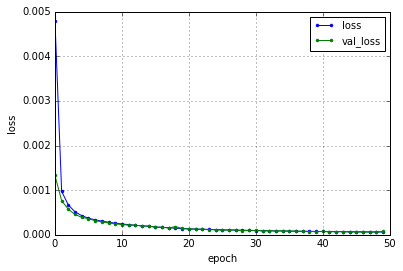

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0030 - val_loss: 5.4915e-04
Epoch 2/50
62s - loss: 4.1425e-04 - val_loss: 3.2825e-04
Epoch 3/50
62s - loss: 2.6169e-04 - val_loss: 2.2255e-04
Epoch 4/50
62s - loss: 2.0717e-04 - val_loss: 1.8647e-04
Epoch 5/50
62s - loss: 1.6645e-04 - val_loss: 1.4661e-04
Epoch 6/50
62s - loss: 1.4099e-04 - val_loss: 1.2575e-04
Epoch 7/50
62s - loss: 1.2247e-04 - val_loss: 1.1996e-04
Epoch 8/50
62s - loss: 1.1023e-04 - val_loss: 1.0781e-04
Epoch 9/50
62s - loss: 9.9375e-05 - val_loss: 9.3624e-05
Epoch 10/50
62s - loss: 9.0939e-05 - val_loss: 8.9271e-05
Epoch 11/50
62s - loss: 8.4324e-05 - val_loss: 7.8254e-05
Epoch 12/50
61s - loss: 7.7633e-05 - val_loss: 7.4855e-05
Epoch 13/50
62s - loss: 7.3277e-05 - val_loss: 6.7302e-05
Epoch 14/50
62s - loss: 6.8672e-05 - val_loss: 6.2668e-05
Epoch 15/50
62s - loss: 6.4986e-05 - val_loss: 5.8604e-05
Epoch 16/50
62s - loss: 6.0902e-05 - val_loss: 5.4907e-05
Epoch 17/50
62s - lo

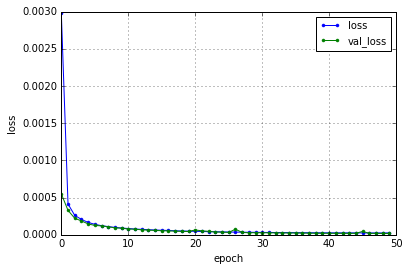

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0021 - val_loss: 3.8028e-04
Epoch 2/50
62s - loss: 2.6362e-04 - val_loss: 2.1873e-04
Epoch 3/50
62s - loss: 1.6557e-04 - val_loss: 1.3505e-04
Epoch 4/50
62s - loss: 1.2413e-04 - val_loss: 1.1285e-04
Epoch 5/50
62s - loss: 9.8685e-05 - val_loss: 9.6601e-05
Epoch 6/50
62s - loss: 8.4003e-05 - val_loss: 7.5350e-05
Epoch 7/50
62s - loss: 7.4739e-05 - val_loss: 6.6555e-05
Epoch 8/50
62s - loss: 6.6980e-05 - val_loss: 1.8701e-04
Epoch 9/50
62s - loss: 5.9785e-05 - val_loss: 6.3300e-05
Epoch 10/50
62s - loss: 5.4855e-05 - val_loss: 5.2249e-05
Epoch 11/50
62s - loss: 5.1263e-05 - val_loss: 6.2868e-05
Epoch 12/50
62s - loss: 4.8475e-05 - val_loss: 5.7476e-05
Epoch 13/50
62s - loss: 4.5064e-05 - val_loss: 3.9999e-05
Epoch 14/50
62s - loss: 4.2742e-05 - val_loss: 3.9569e-05
Epoch 15/50
62s - loss: 4.0133e-05 - val_loss: 3.8266e-05
Epoch 16/50
62s - loss: 3.8515e-05 - val_loss: 3.2110e-05
Epoch 17/50
61s - l

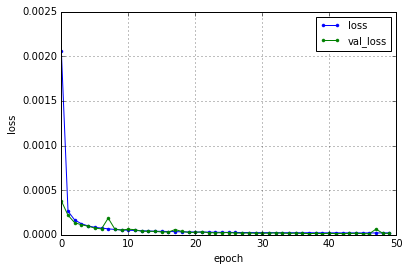

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0016 - val_loss: 3.4519e-04
Epoch 2/50
62s - loss: 2.4766e-04 - val_loss: 1.7825e-04
Epoch 3/50
61s - loss: 1.4819e-04 - val_loss: 1.1972e-04
Epoch 4/50
61s - loss: 1.0942e-04 - val_loss: 9.7934e-05
Epoch 5/50
62s - loss: 8.8355e-05 - val_loss: 7.4626e-05
Epoch 6/50
61s - loss: 7.4985e-05 - val_loss: 7.5231e-05
Epoch 7/50
61s - loss: 6.5078e-05 - val_loss: 6.0321e-05
Epoch 8/50
62s - loss: 5.8225e-05 - val_loss: 5.3421e-05
Epoch 9/50
62s - loss: 5.2923e-05 - val_loss: 4.4549e-05
Epoch 10/50
62s - loss: 4.7512e-05 - val_loss: 5.0777e-05
Epoch 11/50
62s - loss: 4.4798e-05 - val_loss: 3.8558e-05
Epoch 12/50
62s - loss: 4.1161e-05 - val_loss: 3.4152e-05
Epoch 13/50
62s - loss: 3.8332e-05 - val_loss: 3.7263e-05
Epoch 14/50
62s - loss: 3.5924e-05 - val_loss: 3.1442e-05
Epoch 15/50
62s - loss: 3.4132e-05 - val_loss: 3.4486e-05
Epoch 16/50
62s - loss: 3.2116e-05 - val_loss: 2.4706e-05
Epoch 17/50
62s - l

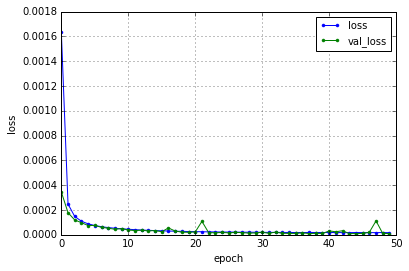

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
64s - loss: 0.0011 - val_loss: 1.6433e-04
Epoch 2/50
65s - loss: 1.1531e-04 - val_loss: 8.3908e-05
Epoch 3/50
65s - loss: 7.2023e-05 - val_loss: 5.7978e-05
Epoch 4/50
64s - loss: 5.5972e-05 - val_loss: 4.6579e-05
Epoch 5/50
65s - loss: 4.5668e-05 - val_loss: 6.0094e-05
Epoch 6/50
65s - loss: 3.8638e-05 - val_loss: 3.5616e-05
Epoch 7/50
65s - loss: 3.4193e-05 - val_loss: 2.9333e-05
Epoch 8/50
64s - loss: 3.0436e-05 - val_loss: 2.3543e-05
Epoch 9/50
64s - loss: 2.8114e-05 - val_loss: 2.2563e-05
Epoch 10/50
64s - loss: 2.6076e-05 - val_loss: 2.4325e-05
Epoch 11/50
65s - loss: 2.4155e-05 - val_loss: 1.7572e-05
Epoch 12/50
64s - loss: 2.2752e-05 - val_loss: 4.9788e-05
Epoch 13/50
65s - loss: 2.2379e-05 - val_loss: 1.6269e-05
Epoch 14/50
65s - loss: 2.0898e-05 - val_loss: 2.0237e-05
Epoch 15/50
65s - loss: 2.0348e-05 - val_loss: 1.2340e-05
Epoch 16/50
61s - loss: 1.9995e-05 - val_loss: 1.2328e-05
Epoch 17/50
64s - l

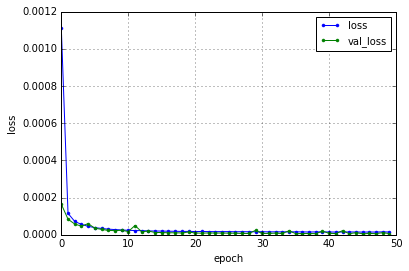

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
50s - loss: 4.4867e-04 - val_loss: 6.4065e-05
Epoch 2/50
50s - loss: 5.2687e-05 - val_loss: 5.3562e-05
Epoch 3/50
49s - loss: 3.8362e-05 - val_loss: 3.2363e-05
Epoch 4/50
49s - loss: 3.1757e-05 - val_loss: 2.6459e-05
Epoch 5/50
50s - loss: 2.7315e-05 - val_loss: 2.3511e-05
Epoch 6/50
50s - loss: 2.4205e-05 - val_loss: 2.0486e-05
Epoch 7/50
50s - loss: 2.1586e-05 - val_loss: 1.9548e-05
Epoch 8/50
49s - loss: 1.9442e-05 - val_loss: 1.7466e-05
Epoch 9/50
50s - loss: 1.8019e-05 - val_loss: 1.5407e-05
Epoch 10/50
50s - loss: 1.6564e-05 - val_loss: 1.3633e-05
Epoch 11/50
50s - loss: 1.5261e-05 - val_loss: 1.3480e-05
Epoch 12/50
50s - loss: 1.4057e-05 - val_loss: 1.1670e-05
Epoch 13/50
50s - loss: 1.2928e-05 - val_loss: 1.1696e-05
Epoch 14/50
49s - loss: 1.2339e-05 - val_loss: 9.9551e-06
Epoch 15/50
49s - loss: 1.1873e-05 - val_loss: 9.3501e-06
Epoch 16/50
50s - loss: 1.1170e-05 - val_loss: 1.1040e-05
Epoch 17/50
50s

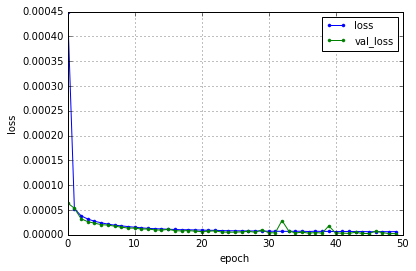

hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
49s - loss: 0.0228 - val_loss: 0.0022
Epoch 2/50
49s - loss: 0.0015 - val_loss: 9.8959e-04
Epoch 3/50
50s - loss: 8.9012e-04 - val_loss: 7.4674e-04
Epoch 4/50
49s - loss: 7.1239e-04 - val_loss: 6.2555e-04
Epoch 5/50
50s - loss: 5.9764e-04 - val_loss: 5.2241e-04
Epoch 6/50
49s - loss: 5.2039e-04 - val_loss: 4.6679e-04
Epoch 7/50
50s - loss: 4.5576e-04 - val_loss: 4.1642e-04
Epoch 8/50
49s - loss: 4.0343e-04 - val_loss: 3.5520e-04
Epoch 9/50
49s - loss: 3.5775e-04 - val_loss: 3.1197e-04
Epoch 10/50
49s - loss: 3.2213e-04 - val_loss: 2.7957e-04
Epoch 11/50
50s - loss: 2.9480e-04 - val_loss: 2.7753e-04
Epoch 12/50
49s - loss: 2.7555e-04 - val_loss: 2.6239e-04
Epoch 13/50
49s - loss: 2.6622e-04 - val_loss: 2.4083e-04
Epoch 14/50
49s - loss: 2.5543e-04 - val_loss: 2.6019e-04
Epoch 15/50
49s - loss: 2.4836e-04 - val_loss: 2.2848e-04
Epoch 16/50
50s - loss: 2.4444e-04 - val_loss: 2.2481e-04
Epoch 17/50
50s - loss: 2.40

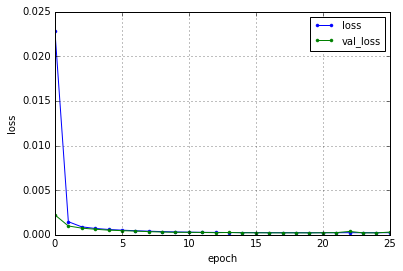

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
49s - loss: 0.0145 - val_loss: 0.0012
Epoch 2/50
50s - loss: 9.4425e-04 - val_loss: 7.4726e-04
Epoch 3/50
49s - loss: 6.1755e-04 - val_loss: 5.0306e-04
Epoch 4/50
49s - loss: 4.4891e-04 - val_loss: 3.4270e-04
Epoch 5/50
49s - loss: 3.3892e-04 - val_loss: 2.8113e-04
Epoch 6/50
49s - loss: 2.7672e-04 - val_loss: 2.2569e-04
Epoch 7/50
49s - loss: 2.3311e-04 - val_loss: 1.7950e-04
Epoch 8/50
50s - loss: 2.0579e-04 - val_loss: 1.6317e-04
Epoch 9/50
49s - loss: 1.9604e-04 - val_loss: 1.4030e-04
Epoch 10/50
50s - loss: 1.8173e-04 - val_loss: 1.2621e-04
Epoch 11/50
50s - loss: 1.7241e-04 - val_loss: 1.3871e-04
Epoch 12/50
50s - loss: 1.6865e-04 - val_loss: 1.5564e-04
Epoch 13/50
49s - loss: 1.5837e-04 - val_loss: 1.1732e-04
Epoch 14/50
49s - loss: 1.5601e-04 - val_loss: 1.1303e-04
Epoch 15/50
45s - loss: 1.5104e-04 - val_loss: 9.5058e-05
Epoch 16/50
49s - loss: 1.4566e-04 - val_loss: 1.0180e-04
Epoch 17/50
50s - loss: 

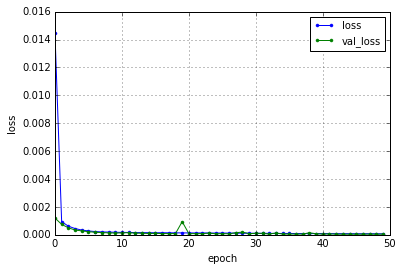

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0088 - val_loss: 8.3548e-04
Epoch 2/50
22s - loss: 6.1861e-04 - val_loss: 4.2672e-04
Epoch 3/50
22s - loss: 4.0862e-04 - val_loss: 3.9318e-04
Epoch 4/50
22s - loss: 3.1048e-04 - val_loss: 2.2715e-04
Epoch 5/50
22s - loss: 2.5945e-04 - val_loss: 1.7621e-04
Epoch 6/50
23s - loss: 2.2978e-04 - val_loss: 1.5183e-04
Epoch 7/50
23s - loss: 2.0974e-04 - val_loss: 1.3706e-04
Epoch 8/50
22s - loss: 1.9836e-04 - val_loss: 1.6020e-04
Epoch 9/50
22s - loss: 1.9194e-04 - val_loss: 1.4167e-04
Epoch 10/50
22s - loss: 1.8225e-04 - val_loss: 1.1647e-04
Epoch 11/50
22s - loss: 1.7936e-04 - val_loss: 1.0908e-04
Epoch 12/50
23s - loss: 1.6724e-04 - val_loss: 1.0496e-04
Epoch 13/50
22s - loss: 1.7095e-04 - val_loss: 1.0506e-04
Epoch 14/50
22s - loss: 1.6491e-04 - val_loss: 1.1808e-04
Epoch 15/50
22s - loss: 1.6929e-04 - val_loss: 1.0769e-04
Epoch 16/50
23s - loss: 1.5909e-04 - val_loss: 9.1021e-05
Epoch 17/50
22s - l

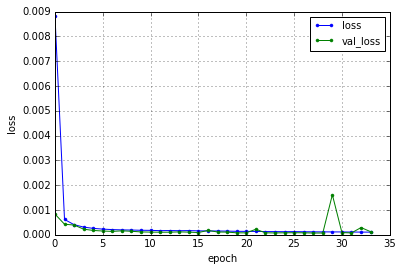

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
22s - loss: 0.0114 - val_loss: 6.0089e-04
Epoch 2/50
22s - loss: 5.0770e-04 - val_loss: 4.3337e-04
Epoch 3/50
22s - loss: 3.5648e-04 - val_loss: 2.5204e-04
Epoch 4/50
22s - loss: 3.0303e-04 - val_loss: 2.0340e-04
Epoch 5/50
22s - loss: 2.6905e-04 - val_loss: 1.8547e-04
Epoch 6/50
22s - loss: 2.5433e-04 - val_loss: 1.6002e-04
Epoch 7/50
22s - loss: 2.3702e-04 - val_loss: 1.8545e-04
Epoch 8/50
23s - loss: 2.2045e-04 - val_loss: 1.4911e-04
Epoch 9/50
22s - loss: 2.1656e-04 - val_loss: 1.3850e-04
Epoch 10/50
22s - loss: 2.0729e-04 - val_loss: 1.2353e-04
Epoch 11/50
22s - loss: 2.0828e-04 - val_loss: 1.3670e-04
Epoch 12/50
22s - loss: 1.9416e-04 - val_loss: 4.2912e-04
Epoch 13/50
23s - loss: 1.8870e-04 - val_loss: 1.2431e-04
Epoch 14/50
22s - loss: 1.8822e-04 - val_loss: 1.0971e-04
Epoch 15/50
21s - loss: 1.8849e-04 - val_loss: 1.0317e-04
Epoch 16/50
23s - loss: 1.7715e-04 - val_loss: 1.1038e-04
Epoch 17/50
22s - l

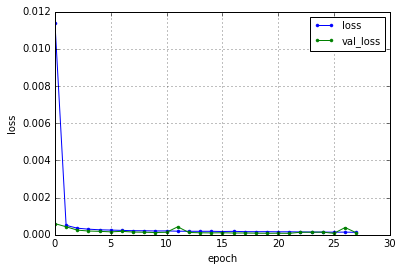

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
22s - loss: 0.0051 - val_loss: 4.2798e-04
Epoch 2/50
23s - loss: 3.7634e-04 - val_loss: 2.5174e-04
Epoch 3/50
22s - loss: 2.8691e-04 - val_loss: 1.7807e-04
Epoch 4/50
22s - loss: 2.5360e-04 - val_loss: 2.3329e-04
Epoch 5/50
22s - loss: 2.3646e-04 - val_loss: 1.4083e-04
Epoch 6/50
23s - loss: 2.2338e-04 - val_loss: 1.9713e-04
Epoch 7/50
23s - loss: 2.0981e-04 - val_loss: 1.8602e-04
Epoch 8/50
23s - loss: 2.0755e-04 - val_loss: 1.2147e-04
Epoch 9/50
22s - loss: 2.0395e-04 - val_loss: 1.0657e-04
Epoch 10/50
23s - loss: 2.0264e-04 - val_loss: 1.1924e-04
Epoch 11/50
22s - loss: 1.9537e-04 - val_loss: 1.0783e-04
Epoch 12/50
23s - loss: 1.8987e-04 - val_loss: 6.0308e-04
Epoch 13/50
22s - loss: 1.7990e-04 - val_loss: 8.8978e-05
Epoch 14/50
23s - loss: 1.7647e-04 - val_loss: 1.4831e-04
Epoch 15/50
23s - loss: 1.7531e-04 - val_loss: 8.5027e-05
Epoch 16/50
23s - loss: 1.6802e-04 - val_loss: 1.5061e-04
Epoch 17/50
23s - l

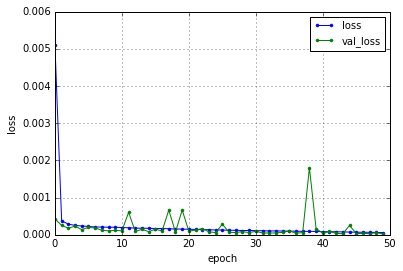

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0029 - val_loss: 1.5925e-04
Epoch 2/50
22s - loss: 2.7938e-04 - val_loss: 1.1019e-04
Epoch 3/50
23s - loss: 2.5515e-04 - val_loss: 1.8074e-04
Epoch 4/50
23s - loss: 2.4633e-04 - val_loss: 1.0673e-04
Epoch 5/50
22s - loss: 2.3567e-04 - val_loss: 1.6703e-04
Epoch 6/50
23s - loss: 2.2794e-04 - val_loss: 9.2271e-05
Epoch 7/50
23s - loss: 2.2153e-04 - val_loss: 1.1123e-04
Epoch 8/50
23s - loss: 2.1022e-04 - val_loss: 1.2675e-04
Epoch 9/50
22s - loss: 2.1616e-04 - val_loss: 9.7412e-05
Epoch 10/50
23s - loss: 2.0787e-04 - val_loss: 8.3071e-05
Epoch 11/50
23s - loss: 2.0271e-04 - val_loss: 0.0035
Epoch 12/50
23s - loss: 1.9776e-04 - val_loss: 2.2973e-04
Epoch 13/50
23s - loss: 2.0028e-04 - val_loss: 1.2285e-04
Epoch 14/50
23s - loss: 1.8703e-04 - val_loss: 2.4190e-04
Epoch 15/50
23s - loss: 1.8938e-04 - val_loss: 9.2466e-05
Epoch 16/50
23s - loss: 1.8551e-04 - val_loss: 1.0204e-04


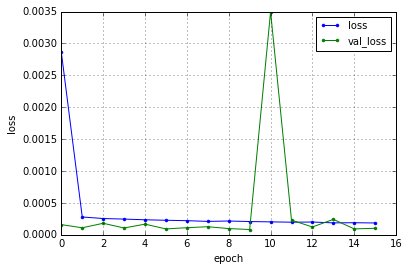

hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0111 - val_loss: 0.0034
Epoch 2/50
23s - loss: 0.0025 - val_loss: 0.0020
Epoch 3/50
23s - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
23s - loss: 0.0013 - val_loss: 0.0011
Epoch 5/50
23s - loss: 0.0010 - val_loss: 9.2003e-04
Epoch 6/50
23s - loss: 8.4654e-04 - val_loss: 7.5924e-04
Epoch 7/50
23s - loss: 7.2742e-04 - val_loss: 6.6960e-04
Epoch 8/50
23s - loss: 6.5195e-04 - val_loss: 6.1159e-04
Epoch 9/50
23s - loss: 5.9523e-04 - val_loss: 5.6690e-04
Epoch 10/50
23s - loss: 5.4976e-04 - val_loss: 5.2286e-04
Epoch 11/50
23s - loss: 5.1615e-04 - val_loss: 5.1171e-04
Epoch 12/50
23s - loss: 4.8942e-04 - val_loss: 4.8045e-04
Epoch 13/50
23s - loss: 4.6852e-04 - val_loss: 4.5006e-04
Epoch 14/50
22s - loss: 4.5040e-04 - val_loss: 4.3612e-04
Epoch 15/50
22s - loss: 4.3583e-04 - val_loss: 4.4287e-04
Epoch 16/50
21s - loss: 4.2181e-04 - val_loss: 3.9924e-04
Epoch 17/50
22s - loss: 4.0557e-04 - val_loss: 4.274

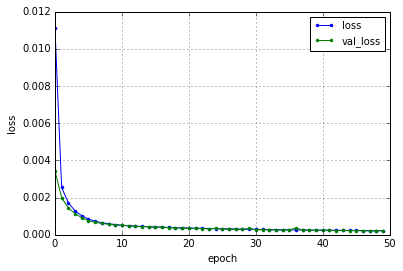

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0076 - val_loss: 0.0016
Epoch 2/50
22s - loss: 0.0013 - val_loss: 0.0010
Epoch 3/50
22s - loss: 8.6345e-04 - val_loss: 7.6568e-04
Epoch 4/50
22s - loss: 6.6166e-04 - val_loss: 5.7864e-04
Epoch 5/50
22s - loss: 5.3700e-04 - val_loss: 5.0299e-04
Epoch 6/50
22s - loss: 4.6470e-04 - val_loss: 4.1613e-04
Epoch 7/50
23s - loss: 4.0922e-04 - val_loss: 4.0486e-04
Epoch 8/50
22s - loss: 3.6570e-04 - val_loss: 3.3335e-04
Epoch 9/50
23s - loss: 3.3398e-04 - val_loss: 3.2434e-04
Epoch 10/50
23s - loss: 3.0614e-04 - val_loss: 3.0439e-04
Epoch 11/50
23s - loss: 2.8347e-04 - val_loss: 2.6161e-04
Epoch 12/50
23s - loss: 2.6404e-04 - val_loss: 2.3864e-04
Epoch 13/50
23s - loss: 2.4880e-04 - val_loss: 2.3456e-04
Epoch 14/50
23s - loss: 2.3272e-04 - val_loss: 2.1322e-04
Epoch 15/50
23s - loss: 2.2183e-04 - val_loss: 1.9941e-04
Epoch 16/50
22s - loss: 2.1110e-04 - val_loss: 2.0296e-04
Epoch 17/50
23s - loss: 2.0085e-

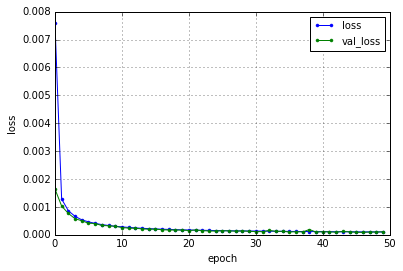

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0067 - val_loss: 0.0012
Epoch 2/50
23s - loss: 9.5523e-04 - val_loss: 7.5535e-04
Epoch 3/50
23s - loss: 6.4394e-04 - val_loss: 5.6236e-04
Epoch 4/50
23s - loss: 5.0727e-04 - val_loss: 4.4558e-04
Epoch 5/50
23s - loss: 4.1572e-04 - val_loss: 3.8773e-04
Epoch 6/50
22s - loss: 3.5748e-04 - val_loss: 3.2231e-04
Epoch 7/50
22s - loss: 3.1361e-04 - val_loss: 2.8514e-04
Epoch 8/50
22s - loss: 2.7988e-04 - val_loss: 2.7122e-04
Epoch 9/50
22s - loss: 2.5729e-04 - val_loss: 3.7826e-04
Epoch 10/50
23s - loss: 2.3507e-04 - val_loss: 3.0391e-04
Epoch 11/50
22s - loss: 2.1800e-04 - val_loss: 3.8063e-04
Epoch 12/50
23s - loss: 2.0457e-04 - val_loss: 1.8645e-04
Epoch 13/50
23s - loss: 1.9227e-04 - val_loss: 1.8772e-04
Epoch 14/50
22s - loss: 1.8414e-04 - val_loss: 1.6610e-04
Epoch 15/50
23s - loss: 1.7428e-04 - val_loss: 1.5580e-04
Epoch 16/50
21s - loss: 1.6705e-04 - val_loss: 1.7233e-04
Epoch 17/50
22s - loss:

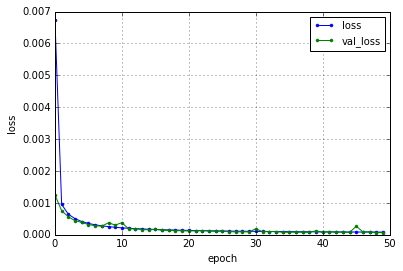

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0028 - val_loss: 8.7343e-04
Epoch 2/50
23s - loss: 6.5109e-04 - val_loss: 4.9891e-04
Epoch 3/50
23s - loss: 4.3046e-04 - val_loss: 4.1801e-04
Epoch 4/50
23s - loss: 3.3035e-04 - val_loss: 2.9042e-04
Epoch 5/50
23s - loss: 2.6954e-04 - val_loss: 2.3042e-04
Epoch 6/50
23s - loss: 2.3312e-04 - val_loss: 2.0876e-04
Epoch 7/50
23s - loss: 2.0525e-04 - val_loss: 1.8969e-04
Epoch 8/50
23s - loss: 1.8411e-04 - val_loss: 1.7090e-04
Epoch 9/50
23s - loss: 1.6791e-04 - val_loss: 1.5214e-04
Epoch 10/50
23s - loss: 1.5482e-04 - val_loss: 1.3483e-04
Epoch 11/50
23s - loss: 1.4287e-04 - val_loss: 1.2318e-04
Epoch 12/50
23s - loss: 1.3231e-04 - val_loss: 3.7177e-04
Epoch 13/50
23s - loss: 1.2451e-04 - val_loss: 1.0730e-04
Epoch 14/50
23s - loss: 1.1782e-04 - val_loss: 1.0798e-04
Epoch 15/50
22s - loss: 1.1124e-04 - val_loss: 9.9466e-05
Epoch 16/50
22s - loss: 1.0565e-04 - val_loss: 8.8605e-05
Epoch 17/50
22s - l

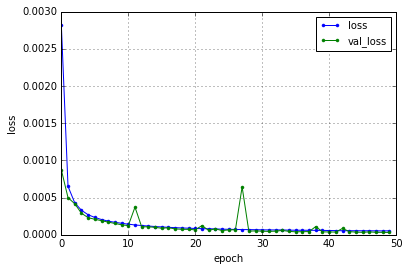

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0026 - val_loss: 4.3466e-04
Epoch 2/50
23s - loss: 3.2324e-04 - val_loss: 2.5250e-04
Epoch 3/50
23s - loss: 2.3971e-04 - val_loss: 1.9937e-04
Epoch 4/50
23s - loss: 1.9771e-04 - val_loss: 1.7194e-04
Epoch 5/50
23s - loss: 1.6608e-04 - val_loss: 1.4546e-04
Epoch 6/50
23s - loss: 1.4502e-04 - val_loss: 1.3576e-04
Epoch 7/50
23s - loss: 1.2842e-04 - val_loss: 1.6902e-04
Epoch 8/50
20s - loss: 1.1671e-04 - val_loss: 1.0828e-04
Epoch 9/50
23s - loss: 1.0606e-04 - val_loss: 9.1192e-05
Epoch 10/50
23s - loss: 9.7862e-05 - val_loss: 8.9526e-05
Epoch 11/50
23s - loss: 9.2313e-05 - val_loss: 7.2905e-05
Epoch 12/50
23s - loss: 8.8205e-05 - val_loss: 1.0003e-04
Epoch 13/50
23s - loss: 8.2224e-05 - val_loss: 6.4270e-05
Epoch 14/50
23s - loss: 7.8600e-05 - val_loss: 7.4941e-05
Epoch 15/50
23s - loss: 7.6896e-05 - val_loss: 5.7036e-05
Epoch 16/50
22s - loss: 7.3683e-05 - val_loss: 5.1644e-05
Epoch 17/50
22s - l

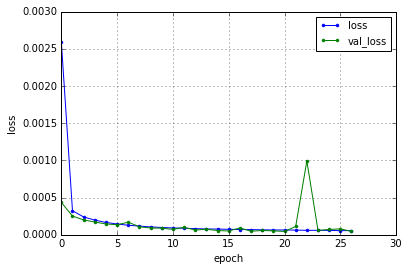

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0019 - val_loss: 1.6208e-04
Epoch 2/50
22s - loss: 1.4165e-04 - val_loss: 1.2106e-04
Epoch 3/50
22s - loss: 1.0205e-04 - val_loss: 8.2687e-05
Epoch 4/50
23s - loss: 8.5743e-05 - val_loss: 6.6170e-05
Epoch 5/50
22s - loss: 7.3966e-05 - val_loss: 8.2796e-05
Epoch 6/50
22s - loss: 6.6367e-05 - val_loss: 5.0538e-05
Epoch 7/50
22s - loss: 6.0971e-05 - val_loss: 4.6590e-05
Epoch 8/50
22s - loss: 5.6836e-05 - val_loss: 1.7207e-04
Epoch 9/50
22s - loss: 5.4398e-05 - val_loss: 3.7943e-05
Epoch 10/50
22s - loss: 5.0175e-05 - val_loss: 3.5512e-05
Epoch 11/50
23s - loss: 4.9355e-05 - val_loss: 3.4123e-05
Epoch 12/50
22s - loss: 4.5941e-05 - val_loss: 3.6286e-05
Epoch 13/50
22s - loss: 4.4114e-05 - val_loss: 5.2939e-05
Epoch 14/50
22s - loss: 4.3648e-05 - val_loss: 3.8397e-05
Epoch 15/50
22s - loss: 4.1060e-05 - val_loss: 2.7223e-05
Epoch 16/50
23s - loss: 4.2332e-05 - val_loss: 2.9683e-05
Epoch 17/50
23s - l

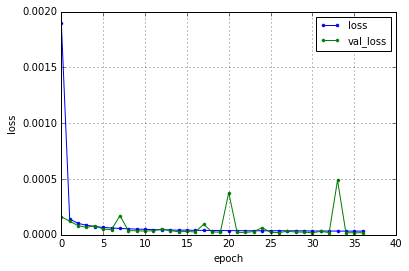

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 3)
(31839, 32, 3)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0120 - val_loss: 0.0039
Epoch 2/50
5s - loss: 0.0026 - val_loss: 0.0020
Epoch 3/50
6s - loss: 0.0017 - val_loss: 0.0015
Epoch 4/50
5s - loss: 0.0014 - val_loss: 0.0012
Epoch 5/50
5s - loss: 0.0011 - val_loss: 0.0010
Epoch 6/50
5s - loss: 9.5521e-04 - val_loss: 9.1172e-04
Epoch 7/50
6s - loss: 8.3270e-04 - val_loss: 7.8112e-04
Epoch 8/50
5s - loss: 7.4197e-04 - val_loss: 6.9742e-04
Epoch 9/50
5s - loss: 6.7361e-04 - val_loss: 6.3889e-04
Epoch 10/50
5s - loss: 6.2361e-04 - val_loss: 5.9855e-04
Epoch 11/50
6s - loss: 5.8651e-04 - val_loss: 5.6592e-04
Epoch 12/50
6s - loss: 5.5593e-04 - val_loss: 5.4829e-04
Epoch 13/50
5s - loss: 5.3514e-04 - val_loss: 5.2693e-04
Epoch 14/50
5s - loss: 5.1600e-04 - val_loss: 5.0442

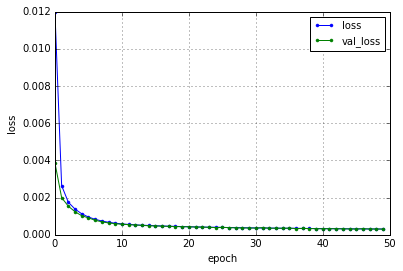

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
6s - loss: 0.0078 - val_loss: 0.0021
Epoch 2/50
5s - loss: 0.0016 - val_loss: 0.0012
Epoch 3/50
5s - loss: 0.0010 - val_loss: 9.0429e-04
Epoch 4/50
6s - loss: 8.2657e-04 - val_loss: 7.5741e-04
Epoch 5/50
6s - loss: 6.9592e-04 - val_loss: 6.3335e-04
Epoch 6/50
5s - loss: 5.9075e-04 - val_loss: 5.4038e-04
Epoch 7/50
5s - loss: 5.1049e-04 - val_loss: 4.8578e-04
Epoch 8/50
6s - loss: 4.5882e-04 - val_loss: 4.3576e-04
Epoch 9/50
6s - loss: 4.1477e-04 - val_loss: 3.9709e-04
Epoch 10/50
5s - loss: 3.8386e-04 - val_loss: 3.6780e-04
Epoch 11/50
5s - loss: 3.6038e-04 - val_loss: 3.7735e-04
Epoch 12/50
6s - loss: 3.3688e-04 - val_loss: 3.1916e-04
Epoch 13/50
6s - loss: 3.1529e-04 - val_loss: 2.9926e-04
Epoch 14/50
5s - loss: 2.9572e-04 - val_loss: 2.8866e-04
Epoch 15/50
5s - loss: 2.7731e-04 - val_loss: 2.6408e-04
Epoch 16/50
6s - loss: 2.5730e-04 - val_loss: 2.4353e-04
Epoch 17/50
6s - loss: 2.3962e-04 - val_loss: 2.2348

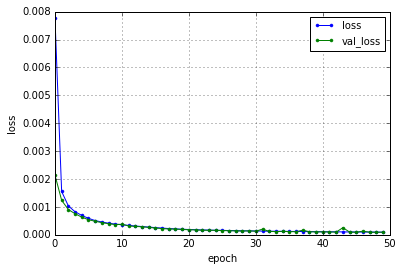

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0062 - val_loss: 0.0018
Epoch 2/50
6s - loss: 0.0014 - val_loss: 0.0011
Epoch 3/50
5s - loss: 8.8621e-04 - val_loss: 7.1783e-04
Epoch 4/50
5s - loss: 6.2010e-04 - val_loss: 5.2829e-04
Epoch 5/50
5s - loss: 4.7680e-04 - val_loss: 4.1394e-04
Epoch 6/50
6s - loss: 3.8268e-04 - val_loss: 3.5061e-04
Epoch 7/50
5s - loss: 3.2460e-04 - val_loss: 3.0549e-04
Epoch 8/50
5s - loss: 2.8393e-04 - val_loss: 2.6034e-04
Epoch 9/50
5s - loss: 2.5155e-04 - val_loss: 2.3491e-04
Epoch 10/50
6s - loss: 2.2814e-04 - val_loss: 2.1439e-04
Epoch 11/50
5s - loss: 2.0970e-04 - val_loss: 1.9226e-04
Epoch 12/50
5s - loss: 1.9350e-04 - val_loss: 1.8018e-04
Epoch 13/50
5s - loss: 1.8123e-04 - val_loss: 1.7170e-04
Epoch 14/50
6s - loss: 1.7176e-04 - val_loss: 1.7982e-04
Epoch 15/50
5s - loss: 1.6197e-04 - val_loss: 1.5215e-04
Epoch 16/50
5s - loss: 1.5578e-04 - val_loss: 1.4549e-04
Epoch 17/50
5s - loss: 1.4860e-04 - val_loss: 1

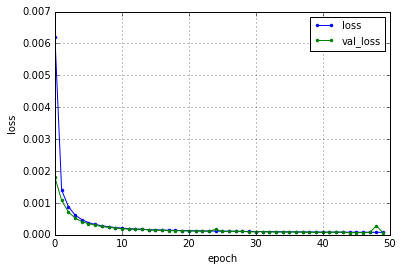

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0058 - val_loss: 0.0012
Epoch 2/50
5s - loss: 8.9863e-04 - val_loss: 6.7656e-04
Epoch 3/50
5s - loss: 5.6579e-04 - val_loss: 4.7036e-04
Epoch 4/50
5s - loss: 4.1917e-04 - val_loss: 3.6953e-04
Epoch 5/50
5s - loss: 3.3390e-04 - val_loss: 3.0391e-04
Epoch 6/50
5s - loss: 2.8370e-04 - val_loss: 2.5743e-04
Epoch 7/50
5s - loss: 2.4896e-04 - val_loss: 2.3251e-04
Epoch 8/50
5s - loss: 2.2056e-04 - val_loss: 2.1934e-04
Epoch 9/50
5s - loss: 2.0073e-04 - val_loss: 1.8286e-04
Epoch 10/50
5s - loss: 1.8408e-04 - val_loss: 1.6754e-04
Epoch 11/50
5s - loss: 1.6971e-04 - val_loss: 1.5691e-04
Epoch 12/50
5s - loss: 1.5964e-04 - val_loss: 1.5280e-04
Epoch 13/50
5s - loss: 1.4983e-04 - val_loss: 1.3576e-04
Epoch 14/50
5s - loss: 1.4167e-04 - val_loss: 1.3506e-04
Epoch 15/50
5s - loss: 1.3548e-04 - val_loss: 1.3002e-04
Epoch 16/50
5s - loss: 1.2773e-04 - val_loss: 1.1571e-04
Epoch 17/50
5s - loss: 1.2220e-04 - val

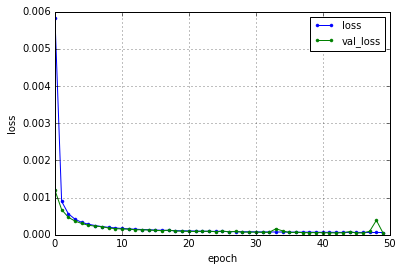

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0035 - val_loss: 6.9640e-04
Epoch 2/50
5s - loss: 4.9168e-04 - val_loss: 3.5565e-04
Epoch 3/50
5s - loss: 3.0395e-04 - val_loss: 2.4547e-04
Epoch 4/50
5s - loss: 2.2398e-04 - val_loss: 1.9047e-04
Epoch 5/50
5s - loss: 1.8365e-04 - val_loss: 1.5857e-04
Epoch 6/50
5s - loss: 1.5510e-04 - val_loss: 1.4262e-04
Epoch 7/50
5s - loss: 1.3463e-04 - val_loss: 1.1864e-04
Epoch 8/50
5s - loss: 1.2166e-04 - val_loss: 1.0666e-04
Epoch 9/50
5s - loss: 1.1074e-04 - val_loss: 9.7951e-05
Epoch 10/50
5s - loss: 1.0192e-04 - val_loss: 9.4804e-05
Epoch 11/50
5s - loss: 9.4639e-05 - val_loss: 8.2267e-05
Epoch 12/50
5s - loss: 8.9724e-05 - val_loss: 7.9430e-05
Epoch 13/50
5s - loss: 8.5522e-05 - val_loss: 7.5253e-05
Epoch 14/50
5s - loss: 8.1589e-05 - val_loss: 7.3899e-05
Epoch 15/50
5s - loss: 7.6575e-05 - val_loss: 6.6083e-05
Epoch 16/50
5s - loss: 7.4568e-05 - val_loss: 6.3684e-05
Epoch 17/50
5s - loss: 7.2906e-05 -

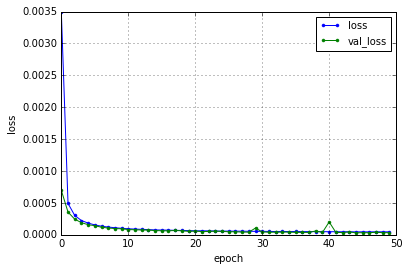

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0020 - val_loss: 4.1243e-04
Epoch 2/50
5s - loss: 2.6455e-04 - val_loss: 1.9073e-04
Epoch 3/50
5s - loss: 1.6864e-04 - val_loss: 1.3966e-04
Epoch 4/50
5s - loss: 1.2843e-04 - val_loss: 1.0522e-04
Epoch 5/50
5s - loss: 1.0303e-04 - val_loss: 8.9336e-05
Epoch 6/50
5s - loss: 8.8402e-05 - val_loss: 9.0293e-05
Epoch 7/50
5s - loss: 7.5382e-05 - val_loss: 6.8631e-05
Epoch 8/50
5s - loss: 6.6336e-05 - val_loss: 5.8899e-05
Epoch 9/50
5s - loss: 5.8683e-05 - val_loss: 5.1055e-05
Epoch 10/50
5s - loss: 5.2963e-05 - val_loss: 4.6207e-05
Epoch 11/50
5s - loss: 4.7366e-05 - val_loss: 4.1428e-05
Epoch 12/50
5s - loss: 4.3641e-05 - val_loss: 3.8328e-05
Epoch 13/50
5s - loss: 4.1354e-05 - val_loss: 3.7078e-05
Epoch 14/50
5s - loss: 3.8866e-05 - val_loss: 3.6374e-05
Epoch 15/50
5s - loss: 3.7288e-05 - val_loss: 3.3230e-05
Epoch 16/50
5s - loss: 3.5150e-05 - val_loss: 3.1708e-05
Epoch 17/50
5s - loss: 3.4359e-05 -

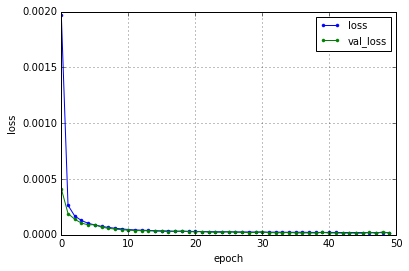

hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0742 - val_loss: 0.0109
Epoch 2/50
5s - loss: 0.0079 - val_loss: 0.0049
Epoch 3/50
5s - loss: 0.0035 - val_loss: 0.0027
Epoch 4/50
5s - loss: 0.0022 - val_loss: 0.0024
Epoch 5/50
5s - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50
5s - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
5s - loss: 0.0012 - val_loss: 0.0010
Epoch 8/50
5s - loss: 0.0011 - val_loss: 9.0737e-04
Epoch 9/50
5s - loss: 9.7784e-04 - val_loss: 0.0011
Epoch 10/50
5s - loss: 9.4557e-04 - val_loss: 8.1942e-04
Epoch 11/50
5s - loss: 8.9794e-04 - val_loss: 0.0011
Epoch 12/50
5s - loss: 8.7716e-04 - val_loss: 9.4432e-04
Epoch 13/50
5s - loss: 8.5039e-04 - val_loss: 0.0016
Epoch 14/50
5s - loss: 8.2385e-04 - val_loss: 8.9572e-04
Epoch 15/50
5s - loss: 7.9453e-04 - val_loss: 6.7069e-04
Epoch 16/50
5s - loss: 7.7474e-04 - val_loss: 6.5156e-04
Epoch 17/50
5s - loss: 7.5384e-04 - val_loss: 7.1410e-04
Epoch 18/50
5s - loss: 7.4402e-04 - val_loss: 6

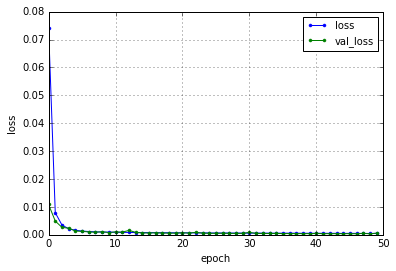

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0553 - val_loss: 0.0045
Epoch 2/50
5s - loss: 0.0032 - val_loss: 0.0024
Epoch 3/50
5s - loss: 0.0019 - val_loss: 0.0016
Epoch 4/50
5s - loss: 0.0013 - val_loss: 0.0011
Epoch 5/50
5s - loss: 0.0011 - val_loss: 8.5104e-04
Epoch 6/50
5s - loss: 9.4389e-04 - val_loss: 8.7852e-04
Epoch 7/50
5s - loss: 8.7421e-04 - val_loss: 7.7686e-04
Epoch 8/50
5s - loss: 8.2950e-04 - val_loss: 0.0019
Epoch 9/50
5s - loss: 7.7274e-04 - val_loss: 0.0011
Epoch 10/50
5s - loss: 7.2045e-04 - val_loss: 5.2776e-04
Epoch 11/50
5s - loss: 6.9854e-04 - val_loss: 5.0591e-04
Epoch 12/50
5s - loss: 6.6309e-04 - val_loss: 4.8487e-04
Epoch 13/50
5s - loss: 6.4639e-04 - val_loss: 4.4942e-04
Epoch 14/50
5s - loss: 6.3012e-04 - val_loss: 0.0023
Epoch 15/50
5s - loss: 6.0950e-04 - val_loss: 6.3018e-04
Epoch 16/50
5s - loss: 6.0598e-04 - val_loss: 3.8869e-04
Epoch 17/50
5s - loss: 5.7000e-04 - val_loss: 5.9705e-04
Epoch 18/50
5s - loss: 

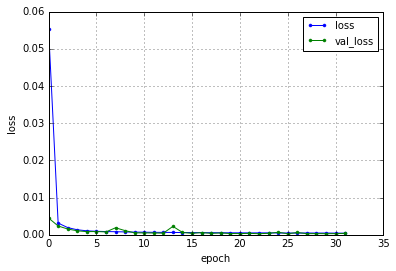

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0352 - val_loss: 0.0031
Epoch 2/50
5s - loss: 0.0021 - val_loss: 0.0017
Epoch 3/50
5s - loss: 0.0013 - val_loss: 0.0012
Epoch 4/50
5s - loss: 0.0011 - val_loss: 9.8063e-04
Epoch 5/50
5s - loss: 9.3359e-04 - val_loss: 7.7424e-04
Epoch 6/50
5s - loss: 8.7502e-04 - val_loss: 9.0340e-04
Epoch 7/50
5s - loss: 8.1264e-04 - val_loss: 6.3540e-04
Epoch 8/50
4s - loss: 7.7792e-04 - val_loss: 5.5672e-04
Epoch 9/50
5s - loss: 7.3060e-04 - val_loss: 7.8415e-04
Epoch 10/50
5s - loss: 6.8466e-04 - val_loss: 4.6974e-04
Epoch 11/50
5s - loss: 6.8625e-04 - val_loss: 8.8153e-04
Epoch 12/50
5s - loss: 6.5338e-04 - val_loss: 4.1393e-04
Epoch 13/50
5s - loss: 6.3933e-04 - val_loss: 5.0149e-04
Epoch 14/50
5s - loss: 6.4015e-04 - val_loss: 3.7195e-04
Epoch 15/50
5s - loss: 5.9658e-04 - val_loss: 6.3131e-04
Epoch 16/50
5s - loss: 5.8559e-04 - val_loss: 3.4105e-04
Epoch 17/50
5s - loss: 6.0603e-04 - val_loss: 4.7354e-04
Ep

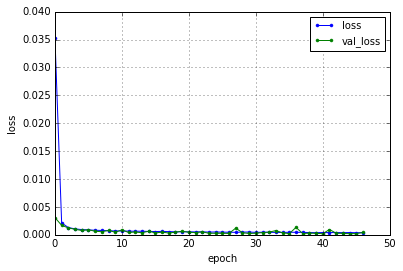

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0311 - val_loss: 0.0025
Epoch 2/50
5s - loss: 0.0017 - val_loss: 0.0011
Epoch 3/50
5s - loss: 0.0011 - val_loss: 7.5134e-04
Epoch 4/50
5s - loss: 8.6060e-04 - val_loss: 6.3909e-04
Epoch 5/50
5s - loss: 7.9119e-04 - val_loss: 5.7927e-04
Epoch 6/50
5s - loss: 7.4358e-04 - val_loss: 7.2730e-04
Epoch 7/50
5s - loss: 7.0342e-04 - val_loss: 8.5975e-04
Epoch 8/50
5s - loss: 6.7363e-04 - val_loss: 4.1348e-04
Epoch 9/50
5s - loss: 6.4284e-04 - val_loss: 7.6113e-04
Epoch 10/50
5s - loss: 6.1850e-04 - val_loss: 8.0315e-04
Epoch 11/50
4s - loss: 5.9404e-04 - val_loss: 4.0791e-04
Epoch 12/50
5s - loss: 5.9884e-04 - val_loss: 3.9039e-04
Epoch 13/50
5s - loss: 5.5308e-04 - val_loss: 3.5927e-04
Epoch 14/50
5s - loss: 5.8620e-04 - val_loss: 4.6312e-04
Epoch 15/50
5s - loss: 6.0644e-04 - val_loss: 3.5994e-04
Epoch 16/50
5s - loss: 5.6371e-04 - val_loss: 4.0224e-04
Epoch 17/50
5s - loss: 5.3824e-04 - val_loss: 2.883

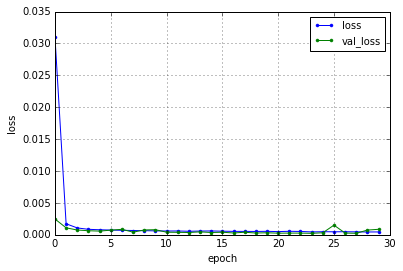

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
6s - loss: 0.0186 - val_loss: 0.0013
Epoch 2/50
5s - loss: 0.0012 - val_loss: 8.8439e-04
Epoch 3/50
5s - loss: 9.2813e-04 - val_loss: 6.4189e-04
Epoch 4/50
5s - loss: 8.1625e-04 - val_loss: 5.7580e-04
Epoch 5/50
5s - loss: 7.3789e-04 - val_loss: 4.6441e-04
Epoch 6/50
5s - loss: 7.1450e-04 - val_loss: 4.4965e-04
Epoch 7/50
5s - loss: 6.8686e-04 - val_loss: 3.6292e-04
Epoch 8/50
5s - loss: 6.8263e-04 - val_loss: 9.1624e-04
Epoch 9/50
5s - loss: 6.4527e-04 - val_loss: 0.0026
Epoch 10/50
5s - loss: 6.3607e-04 - val_loss: 4.5838e-04
Epoch 11/50
5s - loss: 6.4638e-04 - val_loss: 6.9729e-04
Epoch 12/50
5s - loss: 6.1824e-04 - val_loss: 3.1396e-04
Epoch 13/50
5s - loss: 6.0717e-04 - val_loss: 5.5918e-04
Epoch 14/50
5s - loss: 6.4455e-04 - val_loss: 3.0506e-04
Epoch 15/50
5s - loss: 6.0248e-04 - val_loss: 3.4184e-04
Epoch 16/50
4s - loss: 5.7749e-04 - val_loss: 9.3252e-04
Epoch 17/50
5s - loss: 5.7245e-04 - val_loss: 2

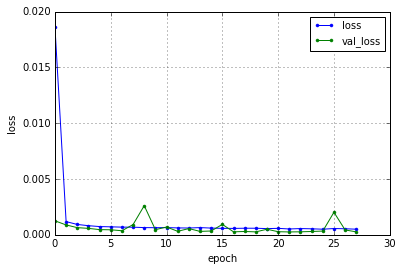

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0118 - val_loss: 0.0014
Epoch 2/50
5s - loss: 9.5379e-04 - val_loss: 6.6006e-04
Epoch 3/50
5s - loss: 8.0633e-04 - val_loss: 0.0018
Epoch 4/50
5s - loss: 7.1338e-04 - val_loss: 4.5076e-04
Epoch 5/50
5s - loss: 7.1334e-04 - val_loss: 4.7099e-04
Epoch 6/50
5s - loss: 7.4481e-04 - val_loss: 4.0957e-04
Epoch 7/50
5s - loss: 6.6541e-04 - val_loss: 0.0020
Epoch 8/50
5s - loss: 6.6571e-04 - val_loss: 9.9216e-04
Epoch 9/50
5s - loss: 6.6495e-04 - val_loss: 3.5306e-04
Epoch 10/50
5s - loss: 6.4195e-04 - val_loss: 2.7170e-04
Epoch 11/50
5s - loss: 6.4486e-04 - val_loss: 2.6129e-04
Epoch 12/50
5s - loss: 6.0935e-04 - val_loss: 2.9210e-04
Epoch 13/50
5s - loss: 6.0666e-04 - val_loss: 2.6918e-04
Epoch 14/50
5s - loss: 6.1594e-04 - val_loss: 6.5330e-04
Epoch 15/50
5s - loss: 6.3114e-04 - val_loss: 3.4217e-04
Epoch 16/50
5s - loss: 6.7222e-04 - val_loss: 2.7245e-04
Epoch 17/50
5s - loss: 6.2727e-04 - val_loss: 0

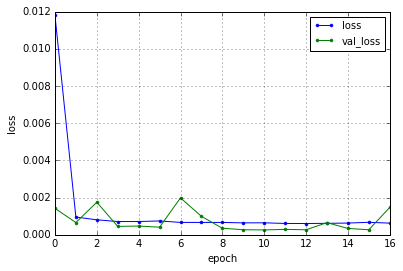

hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0295 - val_loss: 0.0121
Epoch 2/50
5s - loss: 0.0092 - val_loss: 0.0073
Epoch 3/50
5s - loss: 0.0064 - val_loss: 0.0056
Epoch 4/50
5s - loss: 0.0051 - val_loss: 0.0046
Epoch 5/50
5s - loss: 0.0042 - val_loss: 0.0037
Epoch 6/50
5s - loss: 0.0033 - val_loss: 0.0029
Epoch 7/50
5s - loss: 0.0027 - val_loss: 0.0024
Epoch 8/50
5s - loss: 0.0023 - val_loss: 0.0021
Epoch 9/50
4s - loss: 0.0020 - val_loss: 0.0019
Epoch 10/50
5s - loss: 0.0019 - val_loss: 0.0018
Epoch 11/50
5s - loss: 0.0017 - val_loss: 0.0017
Epoch 12/50
5s - loss: 0.0016 - val_loss: 0.0016
Epoch 13/50
5s - loss: 0.0016 - val_loss: 0.0015
Epoch 14/50
5s - loss: 0.0015 - val_loss: 0.0014
Epoch 15/50
5s - loss: 0.0014 - val_loss: 0.0014
Epoch 16/50
5s - loss: 0.0014 - val_loss: 0.0013
Epoch 17/50
5s - loss: 0.0013 - val_loss: 0.0013
Epoch 18/50
5s - loss: 0.0013 - val_loss: 0.0012
Epoch 19/50
5s - loss: 0.0012 - val_loss: 0.0012
Epoch 20/50
5

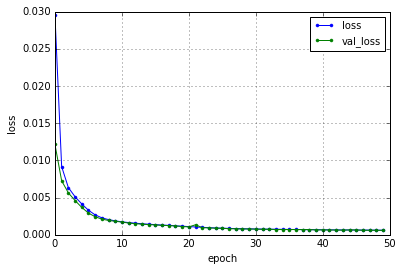

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0195 - val_loss: 0.0050
Epoch 2/50
5s - loss: 0.0037 - val_loss: 0.0027
Epoch 3/50
5s - loss: 0.0022 - val_loss: 0.0019
Epoch 4/50
5s - loss: 0.0017 - val_loss: 0.0015
Epoch 5/50
5s - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50
5s - loss: 0.0012 - val_loss: 0.0011
Epoch 7/50
5s - loss: 0.0010 - val_loss: 9.4833e-04
Epoch 8/50
5s - loss: 9.0188e-04 - val_loss: 8.2237e-04
Epoch 9/50
5s - loss: 7.9726e-04 - val_loss: 7.4453e-04
Epoch 10/50
5s - loss: 7.2637e-04 - val_loss: 7.6234e-04
Epoch 11/50
5s - loss: 6.6979e-04 - val_loss: 6.2671e-04
Epoch 12/50
5s - loss: 6.2386e-04 - val_loss: 5.7755e-04
Epoch 13/50
5s - loss: 5.8988e-04 - val_loss: 5.5802e-04
Epoch 14/50
5s - loss: 5.5993e-04 - val_loss: 5.1777e-04
Epoch 15/50
5s - loss: 5.3722e-04 - val_loss: 5.0651e-04
Epoch 16/50
4s - loss: 5.1151e-04 - val_loss: 4.8048e-04
Epoch 17/50
5s - loss: 4.9076e-04 - val_loss: 4.5786e-04
Epoch 18/50
5s - loss: 4.75

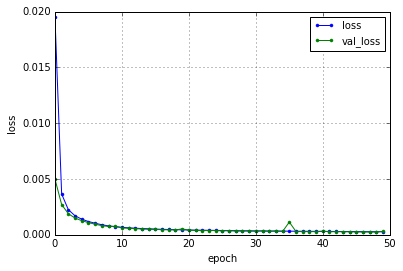

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0144 - val_loss: 0.0043
Epoch 2/50
5s - loss: 0.0031 - val_loss: 0.0022
Epoch 3/50
5s - loss: 0.0018 - val_loss: 0.0015
Epoch 4/50
5s - loss: 0.0013 - val_loss: 0.0012
Epoch 5/50
5s - loss: 0.0011 - val_loss: 9.6029e-04
Epoch 6/50
5s - loss: 9.0938e-04 - val_loss: 8.2392e-04
Epoch 7/50
5s - loss: 8.0124e-04 - val_loss: 7.3012e-04
Epoch 8/50
5s - loss: 7.2501e-04 - val_loss: 6.5951e-04
Epoch 9/50
5s - loss: 6.6769e-04 - val_loss: 6.7117e-04
Epoch 10/50
5s - loss: 6.1971e-04 - val_loss: 5.6633e-04
Epoch 11/50
5s - loss: 5.8115e-04 - val_loss: 5.4084e-04
Epoch 12/50
5s - loss: 5.4702e-04 - val_loss: 4.9635e-04
Epoch 13/50
5s - loss: 5.1533e-04 - val_loss: 5.2686e-04
Epoch 14/50
5s - loss: 4.8833e-04 - val_loss: 5.0364e-04
Epoch 15/50
5s - loss: 4.6553e-04 - val_loss: 4.3699e-04
Epoch 16/50
5s - loss: 4.4582e-04 - val_loss: 4.1490e-04
Epoch 17/50
5s - loss: 4.2469e-04 - val_loss: 4.1012e-04
Epoch 18/5

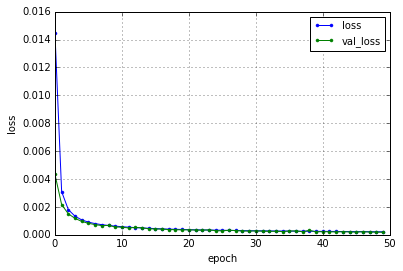

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0145 - val_loss: 0.0028
Epoch 2/50
5s - loss: 0.0020 - val_loss: 0.0015
Epoch 3/50
5s - loss: 0.0012 - val_loss: 0.0011
Epoch 4/50
5s - loss: 9.4008e-04 - val_loss: 8.0214e-04
Epoch 5/50
5s - loss: 7.6479e-04 - val_loss: 6.8684e-04
Epoch 6/50
5s - loss: 6.4919e-04 - val_loss: 6.2252e-04
Epoch 7/50
5s - loss: 5.7121e-04 - val_loss: 5.3546e-04
Epoch 8/50
5s - loss: 5.1629e-04 - val_loss: 4.7576e-04
Epoch 9/50
5s - loss: 4.7343e-04 - val_loss: 4.2199e-04
Epoch 10/50
5s - loss: 4.3584e-04 - val_loss: 5.2260e-04
Epoch 11/50
5s - loss: 4.0630e-04 - val_loss: 3.5894e-04
Epoch 12/50
5s - loss: 3.8160e-04 - val_loss: 3.4514e-04
Epoch 13/50
5s - loss: 3.5793e-04 - val_loss: 3.2385e-04
Epoch 14/50
5s - loss: 3.4316e-04 - val_loss: 3.0990e-04
Epoch 15/50
5s - loss: 3.2532e-04 - val_loss: 3.0113e-04
Epoch 16/50
5s - loss: 3.1526e-04 - val_loss: 2.8332e-04
Epoch 17/50
5s - loss: 3.0223e-04 - val_loss: 2.7014e-0

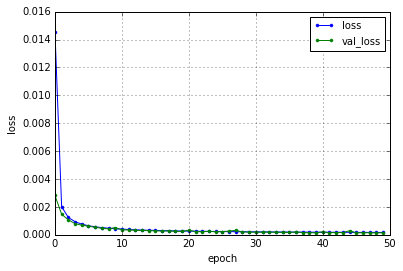

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0083 - val_loss: 0.0014
Epoch 2/50
5s - loss: 9.9992e-04 - val_loss: 7.5397e-04
Epoch 3/50
5s - loss: 6.4858e-04 - val_loss: 5.3276e-04
Epoch 4/50
5s - loss: 5.0613e-04 - val_loss: 4.3082e-04
Epoch 5/50
5s - loss: 4.1953e-04 - val_loss: 3.5273e-04
Epoch 6/50
5s - loss: 3.6298e-04 - val_loss: 3.3940e-04
Epoch 7/50
5s - loss: 3.2577e-04 - val_loss: 2.7429e-04
Epoch 8/50
5s - loss: 2.9558e-04 - val_loss: 2.6158e-04
Epoch 9/50
5s - loss: 2.7177e-04 - val_loss: 2.6226e-04
Epoch 10/50
5s - loss: 2.5934e-04 - val_loss: 2.6828e-04
Epoch 11/50
5s - loss: 2.3948e-04 - val_loss: 2.0881e-04
Epoch 12/50
5s - loss: 2.2994e-04 - val_loss: 2.1789e-04
Epoch 13/50
5s - loss: 2.2104e-04 - val_loss: 1.9520e-04
Epoch 14/50
6s - loss: 2.1414e-04 - val_loss: 1.7231e-04
Epoch 15/50
5s - loss: 2.0360e-04 - val_loss: 1.6737e-04
Epoch 16/50
5s - loss: 1.9962e-04 - val_loss: 2.2237e-04
Epoch 17/50
5s - loss: 1.8916e-04 - val

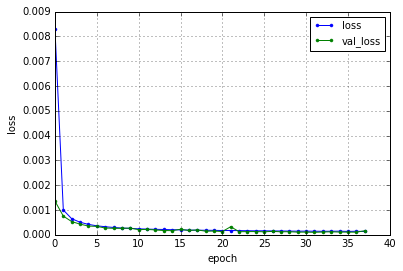

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0042 - val_loss: 7.7800e-04
Epoch 2/50
5s - loss: 5.7640e-04 - val_loss: 4.1835e-04
Epoch 3/50
5s - loss: 3.7903e-04 - val_loss: 2.9979e-04
Epoch 4/50
5s - loss: 2.9321e-04 - val_loss: 2.5431e-04
Epoch 5/50
5s - loss: 2.4469e-04 - val_loss: 2.0155e-04
Epoch 6/50
5s - loss: 2.1174e-04 - val_loss: 1.7167e-04
Epoch 7/50
5s - loss: 1.9010e-04 - val_loss: 1.4755e-04
Epoch 8/50
5s - loss: 1.6844e-04 - val_loss: 1.9203e-04
Epoch 9/50
5s - loss: 1.5786e-04 - val_loss: 1.2153e-04
Epoch 10/50
5s - loss: 1.4447e-04 - val_loss: 2.1774e-04
Epoch 11/50
5s - loss: 1.3767e-04 - val_loss: 1.3527e-04
Epoch 12/50
5s - loss: 1.3378e-04 - val_loss: 1.2189e-04
Epoch 13/50
5s - loss: 1.2567e-04 - val_loss: 9.7537e-05
Epoch 14/50
5s - loss: 1.2381e-04 - val_loss: 1.3583e-04
Epoch 15/50
5s - loss: 1.2181e-04 - val_loss: 9.3915e-05
Epoch 16/50
5s - loss: 1.1693e-04 - val_loss: 8.3003e-05
Epoch 17/50
5s - loss: 1.1319e-04 -

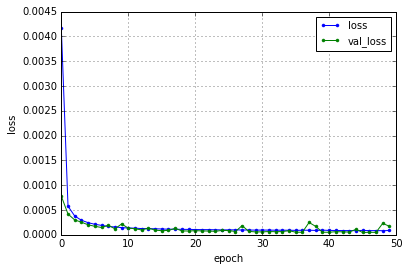

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 3)
(15918, 64, 3)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0237 - val_loss: 0.0097
Epoch 2/50
1s - loss: 0.0074 - val_loss: 0.0059
Epoch 3/50
1s - loss: 0.0053 - val_loss: 0.0047
Epoch 4/50
1s - loss: 0.0042 - val_loss: 0.0038
Epoch 5/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 6/50
1s - loss: 0.0031 - val_loss: 0.0030
Epoch 7/50
1s - loss: 0.0029 - val_loss: 0.0028
Epoch 8/50
1s - loss: 0.0027 - val_loss: 0.0026
Epoch 9/50
1s - loss: 0.0026 - val_loss: 0.0025
Epoch 10/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 11/50
1s - loss: 0.0024 - val_loss: 0.0024
Epoch 12/50
1s - loss: 0.0023 - val_loss: 0.0023
Epoch 13/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0022 - val_loss: 0.0022
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 16/50
1s - l

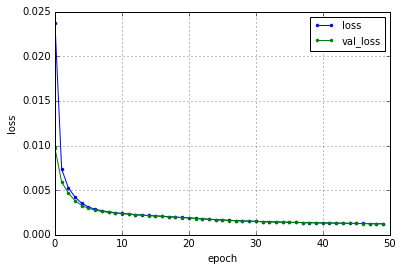

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0170 - val_loss: 0.0071
Epoch 2/50
1s - loss: 0.0054 - val_loss: 0.0042
Epoch 3/50
1s - loss: 0.0037 - val_loss: 0.0032
Epoch 4/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 5/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 6/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 8/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 17/50
1s - loss: 0.0010 - val_loss: 9.8122e-04
Epoch 18/50
1s - loss: 9.6143e-04 - val_loss: 9.3131e-04
Epoch 19/50
1s - loss: 9.1405e-04 - val_loss: 8.88

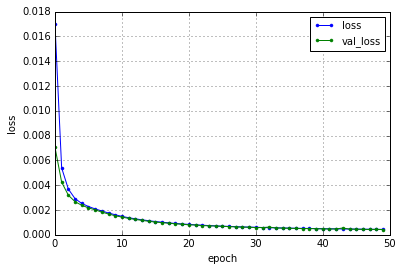

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0164 - val_loss: 0.0055
Epoch 2/50
1s - loss: 0.0042 - val_loss: 0.0033
Epoch 3/50
1s - loss: 0.0027 - val_loss: 0.0023
Epoch 4/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 6/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 9/50
1s - loss: 0.0010 - val_loss: 9.7529e-04
Epoch 10/50
1s - loss: 9.5017e-04 - val_loss: 9.0502e-04
Epoch 11/50
1s - loss: 8.7789e-04 - val_loss: 8.3763e-04
Epoch 12/50
1s - loss: 8.2028e-04 - val_loss: 7.8605e-04
Epoch 13/50
1s - loss: 7.7002e-04 - val_loss: 7.5037e-04
Epoch 14/50
1s - loss: 7.3061e-04 - val_loss: 7.8696e-04
Epoch 15/50
1s - loss: 6.8909e-04 - val_loss: 6.6769e-04
Epoch 16/50
1s - loss: 6.5543e-04 - val_loss: 6.2437e-04
Epoch 17/50
1s - loss: 6.2419e-04 - val_loss: 5.9950e-04
Epoch 18/50
1s - loss: 5.9897e-04 - val_lo

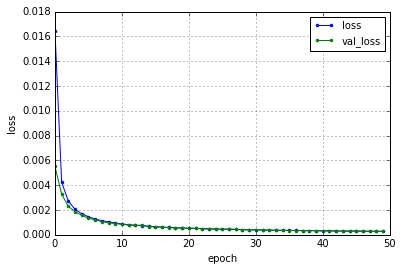

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0157 - val_loss: 0.0046
Epoch 2/50
1s - loss: 0.0034 - val_loss: 0.0027
Epoch 3/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 4/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
1s - loss: 9.7238e-04 - val_loss: 9.1294e-04
Epoch 10/50
1s - loss: 8.7959e-04 - val_loss: 8.3594e-04
Epoch 11/50
1s - loss: 8.1131e-04 - val_loss: 7.7074e-04
Epoch 12/50
1s - loss: 7.5035e-04 - val_loss: 7.1811e-04
Epoch 13/50
1s - loss: 7.0142e-04 - val_loss: 6.6338e-04
Epoch 14/50
1s - loss: 6.5587e-04 - val_loss: 6.2261e-04
Epoch 15/50
1s - loss: 6.1757e-04 - val_loss: 5.9517e-04
Epoch 16/50
1s - loss: 5.8244e-04 - val_loss: 5.5390e-04
Epoch 17/50
1s - loss: 5.4935e-04 - val_loss: 5.2722e-04
Epoch 18/50
1s - loss: 5.2351e-04 - va

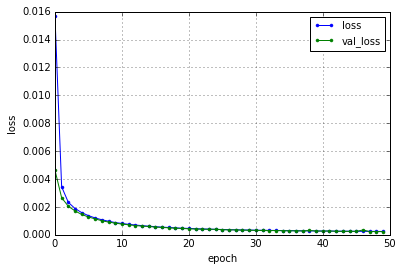

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0104 - val_loss: 0.0030
Epoch 2/50
1s - loss: 0.0022 - val_loss: 0.0017
Epoch 3/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0011 - val_loss: 9.7599e-04
Epoch 5/50
1s - loss: 8.7418e-04 - val_loss: 7.7691e-04
Epoch 6/50
1s - loss: 7.3046e-04 - val_loss: 6.6451e-04
Epoch 7/50
1s - loss: 6.3007e-04 - val_loss: 5.7657e-04
Epoch 8/50
1s - loss: 5.5426e-04 - val_loss: 5.0704e-04
Epoch 9/50
1s - loss: 4.9814e-04 - val_loss: 4.6624e-04
Epoch 10/50
1s - loss: 4.5037e-04 - val_loss: 4.2322e-04
Epoch 11/50
1s - loss: 4.1460e-04 - val_loss: 3.9469e-04
Epoch 12/50
1s - loss: 3.8436e-04 - val_loss: 3.5757e-04
Epoch 13/50
1s - loss: 3.5687e-04 - val_loss: 3.3862e-04
Epoch 14/50
1s - loss: 3.3197e-04 - val_loss: 3.1905e-04
Epoch 15/50
1s - loss: 3.1474e-04 - val_loss: 3.0518e-04
Epoch 16/50
1s - loss: 2.9684e-04 - val_loss: 2.8508e-04
Epoch 17/50
1s - loss: 2.8200e-04 - val_loss: 2.7012e-04
Ep

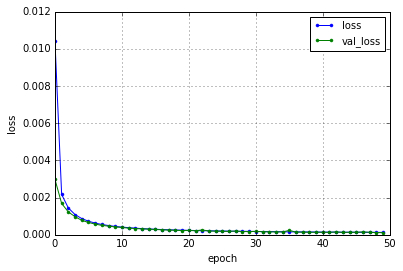

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0071 - val_loss: 0.0018
Epoch 2/50
1s - loss: 0.0013 - val_loss: 0.0010
Epoch 3/50
1s - loss: 8.7616e-04 - val_loss: 7.3181e-04
Epoch 4/50
1s - loss: 6.5440e-04 - val_loss: 5.6920e-04
Epoch 5/50
1s - loss: 5.2808e-04 - val_loss: 4.7300e-04
Epoch 6/50
1s - loss: 4.4809e-04 - val_loss: 4.1159e-04
Epoch 7/50
1s - loss: 3.8809e-04 - val_loss: 3.5474e-04
Epoch 8/50
1s - loss: 3.4564e-04 - val_loss: 3.1912e-04
Epoch 9/50
1s - loss: 3.1191e-04 - val_loss: 2.8914e-04
Epoch 10/50
1s - loss: 2.8700e-04 - val_loss: 2.7006e-04
Epoch 11/50
0s - loss: 2.6450e-04 - val_loss: 2.4542e-04
Epoch 12/50
1s - loss: 2.4569e-04 - val_loss: 2.2787e-04
Epoch 13/50
1s - loss: 2.3017e-04 - val_loss: 2.1629e-04
Epoch 14/50
0s - loss: 2.1632e-04 - val_loss: 2.0318e-04
Epoch 15/50
1s - loss: 2.0522e-04 - val_loss: 1.9490e-04
Epoch 16/50
0s - loss: 1.9446e-04 - val_loss: 1.8746e-04
Epoch 17/50
0s - loss: 1.8549e-04 - val_loss: 1

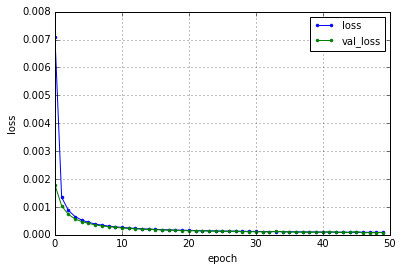

hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.2276 - val_loss: 0.0348
Epoch 2/50
1s - loss: 0.0275 - val_loss: 0.0229
Epoch 3/50
1s - loss: 0.0204 - val_loss: 0.0180
Epoch 4/50
1s - loss: 0.0149 - val_loss: 0.0124
Epoch 5/50
1s - loss: 0.0107 - val_loss: 0.0092
Epoch 6/50
1s - loss: 0.0086 - val_loss: 0.0079
Epoch 7/50
1s - loss: 0.0074 - val_loss: 0.0067
Epoch 8/50
1s - loss: 0.0063 - val_loss: 0.0078
Epoch 9/50
1s - loss: 0.0056 - val_loss: 0.0053
Epoch 10/50
1s - loss: 0.0051 - val_loss: 0.0044
Epoch 11/50
1s - loss: 0.0045 - val_loss: 0.0040
Epoch 12/50
1s - loss: 0.0041 - val_loss: 0.0039
Epoch 13/50
1s - loss: 0.0038 - val_loss: 0.0035
Epoch 14/50
1s - loss: 0.0036 - val_loss: 0.0034
Epoch 15/50
1s - loss: 0.0034 - val_loss: 0.0029
Epoch 16/50
1s - loss: 0.0031 - val_loss: 0.0025
Epoch 17/50
1s - loss: 0.0030 - val_loss: 0.0028
Epoch 18/50
1s - loss: 0.0029 - val_loss: 0.0059
Epoch 19/50
1s - loss: 0.0026 - val_loss: 0.0024
Epoch 20/50
1

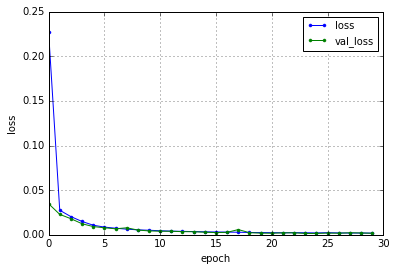

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.1140 - val_loss: 0.0230
Epoch 2/50
1s - loss: 0.0168 - val_loss: 0.0118
Epoch 3/50
1s - loss: 0.0099 - val_loss: 0.0080
Epoch 4/50
1s - loss: 0.0073 - val_loss: 0.0062
Epoch 5/50
1s - loss: 0.0058 - val_loss: 0.0050
Epoch 6/50
1s - loss: 0.0049 - val_loss: 0.0044
Epoch 7/50
0s - loss: 0.0042 - val_loss: 0.0055
Epoch 8/50
1s - loss: 0.0038 - val_loss: 0.0070
Epoch 9/50
1s - loss: 0.0035 - val_loss: 0.0039
Epoch 10/50
1s - loss: 0.0031 - val_loss: 0.0024
Epoch 11/50
1s - loss: 0.0030 - val_loss: 0.0021
Epoch 12/50
1s - loss: 0.0027 - val_loss: 0.0037
Epoch 13/50
1s - loss: 0.0026 - val_loss: 0.0019
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0017
Epoch 15/50
1s - loss: 0.0025 - val_loss: 0.0019
Epoch 16/50
1s - loss: 0.0024 - val_loss: 0.0021
Epoch 17/50
1s - loss: 0.0022 - val_loss: 0.0030
Epoch 18/50
1s - loss: 0.0022 - val_loss: 0.0040
Epoch 19/50
1s - loss: 0.0021 - val_loss: 0.0022
Epoch 20/50
1

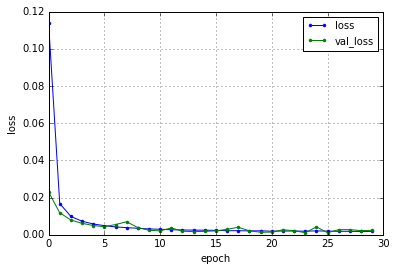

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.1212 - val_loss: 0.0213
Epoch 2/50
1s - loss: 0.0151 - val_loss: 0.0100
Epoch 3/50
1s - loss: 0.0071 - val_loss: 0.0054
Epoch 4/50
1s - loss: 0.0049 - val_loss: 0.0039
Epoch 5/50
1s - loss: 0.0042 - val_loss: 0.0056
Epoch 6/50
1s - loss: 0.0037 - val_loss: 0.0028
Epoch 7/50
1s - loss: 0.0033 - val_loss: 0.0029
Epoch 8/50
1s - loss: 0.0029 - val_loss: 0.0021
Epoch 9/50
1s - loss: 0.0028 - val_loss: 0.0034
Epoch 10/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 11/50
1s - loss: 0.0025 - val_loss: 0.0016
Epoch 12/50
1s - loss: 0.0023 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0025 - val_loss: 0.0015
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0026
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0022 - val_loss: 0.0013
Epoch 17/50
1s - loss: 0.0022 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0020 - val_loss: 0.0033
Epoch 19/50
1s - loss: 0.0023 - val_loss: 0.0018
Epoch 20/50


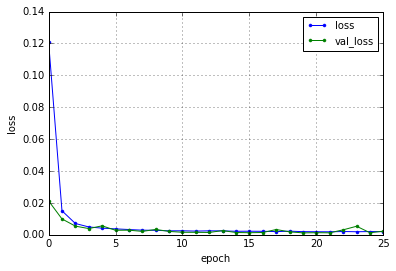

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0829 - val_loss: 0.0146
Epoch 2/50
1s - loss: 0.0096 - val_loss: 0.0068
Epoch 3/50
1s - loss: 0.0052 - val_loss: 0.0038
Epoch 4/50
1s - loss: 0.0039 - val_loss: 0.0042
Epoch 5/50
1s - loss: 0.0034 - val_loss: 0.0044
Epoch 6/50
1s - loss: 0.0029 - val_loss: 0.0020
Epoch 7/50
1s - loss: 0.0027 - val_loss: 0.0018
Epoch 8/50
1s - loss: 0.0027 - val_loss: 0.0017
Epoch 9/50
1s - loss: 0.0026 - val_loss: 0.0034
Epoch 10/50
1s - loss: 0.0022 - val_loss: 0.0014
Epoch 11/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0017
Epoch 13/50
1s - loss: 0.0022 - val_loss: 0.0022
Epoch 14/50
1s - loss: 0.0021 - val_loss: 0.0014
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0021 - val_loss: 0.0013
Epoch 17/50
1s - loss: 0.0020 - val_loss: 0.0015
Epoch 18/50
1s - loss: 0.0020 - val_loss: 0.0020
Epoch 19/50
1s - loss: 0.0022 - val_loss: 0.0011
Epoch 20/50


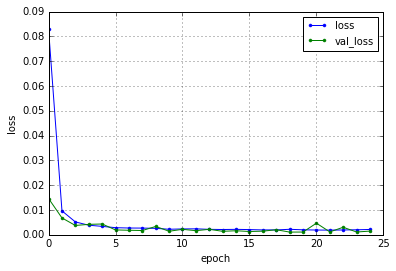

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0497 - val_loss: 0.0078
Epoch 2/50
1s - loss: 0.0051 - val_loss: 0.0036
Epoch 3/50
1s - loss: 0.0033 - val_loss: 0.0046
Epoch 4/50
1s - loss: 0.0027 - val_loss: 0.0023
Epoch 5/50
1s - loss: 0.0025 - val_loss: 0.0056
Epoch 6/50
1s - loss: 0.0022 - val_loss: 0.0036
Epoch 7/50
1s - loss: 0.0023 - val_loss: 0.0035
Epoch 8/50
1s - loss: 0.0024 - val_loss: 0.0019
Epoch 9/50
1s - loss: 0.0022 - val_loss: 0.0018
Epoch 10/50
1s - loss: 0.0021 - val_loss: 0.0040
Epoch 11/50
1s - loss: 0.0021 - val_loss: 0.0012
Epoch 12/50
1s - loss: 0.0022 - val_loss: 0.0034
Epoch 13/50
1s - loss: 0.0020 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 15/50
1s - loss: 0.0021 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0020 - val_loss: 0.0023
Epoch 17/50
1s - loss: 0.0020 - val_loss: 0.0016


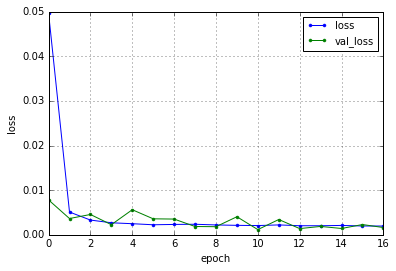

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0357 - val_loss: 0.0054
Epoch 2/50
1s - loss: 0.0031 - val_loss: 0.0020
Epoch 3/50
0s - loss: 0.0027 - val_loss: 0.0015
Epoch 4/50
0s - loss: 0.0023 - val_loss: 0.0039
Epoch 5/50
1s - loss: 0.0021 - val_loss: 0.0012
Epoch 6/50
1s - loss: 0.0021 - val_loss: 0.0036
Epoch 7/50
1s - loss: 0.0022 - val_loss: 0.0023
Epoch 8/50
1s - loss: 0.0021 - val_loss: 0.0054
Epoch 9/50
1s - loss: 0.0022 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0022 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0021 - val_loss: 0.0037
Epoch 12/50
1s - loss: 0.0021 - val_loss: 0.0036
Epoch 13/50
1s - loss: 0.0021 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0022 - val_loss: 0.0016
Epoch 15/50
1s - loss: 0.0021 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0021 - val_loss: 9.5555e-04
Epoch 17/50
1s - loss: 0.0019 - val_loss: 0.0035
Epoch 18/50
1s - loss: 0.0020 - val_loss: 0.0028
Epoch 19/50
1s - loss: 0.0019 - val_loss: 0.0011
Epoch 20

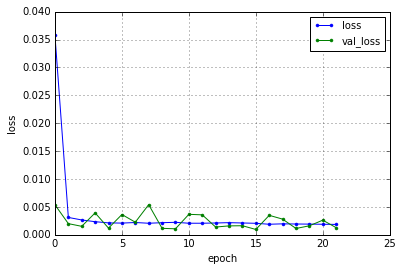

hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0557 - val_loss: 0.0288
Epoch 2/50
1s - loss: 0.0235 - val_loss: 0.0196
Epoch 3/50
1s - loss: 0.0175 - val_loss: 0.0157
Epoch 4/50
1s - loss: 0.0144 - val_loss: 0.0132
Epoch 5/50
1s - loss: 0.0121 - val_loss: 0.0111
Epoch 6/50
1s - loss: 0.0104 - val_loss: 0.0097
Epoch 7/50
1s - loss: 0.0092 - val_loss: 0.0088
Epoch 8/50
1s - loss: 0.0083 - val_loss: 0.0079
Epoch 9/50
1s - loss: 0.0076 - val_loss: 0.0072
Epoch 10/50
1s - loss: 0.0069 - val_loss: 0.0066
Epoch 11/50
1s - loss: 0.0064 - val_loss: 0.0060
Epoch 12/50
1s - loss: 0.0058 - val_loss: 0.0056
Epoch 13/50
1s - loss: 0.0053 - val_loss: 0.0051
Epoch 14/50
1s - loss: 0.0049 - val_loss: 0.0047
Epoch 15/50
1s - loss: 0.0046 - val_loss: 0.0044
Epoch 16/50
1s - loss: 0.0043 - val_loss: 0.0041
Epoch 17/50
1s - loss: 0.0041 - val_loss: 0.0040
Epoch 18/50
1s - loss: 0.0039 - val_loss: 0.0038
Epoch 19/50
1s - loss: 0.0037 - val_loss: 0.0036
Epoch 20/50
1

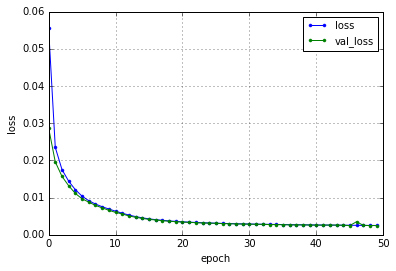

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0526 - val_loss: 0.0220
Epoch 2/50
1s - loss: 0.0162 - val_loss: 0.0122
Epoch 3/50
1s - loss: 0.0101 - val_loss: 0.0084
Epoch 4/50
1s - loss: 0.0074 - val_loss: 0.0066
Epoch 5/50
1s - loss: 0.0060 - val_loss: 0.0054
Epoch 6/50
1s - loss: 0.0049 - val_loss: 0.0045
Epoch 7/50
1s - loss: 0.0042 - val_loss: 0.0039
Epoch 8/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0033 - val_loss: 0.0031
Epoch 10/50
1s - loss: 0.0030 - val_loss: 0.0028
Epoch 11/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 13/50
1s - loss: 0.0024 - val_loss: 0.0024
Epoch 14/50
1s - loss: 0.0022 - val_loss: 0.0022
Epoch 15/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 16/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 17/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 18/50
1s - loss: 0.0018 - val_loss: 0.0018
Epoch 19/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 20/50
1

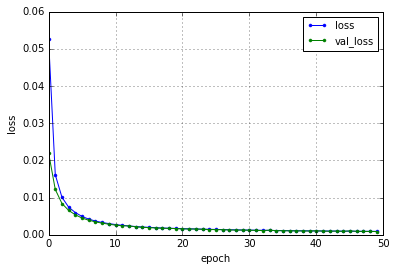

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0421 - val_loss: 0.0156
Epoch 2/50
1s - loss: 0.0111 - val_loss: 0.0081
Epoch 3/50
1s - loss: 0.0067 - val_loss: 0.0056
Epoch 4/50
1s - loss: 0.0049 - val_loss: 0.0043
Epoch 5/50
1s - loss: 0.0039 - val_loss: 0.0035
Epoch 6/50
1s - loss: 0.0033 - val_loss: 0.0030
Epoch 7/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 8/50
1s - loss: 0.0026 - val_loss: 0.0024
Epoch 9/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 10/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 11/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 12/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 14/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 15/50
1s - loss: 0.0014 - val_loss: 0.0015
Epoch 16/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 17/50
1s - loss: 0.0013 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 19/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 20/50


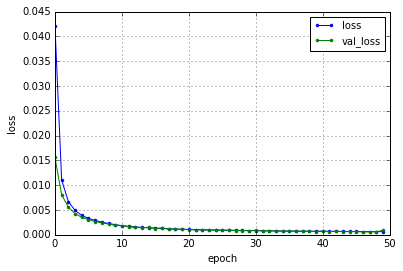

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0384 - val_loss: 0.0119
Epoch 2/50
1s - loss: 0.0082 - val_loss: 0.0061
Epoch 3/50
1s - loss: 0.0051 - val_loss: 0.0043
Epoch 4/50
1s - loss: 0.0038 - val_loss: 0.0033
Epoch 5/50
1s - loss: 0.0031 - val_loss: 0.0028
Epoch 6/50
1s - loss: 0.0027 - val_loss: 0.0025
Epoch 7/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 8/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 9/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 14/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 17/50
1s - loss: 0.0010 - val_loss: 9.6898e-04
Epoch 18/50
1s - loss: 0.0010 - val_loss: 9.5126e-04
Epoch 19/50
1s - loss: 9.7116e-04 - val_loss: 9.0428e

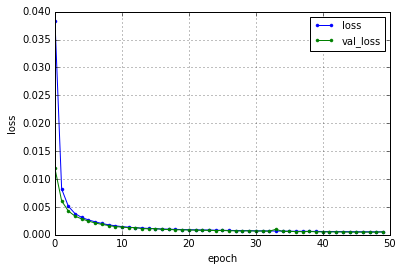

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0289 - val_loss: 0.0065
Epoch 2/50
1s - loss: 0.0045 - val_loss: 0.0032
Epoch 3/50
1s - loss: 0.0026 - val_loss: 0.0021
Epoch 4/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
1s - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 7/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
1s - loss: 0.0011 - val_loss: 9.6299e-04
Epoch 9/50
1s - loss: 9.6316e-04 - val_loss: 8.9853e-04
Epoch 10/50
1s - loss: 8.8547e-04 - val_loss: 8.0888e-04
Epoch 11/50
1s - loss: 8.2148e-04 - val_loss: 7.5236e-04
Epoch 12/50
1s - loss: 7.6750e-04 - val_loss: 6.8402e-04
Epoch 13/50
1s - loss: 7.2545e-04 - val_loss: 7.9313e-04
Epoch 14/50
1s - loss: 6.9083e-04 - val_loss: 6.1791e-04
Epoch 15/50
1s - loss: 6.5175e-04 - val_loss: 7.2161e-04
Epoch 16/50
1s - loss: 6.2407e-04 - val_loss: 5.6372e-04
Epoch 17/50
1s - loss: 6.0439e-04 - val_loss: 5.3407e-04
Epoch 18/50
1s - loss: 5.7322e-04 

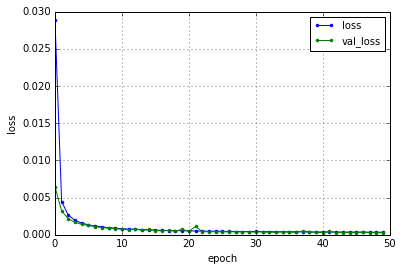

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0201 - val_loss: 0.0032
Epoch 2/50
1s - loss: 0.0023 - val_loss: 0.0017
Epoch 3/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0011 - val_loss: 9.4141e-04
Epoch 5/50
1s - loss: 9.0181e-04 - val_loss: 8.8460e-04
Epoch 6/50
1s - loss: 7.7819e-04 - val_loss: 6.8530e-04
Epoch 7/50
1s - loss: 6.8465e-04 - val_loss: 7.7851e-04
Epoch 8/50
1s - loss: 6.2309e-04 - val_loss: 6.3490e-04
Epoch 9/50
0s - loss: 5.7059e-04 - val_loss: 5.9297e-04
Epoch 10/50
0s - loss: 5.3524e-04 - val_loss: 5.6766e-04
Epoch 11/50
1s - loss: 5.0264e-04 - val_loss: 4.4085e-04
Epoch 12/50
1s - loss: 4.7712e-04 - val_loss: 4.3699e-04
Epoch 13/50
1s - loss: 4.5593e-04 - val_loss: 3.7231e-04
Epoch 14/50
1s - loss: 4.2707e-04 - val_loss: 5.4647e-04
Epoch 15/50
1s - loss: 4.1640e-04 - val_loss: 3.4703e-04
Epoch 16/50
1s - loss: 3.9558e-04 - val_loss: 3.3435e-04
Epoch 17/50
1s - loss: 3.8402e-04 - val_loss: 3.2905e-04
Ep

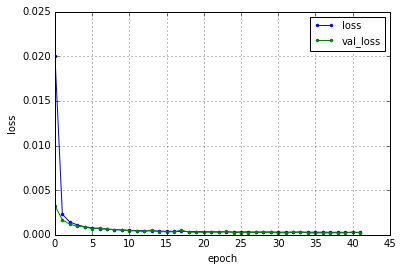

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 3)
(7957, 128, 3)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0416 - val_loss: 0.0237
Epoch 2/50
0s - loss: 0.0216 - val_loss: 0.0199
Epoch 3/50
0s - loss: 0.0183 - val_loss: 0.0167
Epoch 4/50
0s - loss: 0.0153 - val_loss: 0.0139
Epoch 5/50
0s - loss: 0.0129 - val_loss: 0.0119
Epoch 6/50
0s - loss: 0.0111 - val_loss: 0.0103
Epoch 7/50
0s - loss: 0.0098 - val_loss: 0.0093
Epoch 8/50
0s - loss: 0.0089 - val_loss: 0.0085
Epoch 9/50
0s - loss: 0.0082 - val_loss: 0.0079
Epoch 10/50
0s - loss: 0.0077 - val_loss: 0.0074
Epoch 11/50
0s - loss: 0.0072 - val_loss: 0.0069
Epoch 12/50
0s - loss: 0.0067 - val_loss: 0.0065
Epoch 13/50
0s - loss: 0.0063 - val_loss: 0.0062
Epoch 14/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 15/50
0s - loss: 0.0057 - val_loss: 0.0055
Epoch 16/50
0s - los

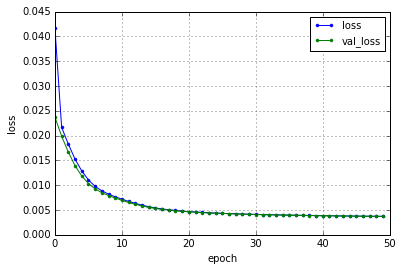

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0403 - val_loss: 0.0211
Epoch 2/50
0s - loss: 0.0183 - val_loss: 0.0157
Epoch 3/50
0s - loss: 0.0134 - val_loss: 0.0112
Epoch 4/50
0s - loss: 0.0098 - val_loss: 0.0086
Epoch 5/50
0s - loss: 0.0078 - val_loss: 0.0071
Epoch 6/50
0s - loss: 0.0066 - val_loss: 0.0061
Epoch 7/50
0s - loss: 0.0058 - val_loss: 0.0055
Epoch 8/50
0s - loss: 0.0052 - val_loss: 0.0050
Epoch 9/50
0s - loss: 0.0048 - val_loss: 0.0046
Epoch 10/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 11/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 12/50
0s - loss: 0.0040 - val_loss: 0.0039
Epoch 13/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 14/50
0s - loss: 0.0036 - val_loss: 0.0036
Epoch 15/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 16/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 17/50
0s - loss: 0.0032 - val_loss: 0.0032
Epoch 18/50
0s - loss: 0.0031 - val_loss: 0.0031
Epoch 19/50
0s - loss: 0.0030 - val_loss: 0.0030
Epoch 20/50
0s 

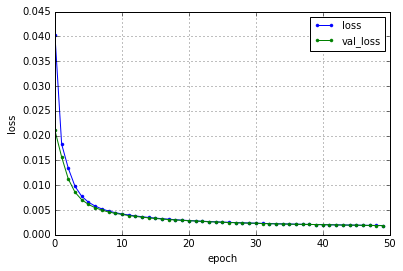

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0420 - val_loss: 0.0201
Epoch 2/50
0s - loss: 0.0169 - val_loss: 0.0139
Epoch 3/50
0s - loss: 0.0118 - val_loss: 0.0099
Epoch 4/50
0s - loss: 0.0087 - val_loss: 0.0078
Epoch 5/50
0s - loss: 0.0072 - val_loss: 0.0066
Epoch 6/50
0s - loss: 0.0062 - val_loss: 0.0058
Epoch 7/50
0s - loss: 0.0055 - val_loss: 0.0052
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0046
Epoch 9/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 10/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 11/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 12/50
0s - loss: 0.0036 - val_loss: 0.0035
Epoch 13/50
0s - loss: 0.0034 - val_loss: 0.0034
Epoch 14/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 15/50
0s - loss: 0.0031 - val_loss: 0.0031
Epoch 16/50
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 17/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 18/50
0s - loss: 0.0028 - val_loss: 0.0028
Epoch 19/50
0s - loss: 0.0027 - val_loss: 0.0027
Epoch 20/50
0s

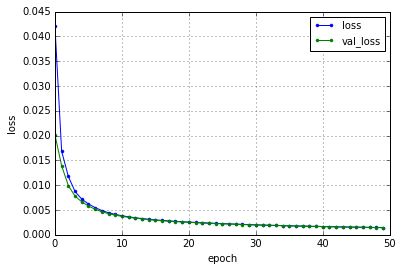

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0369 - val_loss: 0.0187
Epoch 2/50
0s - loss: 0.0151 - val_loss: 0.0115
Epoch 3/50
0s - loss: 0.0091 - val_loss: 0.0074
Epoch 4/50
0s - loss: 0.0065 - val_loss: 0.0058
Epoch 5/50
0s - loss: 0.0053 - val_loss: 0.0049
Epoch 6/50
0s - loss: 0.0046 - val_loss: 0.0044
Epoch 7/50
0s - loss: 0.0042 - val_loss: 0.0040
Epoch 8/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 9/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 11/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 12/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 13/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 14/50
0s - loss: 0.0026 - val_loss: 0.0026
Epoch 15/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 16/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0023
Epoch 18/50
0s - loss: 0.0022 - val_loss: 0.0022
Epoch 19/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 20/50
0s

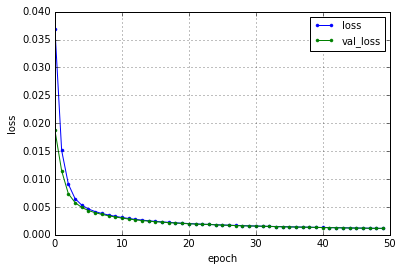

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0288 - val_loss: 0.0132
Epoch 2/50
0s - loss: 0.0093 - val_loss: 0.0067
Epoch 3/50
0s - loss: 0.0056 - val_loss: 0.0047
Epoch 4/50
0s - loss: 0.0042 - val_loss: 0.0038
Epoch 5/50
0s - loss: 0.0035 - val_loss: 0.0033
Epoch 6/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 8/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 9/50
0s - loss: 0.0023 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 17/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 19/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 20/50
0s

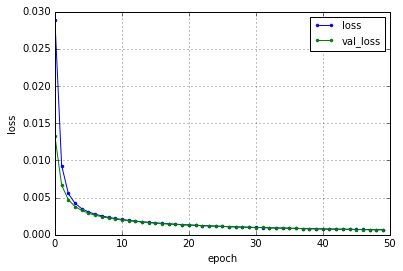

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0237 - val_loss: 0.0081
Epoch 2/50
0s - loss: 0.0058 - val_loss: 0.0044
Epoch 3/50
0s - loss: 0.0038 - val_loss: 0.0033
Epoch 4/50
0s - loss: 0.0030 - val_loss: 0.0027
Epoch 5/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 6/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 7/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 12/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 15/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 16/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 17/50
0s - loss: 0.0010 - val_loss: 9.8813e-04
Epoch 18/50
0s - loss: 9.7473e-04 - val_loss: 9.4636e-04
Epoch 19/50
0s - loss: 9.3338e-04 - val_loss: 9.154

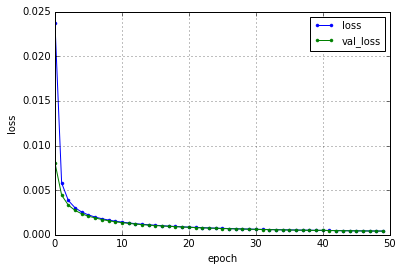

hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.4815 - val_loss: 0.1547
Epoch 2/50
0s - loss: 0.0871 - val_loss: 0.0564
Epoch 3/50
0s - loss: 0.0494 - val_loss: 0.0446
Epoch 4/50
0s - loss: 0.0425 - val_loss: 0.0404
Epoch 5/50
0s - loss: 0.0395 - val_loss: 0.0382
Epoch 6/50
0s - loss: 0.0377 - val_loss: 0.0366
Epoch 7/50
0s - loss: 0.0360 - val_loss: 0.0349
Epoch 8/50
0s - loss: 0.0346 - val_loss: 0.0329
Epoch 9/50
0s - loss: 0.0322 - val_loss: 0.0310
Epoch 10/50
0s - loss: 0.0299 - val_loss: 0.0315
Epoch 11/50
0s - loss: 0.0271 - val_loss: 0.0251
Epoch 12/50
0s - loss: 0.0243 - val_loss: 0.0224
Epoch 13/50
0s - loss: 0.0221 - val_loss: 0.0207
Epoch 14/50
0s - loss: 0.0201 - val_loss: 0.0200
Epoch 15/50
0s - loss: 0.0186 - val_loss: 0.0182
Epoch 16/50
0s - loss: 0.0175 - val_loss: 0.0165
Epoch 17/50
0s - loss: 0.0165 - val_loss: 0.0154
Epoch 18/50
0s - loss: 0.0160 - val_loss: 0.0150
Epoch 19/50
0s - loss: 0.0154 - val_loss: 0.0148
Epoch 20/50
0s 

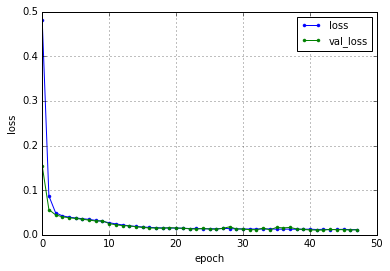

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.3545 - val_loss: 0.0811
Epoch 2/50
0s - loss: 0.0569 - val_loss: 0.0456
Epoch 3/50
0s - loss: 0.0421 - val_loss: 0.0421
Epoch 4/50
0s - loss: 0.0387 - val_loss: 0.0465
Epoch 5/50
0s - loss: 0.0354 - val_loss: 0.0315
Epoch 6/50
0s - loss: 0.0297 - val_loss: 0.0264
Epoch 7/50
0s - loss: 0.0252 - val_loss: 0.0220
Epoch 8/50
0s - loss: 0.0219 - val_loss: 0.0199
Epoch 9/50
0s - loss: 0.0192 - val_loss: 0.0195
Epoch 10/50
0s - loss: 0.0177 - val_loss: 0.0172
Epoch 11/50
0s - loss: 0.0162 - val_loss: 0.0159
Epoch 12/50
0s - loss: 0.0151 - val_loss: 0.0141
Epoch 13/50
0s - loss: 0.0147 - val_loss: 0.0141
Epoch 14/50
0s - loss: 0.0142 - val_loss: 0.0152
Epoch 15/50
0s - loss: 0.0130 - val_loss: 0.0141
Epoch 16/50
0s - loss: 0.0129 - val_loss: 0.0144
Epoch 17/50
0s - loss: 0.0121 - val_loss: 0.0103
Epoch 18/50
0s - loss: 0.0112 - val_loss: 0.0145
Epoch 19/50
0s - loss: 0.0110 - val_loss: 0.0095
Epoch 20/50
0s 

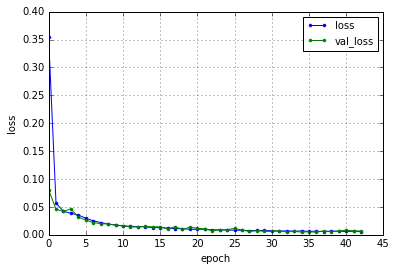

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2876 - val_loss: 0.0536
Epoch 2/50
0s - loss: 0.0441 - val_loss: 0.0369
Epoch 3/50
0s - loss: 0.0327 - val_loss: 0.0302
Epoch 4/50
0s - loss: 0.0271 - val_loss: 0.0267
Epoch 5/50
0s - loss: 0.0240 - val_loss: 0.0241
Epoch 6/50
0s - loss: 0.0214 - val_loss: 0.0239
Epoch 7/50
0s - loss: 0.0196 - val_loss: 0.0213
Epoch 8/50
0s - loss: 0.0184 - val_loss: 0.0161
Epoch 9/50
0s - loss: 0.0160 - val_loss: 0.0153
Epoch 10/50
0s - loss: 0.0144 - val_loss: 0.0127
Epoch 11/50
0s - loss: 0.0133 - val_loss: 0.0108
Epoch 12/50
0s - loss: 0.0118 - val_loss: 0.0133
Epoch 13/50
0s - loss: 0.0113 - val_loss: 0.0144
Epoch 14/50
0s - loss: 0.0103 - val_loss: 0.0083
Epoch 15/50
0s - loss: 0.0098 - val_loss: 0.0077
Epoch 16/50
0s - loss: 0.0090 - val_loss: 0.0101
Epoch 17/50
0s - loss: 0.0085 - val_loss: 0.0120
Epoch 18/50
0s - loss: 0.0080 - val_loss: 0.0063
Epoch 19/50
0s - loss: 0.0077 - val_loss: 0.0102
Epoch 20/50
0s

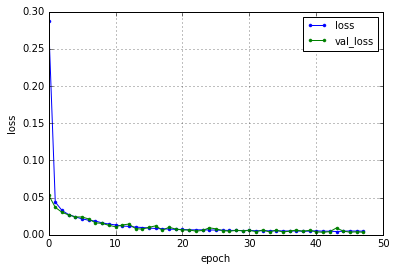

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.3005 - val_loss: 0.0536
Epoch 2/50
0s - loss: 0.0437 - val_loss: 0.0369
Epoch 3/50
0s - loss: 0.0331 - val_loss: 0.0282
Epoch 4/50
0s - loss: 0.0254 - val_loss: 0.0253
Epoch 5/50
0s - loss: 0.0208 - val_loss: 0.0184
Epoch 6/50
0s - loss: 0.0182 - val_loss: 0.0149
Epoch 7/50
0s - loss: 0.0162 - val_loss: 0.0150
Epoch 8/50
0s - loss: 0.0134 - val_loss: 0.0174
Epoch 9/50
0s - loss: 0.0126 - val_loss: 0.0143
Epoch 10/50
0s - loss: 0.0115 - val_loss: 0.0116
Epoch 11/50
0s - loss: 0.0105 - val_loss: 0.0090
Epoch 12/50
0s - loss: 0.0093 - val_loss: 0.0082
Epoch 13/50
0s - loss: 0.0090 - val_loss: 0.0101
Epoch 14/50
0s - loss: 0.0079 - val_loss: 0.0102
Epoch 15/50
0s - loss: 0.0076 - val_loss: 0.0081
Epoch 16/50
0s - loss: 0.0075 - val_loss: 0.0055
Epoch 17/50
0s - loss: 0.0071 - val_loss: 0.0055
Epoch 18/50
0s - loss: 0.0071 - val_loss: 0.0122
Epoch 19/50
0s - loss: 0.0065 - val_loss: 0.0083
Epoch 20/50
0s

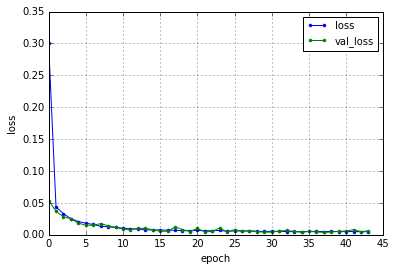

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1672 - val_loss: 0.0376
Epoch 2/50
0s - loss: 0.0280 - val_loss: 0.0206
Epoch 3/50
0s - loss: 0.0182 - val_loss: 0.0138
Epoch 4/50
0s - loss: 0.0146 - val_loss: 0.0109
Epoch 5/50
0s - loss: 0.0114 - val_loss: 0.0130
Epoch 6/50
0s - loss: 0.0102 - val_loss: 0.0074
Epoch 7/50
0s - loss: 0.0092 - val_loss: 0.0094
Epoch 8/50
0s - loss: 0.0078 - val_loss: 0.0080
Epoch 9/50
0s - loss: 0.0071 - val_loss: 0.0051
Epoch 10/50
0s - loss: 0.0066 - val_loss: 0.0100
Epoch 11/50
0s - loss: 0.0063 - val_loss: 0.0089
Epoch 12/50
0s - loss: 0.0061 - val_loss: 0.0040
Epoch 13/50
0s - loss: 0.0059 - val_loss: 0.0061
Epoch 14/50
0s - loss: 0.0055 - val_loss: 0.0042
Epoch 15/50
0s - loss: 0.0055 - val_loss: 0.0073
Epoch 16/50
0s - loss: 0.0058 - val_loss: 0.0050
Epoch 17/50
0s - loss: 0.0050 - val_loss: 0.0041
Epoch 18/50
0s - loss: 0.0050 - val_loss: 0.0038
Epoch 19/50
0s - loss: 0.0052 - val_loss: 0.0044
Epoch 20/50
0s

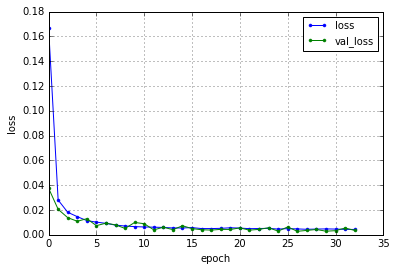

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1045 - val_loss: 0.0279
Epoch 2/50
0s - loss: 0.0206 - val_loss: 0.0141
Epoch 3/50
0s - loss: 0.0133 - val_loss: 0.0126
Epoch 4/50
0s - loss: 0.0101 - val_loss: 0.0101
Epoch 5/50
0s - loss: 0.0080 - val_loss: 0.0097
Epoch 6/50
0s - loss: 0.0070 - val_loss: 0.0078
Epoch 7/50
0s - loss: 0.0069 - val_loss: 0.0046
Epoch 8/50
0s - loss: 0.0064 - val_loss: 0.0083
Epoch 9/50
0s - loss: 0.0063 - val_loss: 0.0056
Epoch 10/50
0s - loss: 0.0057 - val_loss: 0.0067
Epoch 11/50
0s - loss: 0.0054 - val_loss: 0.0038
Epoch 12/50
0s - loss: 0.0053 - val_loss: 0.0077
Epoch 13/50
0s - loss: 0.0049 - val_loss: 0.0034
Epoch 14/50
0s - loss: 0.0052 - val_loss: 0.0050
Epoch 15/50
0s - loss: 0.0049 - val_loss: 0.0036
Epoch 16/50
0s - loss: 0.0046 - val_loss: 0.0077
Epoch 17/50
0s - loss: 0.0048 - val_loss: 0.0027
Epoch 18/50
0s - loss: 0.0046 - val_loss: 0.0065
Epoch 19/50
0s - loss: 0.0047 - val_loss: 0.0042
Epoch 20/50
0s

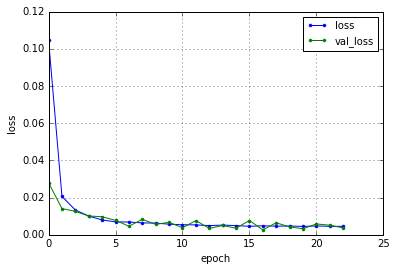

hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1014 - val_loss: 0.0609
Epoch 2/50
0s - loss: 0.0540 - val_loss: 0.0489
Epoch 3/50
0s - loss: 0.0457 - val_loss: 0.0429
Epoch 4/50
0s - loss: 0.0406 - val_loss: 0.0383
Epoch 5/50
0s - loss: 0.0362 - val_loss: 0.0341
Epoch 6/50
0s - loss: 0.0323 - val_loss: 0.0304
Epoch 7/50
0s - loss: 0.0289 - val_loss: 0.0275
Epoch 8/50
0s - loss: 0.0264 - val_loss: 0.0253
Epoch 9/50
0s - loss: 0.0245 - val_loss: 0.0236
Epoch 10/50
0s - loss: 0.0229 - val_loss: 0.0222
Epoch 11/50
0s - loss: 0.0216 - val_loss: 0.0209
Epoch 12/50
0s - loss: 0.0204 - val_loss: 0.0199
Epoch 13/50
0s - loss: 0.0195 - val_loss: 0.0190
Epoch 14/50
0s - loss: 0.0187 - val_loss: 0.0184
Epoch 15/50
0s - loss: 0.0180 - val_loss: 0.0176
Epoch 16/50
0s - loss: 0.0174 - val_loss: 0.0171
Epoch 17/50
0s - loss: 0.0169 - val_loss: 0.0166
Epoch 18/50
0s - loss: 0.0164 - val_loss: 0.0166
Epoch 19/50
0s - loss: 0.0161 - val_loss: 0.0160
Epoch 20/50
0s 

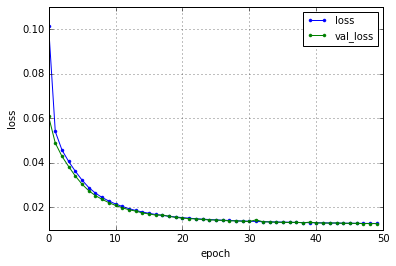

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0987 - val_loss: 0.0544
Epoch 2/50
0s - loss: 0.0478 - val_loss: 0.0423
Epoch 3/50
0s - loss: 0.0380 - val_loss: 0.0343
Epoch 4/50
0s - loss: 0.0309 - val_loss: 0.0280
Epoch 5/50
0s - loss: 0.0257 - val_loss: 0.0235
Epoch 6/50
0s - loss: 0.0217 - val_loss: 0.0200
Epoch 7/50
0s - loss: 0.0187 - val_loss: 0.0174
Epoch 8/50
0s - loss: 0.0164 - val_loss: 0.0153
Epoch 9/50
0s - loss: 0.0146 - val_loss: 0.0138
Epoch 10/50
0s - loss: 0.0133 - val_loss: 0.0127
Epoch 11/50
0s - loss: 0.0122 - val_loss: 0.0118
Epoch 12/50
0s - loss: 0.0114 - val_loss: 0.0110
Epoch 13/50
0s - loss: 0.0107 - val_loss: 0.0104
Epoch 14/50
0s - loss: 0.0101 - val_loss: 0.0097
Epoch 15/50
0s - loss: 0.0096 - val_loss: 0.0092
Epoch 16/50
0s - loss: 0.0091 - val_loss: 0.0088
Epoch 17/50
0s - loss: 0.0087 - val_loss: 0.0086
Epoch 18/50
0s - loss: 0.0083 - val_loss: 0.0082
Epoch 19/50
0s - loss: 0.0080 - val_loss: 0.0079
Epoch 20/50
0s 

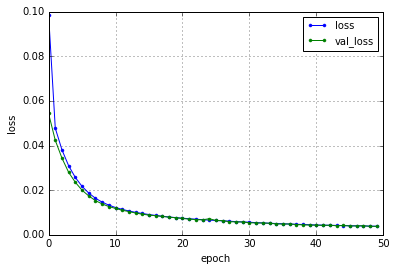

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0918 - val_loss: 0.0491
Epoch 2/50
0s - loss: 0.0418 - val_loss: 0.0356
Epoch 3/50
0s - loss: 0.0312 - val_loss: 0.0272
Epoch 4/50
0s - loss: 0.0242 - val_loss: 0.0214
Epoch 5/50
0s - loss: 0.0194 - val_loss: 0.0177
Epoch 6/50
0s - loss: 0.0162 - val_loss: 0.0150
Epoch 7/50
0s - loss: 0.0140 - val_loss: 0.0131
Epoch 8/50
0s - loss: 0.0124 - val_loss: 0.0117
Epoch 9/50
0s - loss: 0.0111 - val_loss: 0.0104
Epoch 10/50
0s - loss: 0.0100 - val_loss: 0.0094
Epoch 11/50
0s - loss: 0.0091 - val_loss: 0.0087
Epoch 12/50
0s - loss: 0.0084 - val_loss: 0.0080
Epoch 13/50
0s - loss: 0.0078 - val_loss: 0.0075
Epoch 14/50
0s - loss: 0.0073 - val_loss: 0.0072
Epoch 15/50
0s - loss: 0.0069 - val_loss: 0.0069
Epoch 16/50
0s - loss: 0.0066 - val_loss: 0.0063
Epoch 17/50
0s - loss: 0.0063 - val_loss: 0.0060
Epoch 18/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 19/50
0s - loss: 0.0058 - val_loss: 0.0057
Epoch 20/50
0s

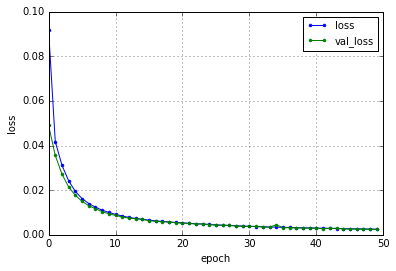

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0866 - val_loss: 0.0451
Epoch 2/50
0s - loss: 0.0362 - val_loss: 0.0291
Epoch 3/50
0s - loss: 0.0250 - val_loss: 0.0217
Epoch 4/50
0s - loss: 0.0193 - val_loss: 0.0171
Epoch 5/50
0s - loss: 0.0155 - val_loss: 0.0142
Epoch 6/50
0s - loss: 0.0129 - val_loss: 0.0117
Epoch 7/50
0s - loss: 0.0110 - val_loss: 0.0101
Epoch 8/50
0s - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
0s - loss: 0.0086 - val_loss: 0.0083
Epoch 10/50
0s - loss: 0.0077 - val_loss: 0.0074
Epoch 11/50
0s - loss: 0.0071 - val_loss: 0.0067
Epoch 12/50
0s - loss: 0.0065 - val_loss: 0.0062
Epoch 13/50
0s - loss: 0.0060 - val_loss: 0.0057
Epoch 14/50
0s - loss: 0.0056 - val_loss: 0.0056
Epoch 15/50
0s - loss: 0.0052 - val_loss: 0.0050
Epoch 16/50
0s - loss: 0.0049 - val_loss: 0.0048
Epoch 17/50
0s - loss: 0.0047 - val_loss: 0.0045
Epoch 18/50
0s - loss: 0.0044 - val_loss: 0.0045
Epoch 19/50
0s - loss: 0.0042 - val_loss: 0.0042
Epoch 20/50
0s

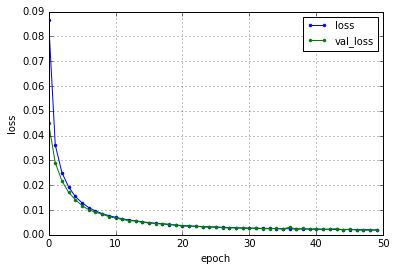

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0683 - val_loss: 0.0323
Epoch 2/50
0s - loss: 0.0239 - val_loss: 0.0177
Epoch 3/50
0s - loss: 0.0144 - val_loss: 0.0116
Epoch 4/50
0s - loss: 0.0099 - val_loss: 0.0086
Epoch 5/50
0s - loss: 0.0076 - val_loss: 0.0072
Epoch 6/50
0s - loss: 0.0063 - val_loss: 0.0058
Epoch 7/50
0s - loss: 0.0053 - val_loss: 0.0049
Epoch 8/50
0s - loss: 0.0047 - val_loss: 0.0043
Epoch 9/50
0s - loss: 0.0042 - val_loss: 0.0039
Epoch 10/50
0s - loss: 0.0038 - val_loss: 0.0036
Epoch 11/50
0s - loss: 0.0035 - val_loss: 0.0033
Epoch 12/50
0s - loss: 0.0033 - val_loss: 0.0033
Epoch 13/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 15/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0026 - val_loss: 0.0029
Epoch 17/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 18/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 19/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 20/50
0s

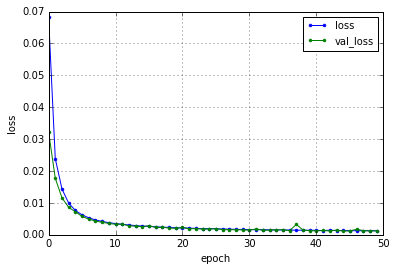

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0627 - val_loss: 0.0221
Epoch 2/50
0s - loss: 0.0145 - val_loss: 0.0098
Epoch 3/50
0s - loss: 0.0080 - val_loss: 0.0065
Epoch 4/50
0s - loss: 0.0057 - val_loss: 0.0049
Epoch 5/50
0s - loss: 0.0044 - val_loss: 0.0040
Epoch 6/50
0s - loss: 0.0037 - val_loss: 0.0033
Epoch 7/50
0s - loss: 0.0032 - val_loss: 0.0029
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0026 - val_loss: 0.0024
Epoch 10/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 11/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0016
Epoch 19/50
0s - loss: 0.0014 - val_loss: 0.0016
Epoch 20/50
0s

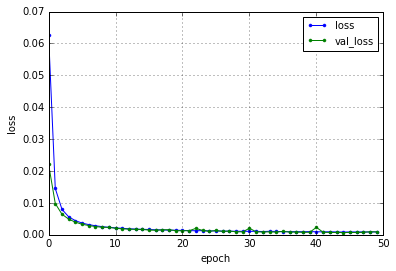

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 3)
(3977, 256, 3)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0650 - val_loss: 0.0544
Epoch 2/50
0s - loss: 0.0435 - val_loss: 0.0344
Epoch 3/50
0s - loss: 0.0309 - val_loss: 0.0287
Epoch 4/50
0s - loss: 0.0279 - val_loss: 0.0273
Epoch 5/50
0s - loss: 0.0270 - val_loss: 0.0267
Epoch 6/50
0s - loss: 0.0264 - val_loss: 0.0262
Epoch 7/50
0s - loss: 0.0259 - val_loss: 0.0257
Epoch 8/50
0s - loss: 0.0255 - val_loss: 0.0253
Epoch 9/50
0s - loss: 0.0251 - val_loss: 0.0249
Epoch 10/50
0s - loss: 0.0247 - val_loss: 0.0245
Epoch 11/50
0s - loss: 0.0243 - val_loss: 0.0241
Epoch 12/50
0s - loss: 0.0239 - val_loss: 0.0237
Epoch 13/50
0s - loss: 0.0235 - val_loss: 0.0233
Epoch 14/50
0s - loss: 0.0231 - val_loss: 0.0229
Epoch 15/50
0s - loss: 0.0227 - val_loss: 0.0224
Epoch 16/50
0s - los

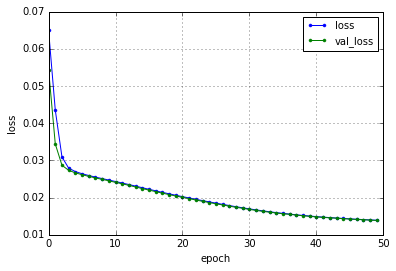

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0678 - val_loss: 0.0569
Epoch 2/50
0s - loss: 0.0440 - val_loss: 0.0332
Epoch 3/50
0s - loss: 0.0295 - val_loss: 0.0274
Epoch 4/50
0s - loss: 0.0267 - val_loss: 0.0261
Epoch 5/50
0s - loss: 0.0257 - val_loss: 0.0252
Epoch 6/50
0s - loss: 0.0249 - val_loss: 0.0244
Epoch 7/50
0s - loss: 0.0240 - val_loss: 0.0236
Epoch 8/50
0s - loss: 0.0231 - val_loss: 0.0226
Epoch 9/50
0s - loss: 0.0222 - val_loss: 0.0217
Epoch 10/50
0s - loss: 0.0212 - val_loss: 0.0207
Epoch 11/50
0s - loss: 0.0203 - val_loss: 0.0198
Epoch 12/50
0s - loss: 0.0193 - val_loss: 0.0189
Epoch 13/50
0s - loss: 0.0184 - val_loss: 0.0180
Epoch 14/50
0s - loss: 0.0176 - val_loss: 0.0172
Epoch 15/50
0s - loss: 0.0168 - val_loss: 0.0164
Epoch 16/50
0s - loss: 0.0161 - val_loss: 0.0158
Epoch 17/50
0s - loss: 0.0155 - val_loss: 0.0151
Epoch 18/50
0s - loss: 0.0149 - val_loss: 0.0146
Epoch 19/50
0s - loss: 0.0143 - val_loss: 0.0140
Epoch 20/50
0s 

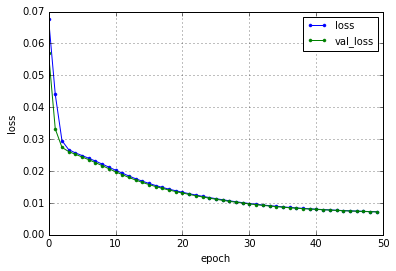

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0609 - val_loss: 0.0457
Epoch 2/50
0s - loss: 0.0358 - val_loss: 0.0292
Epoch 3/50
0s - loss: 0.0271 - val_loss: 0.0258
Epoch 4/50
0s - loss: 0.0251 - val_loss: 0.0244
Epoch 5/50
0s - loss: 0.0238 - val_loss: 0.0232
Epoch 6/50
0s - loss: 0.0226 - val_loss: 0.0220
Epoch 7/50
0s - loss: 0.0214 - val_loss: 0.0207
Epoch 8/50
0s - loss: 0.0201 - val_loss: 0.0195
Epoch 9/50
0s - loss: 0.0189 - val_loss: 0.0183
Epoch 10/50
0s - loss: 0.0177 - val_loss: 0.0172
Epoch 11/50
0s - loss: 0.0167 - val_loss: 0.0161
Epoch 12/50
0s - loss: 0.0157 - val_loss: 0.0152
Epoch 13/50
0s - loss: 0.0148 - val_loss: 0.0143
Epoch 14/50
0s - loss: 0.0139 - val_loss: 0.0135
Epoch 15/50
0s - loss: 0.0131 - val_loss: 0.0128
Epoch 16/50
0s - loss: 0.0124 - val_loss: 0.0121
Epoch 17/50
0s - loss: 0.0118 - val_loss: 0.0115
Epoch 18/50
0s - loss: 0.0112 - val_loss: 0.0109
Epoch 19/50
0s - loss: 0.0107 - val_loss: 0.0104
Epoch 20/50
0s

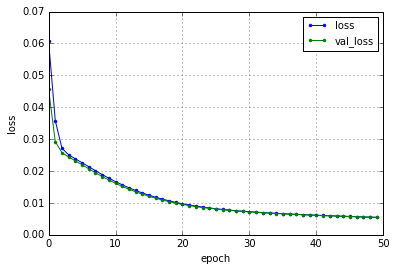

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0583 - val_loss: 0.0398
Epoch 2/50
0s - loss: 0.0311 - val_loss: 0.0263
Epoch 3/50
0s - loss: 0.0252 - val_loss: 0.0243
Epoch 4/50
0s - loss: 0.0238 - val_loss: 0.0232
Epoch 5/50
0s - loss: 0.0226 - val_loss: 0.0220
Epoch 6/50
0s - loss: 0.0214 - val_loss: 0.0207
Epoch 7/50
0s - loss: 0.0201 - val_loss: 0.0194
Epoch 8/50
0s - loss: 0.0188 - val_loss: 0.0181
Epoch 9/50
0s - loss: 0.0175 - val_loss: 0.0169
Epoch 10/50
0s - loss: 0.0163 - val_loss: 0.0157
Epoch 11/50
0s - loss: 0.0152 - val_loss: 0.0147
Epoch 12/50
0s - loss: 0.0142 - val_loss: 0.0137
Epoch 13/50
0s - loss: 0.0133 - val_loss: 0.0128
Epoch 14/50
0s - loss: 0.0124 - val_loss: 0.0120
Epoch 15/50
0s - loss: 0.0117 - val_loss: 0.0113
Epoch 16/50
0s - loss: 0.0110 - val_loss: 0.0106
Epoch 17/50
0s - loss: 0.0104 - val_loss: 0.0101
Epoch 18/50
0s - loss: 0.0098 - val_loss: 0.0095
Epoch 19/50
0s - loss: 0.0093 - val_loss: 0.0091
Epoch 20/50
0s

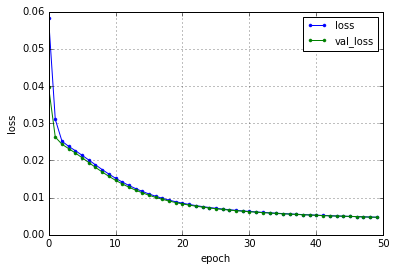

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0546 - val_loss: 0.0335
Epoch 2/50
0s - loss: 0.0275 - val_loss: 0.0246
Epoch 3/50
0s - loss: 0.0235 - val_loss: 0.0225
Epoch 4/50
0s - loss: 0.0217 - val_loss: 0.0208
Epoch 5/50
0s - loss: 0.0199 - val_loss: 0.0190
Epoch 6/50
0s - loss: 0.0181 - val_loss: 0.0172
Epoch 7/50
0s - loss: 0.0164 - val_loss: 0.0155
Epoch 8/50
0s - loss: 0.0147 - val_loss: 0.0139
Epoch 9/50
0s - loss: 0.0132 - val_loss: 0.0125
Epoch 10/50
0s - loss: 0.0119 - val_loss: 0.0113
Epoch 11/50
0s - loss: 0.0108 - val_loss: 0.0102
Epoch 12/50
0s - loss: 0.0098 - val_loss: 0.0093
Epoch 13/50
0s - loss: 0.0090 - val_loss: 0.0086
Epoch 14/50
0s - loss: 0.0083 - val_loss: 0.0079
Epoch 15/50
0s - loss: 0.0077 - val_loss: 0.0074
Epoch 16/50
0s - loss: 0.0072 - val_loss: 0.0070
Epoch 17/50
0s - loss: 0.0068 - val_loss: 0.0066
Epoch 18/50
0s - loss: 0.0064 - val_loss: 0.0063
Epoch 19/50
0s - loss: 0.0062 - val_loss: 0.0060
Epoch 20/50
0s

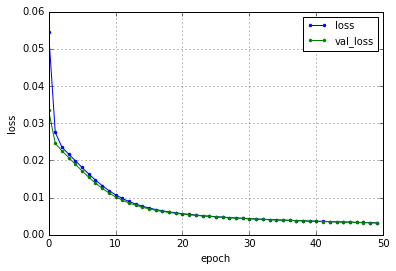

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0505 - val_loss: 0.0275
Epoch 2/50
0s - loss: 0.0236 - val_loss: 0.0211
Epoch 3/50
0s - loss: 0.0195 - val_loss: 0.0178
Epoch 4/50
0s - loss: 0.0165 - val_loss: 0.0150
Epoch 5/50
0s - loss: 0.0138 - val_loss: 0.0125
Epoch 6/50
0s - loss: 0.0115 - val_loss: 0.0105
Epoch 7/50
0s - loss: 0.0097 - val_loss: 0.0089
Epoch 8/50
0s - loss: 0.0083 - val_loss: 0.0077
Epoch 9/50
0s - loss: 0.0073 - val_loss: 0.0069
Epoch 10/50
0s - loss: 0.0066 - val_loss: 0.0062
Epoch 11/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 12/50
0s - loss: 0.0056 - val_loss: 0.0054
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0051
Epoch 14/50
0s - loss: 0.0050 - val_loss: 0.0049
Epoch 15/50
0s - loss: 0.0048 - val_loss: 0.0046
Epoch 16/50
0s - loss: 0.0046 - val_loss: 0.0045
Epoch 17/50
0s - loss: 0.0044 - val_loss: 0.0043
Epoch 18/50
0s - loss: 0.0043 - val_loss: 0.0042
Epoch 19/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 20/50
0s

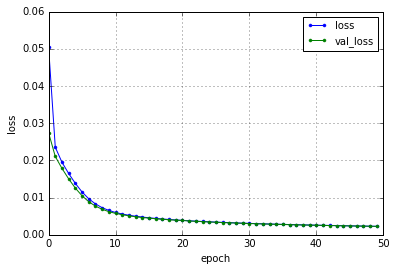

hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.8874 - val_loss: 0.6904
Epoch 2/50
0s - loss: 0.5439 - val_loss: 0.4137
Epoch 3/50
0s - loss: 0.3277 - val_loss: 0.2518
Epoch 4/50
0s - loss: 0.2023 - val_loss: 0.1589
Epoch 5/50
0s - loss: 0.1311 - val_loss: 0.1071
Epoch 6/50
0s - loss: 0.0922 - val_loss: 0.0794
Epoch 7/50
0s - loss: 0.0721 - val_loss: 0.0661
Epoch 8/50
0s - loss: 0.0629 - val_loss: 0.0603
Epoch 9/50
0s - loss: 0.0589 - val_loss: 0.0578
Epoch 10/50
0s - loss: 0.0570 - val_loss: 0.0563
Epoch 11/50
0s - loss: 0.0558 - val_loss: 0.0551
Epoch 12/50
0s - loss: 0.0545 - val_loss: 0.0543
Epoch 13/50
0s - loss: 0.0537 - val_loss: 0.0557
Epoch 14/50
0s - loss: 0.0531 - val_loss: 0.0529
Epoch 15/50
0s - loss: 0.0526 - val_loss: 0.0537
Epoch 16/50
0s - loss: 0.0523 - val_loss: 0.0532
Epoch 17/50
0s - loss: 0.0520 - val_loss: 0.0517
Epoch 18/50
0s - loss: 0.0518 - val_loss: 0.0533
Epoch 19/50
0s - loss: 0.0515 - val_loss: 0.0512
Epoch 20/50
0s 

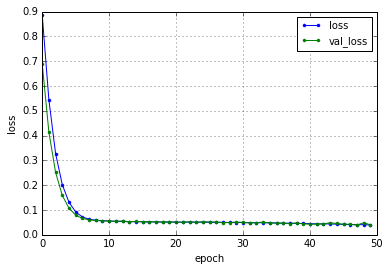

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.8661 - val_loss: 0.6160
Epoch 2/50
0s - loss: 0.4307 - val_loss: 0.2825
Epoch 3/50
0s - loss: 0.2043 - val_loss: 0.1425
Epoch 4/50
0s - loss: 0.1106 - val_loss: 0.0858
Epoch 5/50
0s - loss: 0.0740 - val_loss: 0.0653
Epoch 6/50
0s - loss: 0.0617 - val_loss: 0.0590
Epoch 7/50
0s - loss: 0.0573 - val_loss: 0.0559
Epoch 8/50
0s - loss: 0.0550 - val_loss: 0.0551
Epoch 9/50
0s - loss: 0.0539 - val_loss: 0.0534
Epoch 10/50
0s - loss: 0.0531 - val_loss: 0.0531
Epoch 11/50
0s - loss: 0.0524 - val_loss: 0.0521
Epoch 12/50
0s - loss: 0.0518 - val_loss: 0.0556
Epoch 13/50
0s - loss: 0.0515 - val_loss: 0.0512
Epoch 14/50
0s - loss: 0.0515 - val_loss: 0.0504
Epoch 15/50
0s - loss: 0.0508 - val_loss: 0.0519
Epoch 16/50
0s - loss: 0.0509 - val_loss: 0.0511
Epoch 17/50
0s - loss: 0.0498 - val_loss: 0.0498
Epoch 18/50
0s - loss: 0.0490 - val_loss: 0.0494
Epoch 19/50
0s - loss: 0.0485 - val_loss: 0.0472
Epoch 20/50
0s 

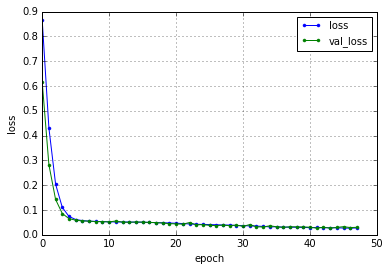

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.7110 - val_loss: 0.4114
Epoch 2/50
0s - loss: 0.2667 - val_loss: 0.1624
Epoch 3/50
0s - loss: 0.1175 - val_loss: 0.0854
Epoch 4/50
0s - loss: 0.0725 - val_loss: 0.0637
Epoch 5/50
0s - loss: 0.0605 - val_loss: 0.0583
Epoch 6/50
0s - loss: 0.0568 - val_loss: 0.0555
Epoch 7/50
0s - loss: 0.0547 - val_loss: 0.0540
Epoch 8/50
0s - loss: 0.0533 - val_loss: 0.0535
Epoch 9/50
0s - loss: 0.0523 - val_loss: 0.0542
Epoch 10/50
0s - loss: 0.0515 - val_loss: 0.0507
Epoch 11/50
0s - loss: 0.0507 - val_loss: 0.0522
Epoch 12/50
0s - loss: 0.0497 - val_loss: 0.0511
Epoch 13/50
0s - loss: 0.0490 - val_loss: 0.0481
Epoch 14/50
0s - loss: 0.0482 - val_loss: 0.0502
Epoch 15/50
0s - loss: 0.0465 - val_loss: 0.0457
Epoch 16/50
0s - loss: 0.0456 - val_loss: 0.0423
Epoch 17/50
0s - loss: 0.0441 - val_loss: 0.0526
Epoch 18/50
0s - loss: 0.0426 - val_loss: 0.0429
Epoch 19/50
0s - loss: 0.0416 - val_loss: 0.0408
Epoch 20/50
0s

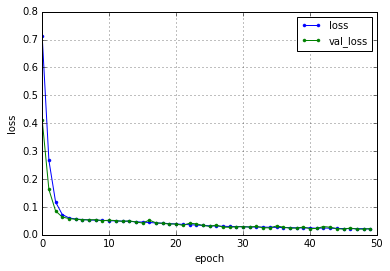

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.6500 - val_loss: 0.2656
Epoch 2/50
0s - loss: 0.1463 - val_loss: 0.0811
Epoch 3/50
0s - loss: 0.0669 - val_loss: 0.0595
Epoch 4/50
0s - loss: 0.0575 - val_loss: 0.0557
Epoch 5/50
0s - loss: 0.0548 - val_loss: 0.0551
Epoch 6/50
0s - loss: 0.0535 - val_loss: 0.0538
Epoch 7/50
0s - loss: 0.0524 - val_loss: 0.0523
Epoch 8/50
0s - loss: 0.0514 - val_loss: 0.0520
Epoch 9/50
0s - loss: 0.0505 - val_loss: 0.0527
Epoch 10/50
0s - loss: 0.0496 - val_loss: 0.0482
Epoch 11/50
0s - loss: 0.0481 - val_loss: 0.0485
Epoch 12/50
0s - loss: 0.0466 - val_loss: 0.0512
Epoch 13/50
0s - loss: 0.0447 - val_loss: 0.0450
Epoch 14/50
0s - loss: 0.0419 - val_loss: 0.0418
Epoch 15/50
0s - loss: 0.0408 - val_loss: 0.0375
Epoch 16/50
0s - loss: 0.0382 - val_loss: 0.0351
Epoch 17/50
0s - loss: 0.0361 - val_loss: 0.0354
Epoch 18/50
0s - loss: 0.0342 - val_loss: 0.0374
Epoch 19/50
0s - loss: 0.0319 - val_loss: 0.0317
Epoch 20/50
0s

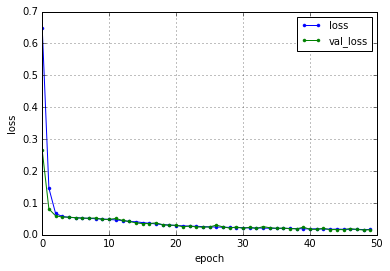

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.4448 - val_loss: 0.0917
Epoch 2/50
0s - loss: 0.0648 - val_loss: 0.0561
Epoch 3/50
0s - loss: 0.0544 - val_loss: 0.0529
Epoch 4/50
0s - loss: 0.0510 - val_loss: 0.0492
Epoch 5/50
0s - loss: 0.0470 - val_loss: 0.0450
Epoch 6/50
0s - loss: 0.0427 - val_loss: 0.0439
Epoch 7/50
0s - loss: 0.0391 - val_loss: 0.0361
Epoch 8/50
0s - loss: 0.0360 - val_loss: 0.0354
Epoch 9/50
0s - loss: 0.0334 - val_loss: 0.0363
Epoch 10/50
0s - loss: 0.0312 - val_loss: 0.0320
Epoch 11/50
0s - loss: 0.0297 - val_loss: 0.0270
Epoch 12/50
0s - loss: 0.0281 - val_loss: 0.0274
Epoch 13/50
0s - loss: 0.0269 - val_loss: 0.0259
Epoch 14/50
0s - loss: 0.0253 - val_loss: 0.0255
Epoch 15/50
0s - loss: 0.0248 - val_loss: 0.0213
Epoch 16/50
0s - loss: 0.0233 - val_loss: 0.0264
Epoch 17/50
0s - loss: 0.0233 - val_loss: 0.0205
Epoch 18/50
0s - loss: 0.0217 - val_loss: 0.0201
Epoch 19/50
0s - loss: 0.0212 - val_loss: 0.0282
Epoch 20/50
0s

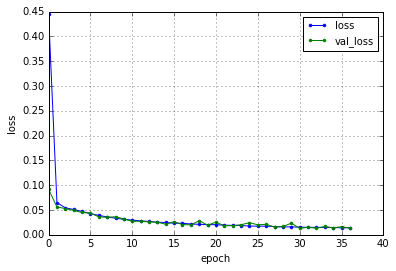

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.3311 - val_loss: 0.0634
Epoch 2/50
0s - loss: 0.0557 - val_loss: 0.0529
Epoch 3/50
0s - loss: 0.0507 - val_loss: 0.0487
Epoch 4/50
0s - loss: 0.0454 - val_loss: 0.0431
Epoch 5/50
0s - loss: 0.0389 - val_loss: 0.0360
Epoch 6/50
0s - loss: 0.0335 - val_loss: 0.0310
Epoch 7/50
0s - loss: 0.0302 - val_loss: 0.0273
Epoch 8/50
0s - loss: 0.0272 - val_loss: 0.0381
Epoch 9/50
0s - loss: 0.0250 - val_loss: 0.0325
Epoch 10/50
0s - loss: 0.0232 - val_loss: 0.0221
Epoch 11/50
0s - loss: 0.0216 - val_loss: 0.0245
Epoch 12/50
0s - loss: 0.0208 - val_loss: 0.0208
Epoch 13/50
0s - loss: 0.0195 - val_loss: 0.0178
Epoch 14/50
0s - loss: 0.0187 - val_loss: 0.0184
Epoch 15/50
0s - loss: 0.0175 - val_loss: 0.0152
Epoch 16/50
0s - loss: 0.0173 - val_loss: 0.0157
Epoch 17/50
0s - loss: 0.0161 - val_loss: 0.0191
Epoch 18/50
0s - loss: 0.0156 - val_loss: 0.0149
Epoch 19/50
0s - loss: 0.0148 - val_loss: 0.0137
Epoch 20/50
0s

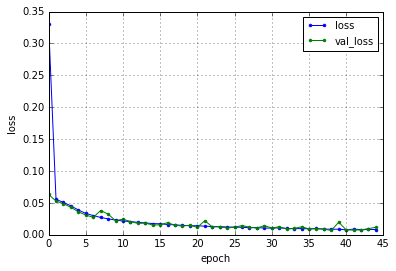

hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1751 - val_loss: 0.1319
Epoch 2/50
0s - loss: 0.1035 - val_loss: 0.0846
Epoch 3/50
0s - loss: 0.0778 - val_loss: 0.0727
Epoch 4/50
0s - loss: 0.0697 - val_loss: 0.0671
Epoch 5/50
0s - loss: 0.0653 - val_loss: 0.0635
Epoch 6/50
0s - loss: 0.0622 - val_loss: 0.0610
Epoch 7/50
0s - loss: 0.0600 - val_loss: 0.0590
Epoch 8/50
0s - loss: 0.0583 - val_loss: 0.0576
Epoch 9/50
0s - loss: 0.0571 - val_loss: 0.0565
Epoch 10/50
0s - loss: 0.0561 - val_loss: 0.0557
Epoch 11/50
0s - loss: 0.0553 - val_loss: 0.0550
Epoch 12/50
0s - loss: 0.0547 - val_loss: 0.0543
Epoch 13/50
0s - loss: 0.0540 - val_loss: 0.0536
Epoch 14/50
0s - loss: 0.0533 - val_loss: 0.0529
Epoch 15/50
0s - loss: 0.0527 - val_loss: 0.0526
Epoch 16/50
0s - loss: 0.0520 - val_loss: 0.0516
Epoch 17/50
0s - loss: 0.0513 - val_loss: 0.0509
Epoch 18/50
0s - loss: 0.0506 - val_loss: 0.0501
Epoch 19/50
0s - loss: 0.0499 - val_loss: 0.0495
Epoch 20/50
0s 

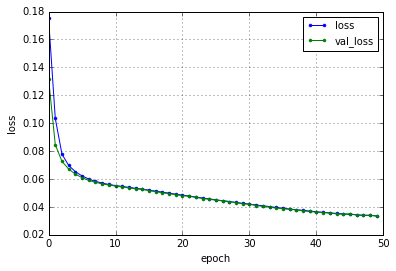

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1662 - val_loss: 0.1069
Epoch 2/50
0s - loss: 0.0829 - val_loss: 0.0704
Epoch 3/50
0s - loss: 0.0665 - val_loss: 0.0634
Epoch 4/50
0s - loss: 0.0615 - val_loss: 0.0596
Epoch 5/50
0s - loss: 0.0583 - val_loss: 0.0572
Epoch 6/50
0s - loss: 0.0561 - val_loss: 0.0550
Epoch 7/50
0s - loss: 0.0543 - val_loss: 0.0539
Epoch 8/50
0s - loss: 0.0529 - val_loss: 0.0522
Epoch 9/50
0s - loss: 0.0515 - val_loss: 0.0509
Epoch 10/50
0s - loss: 0.0501 - val_loss: 0.0493
Epoch 11/50
0s - loss: 0.0486 - val_loss: 0.0480
Epoch 12/50
0s - loss: 0.0471 - val_loss: 0.0462
Epoch 13/50
0s - loss: 0.0456 - val_loss: 0.0447
Epoch 14/50
0s - loss: 0.0441 - val_loss: 0.0433
Epoch 15/50
0s - loss: 0.0426 - val_loss: 0.0418
Epoch 16/50
0s - loss: 0.0411 - val_loss: 0.0403
Epoch 17/50
0s - loss: 0.0397 - val_loss: 0.0390
Epoch 18/50
0s - loss: 0.0383 - val_loss: 0.0375
Epoch 19/50
0s - loss: 0.0371 - val_loss: 0.0364
Epoch 20/50
0s 

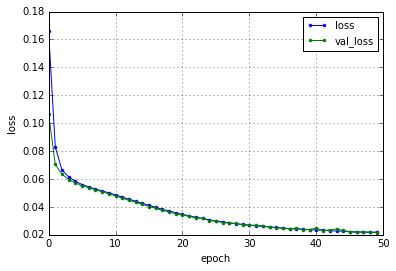

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1501 - val_loss: 0.0915
Epoch 2/50
0s - loss: 0.0750 - val_loss: 0.0665
Epoch 3/50
0s - loss: 0.0634 - val_loss: 0.0609
Epoch 4/50
0s - loss: 0.0591 - val_loss: 0.0576
Epoch 5/50
0s - loss: 0.0563 - val_loss: 0.0550
Epoch 6/50
0s - loss: 0.0539 - val_loss: 0.0530
Epoch 7/50
0s - loss: 0.0519 - val_loss: 0.0510
Epoch 8/50
0s - loss: 0.0498 - val_loss: 0.0486
Epoch 9/50
0s - loss: 0.0477 - val_loss: 0.0469
Epoch 10/50
0s - loss: 0.0455 - val_loss: 0.0443
Epoch 11/50
0s - loss: 0.0432 - val_loss: 0.0427
Epoch 12/50
0s - loss: 0.0411 - val_loss: 0.0399
Epoch 13/50
0s - loss: 0.0389 - val_loss: 0.0378
Epoch 14/50
0s - loss: 0.0369 - val_loss: 0.0359
Epoch 15/50
0s - loss: 0.0349 - val_loss: 0.0344
Epoch 16/50
0s - loss: 0.0332 - val_loss: 0.0326
Epoch 17/50
0s - loss: 0.0316 - val_loss: 0.0309
Epoch 18/50
0s - loss: 0.0303 - val_loss: 0.0295
Epoch 19/50
0s - loss: 0.0290 - val_loss: 0.0282
Epoch 20/50
0s

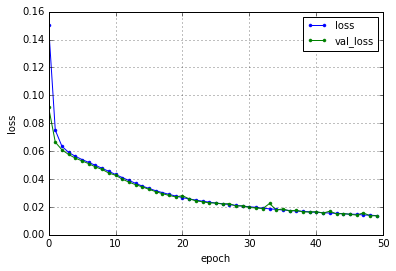

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1664 - val_loss: 0.0965
Epoch 2/50
0s - loss: 0.0743 - val_loss: 0.0642
Epoch 3/50
0s - loss: 0.0611 - val_loss: 0.0585
Epoch 4/50
0s - loss: 0.0566 - val_loss: 0.0549
Epoch 5/50
0s - loss: 0.0534 - val_loss: 0.0518
Epoch 6/50
0s - loss: 0.0505 - val_loss: 0.0490
Epoch 7/50
0s - loss: 0.0476 - val_loss: 0.0461
Epoch 8/50
0s - loss: 0.0446 - val_loss: 0.0431
Epoch 9/50
0s - loss: 0.0416 - val_loss: 0.0405
Epoch 10/50
0s - loss: 0.0388 - val_loss: 0.0374
Epoch 11/50
0s - loss: 0.0362 - val_loss: 0.0351
Epoch 12/50
0s - loss: 0.0340 - val_loss: 0.0332
Epoch 13/50
0s - loss: 0.0320 - val_loss: 0.0317
Epoch 14/50
0s - loss: 0.0303 - val_loss: 0.0307
Epoch 15/50
0s - loss: 0.0288 - val_loss: 0.0283
Epoch 16/50
0s - loss: 0.0274 - val_loss: 0.0274
Epoch 17/50
0s - loss: 0.0263 - val_loss: 0.0256
Epoch 18/50
0s - loss: 0.0252 - val_loss: 0.0252
Epoch 19/50
0s - loss: 0.0243 - val_loss: 0.0237
Epoch 20/50
0s

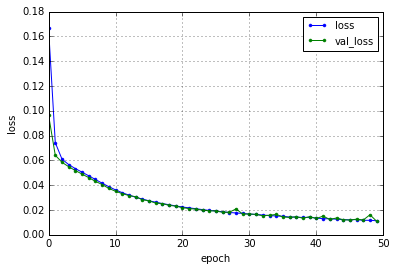

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1350 - val_loss: 0.0680
Epoch 2/50
0s - loss: 0.0608 - val_loss: 0.0565
Epoch 3/50
0s - loss: 0.0537 - val_loss: 0.0508
Epoch 4/50
0s - loss: 0.0482 - val_loss: 0.0455
Epoch 5/50
0s - loss: 0.0431 - val_loss: 0.0409
Epoch 6/50
0s - loss: 0.0384 - val_loss: 0.0361
Epoch 7/50
0s - loss: 0.0342 - val_loss: 0.0323
Epoch 8/50
0s - loss: 0.0307 - val_loss: 0.0294
Epoch 9/50
0s - loss: 0.0277 - val_loss: 0.0267
Epoch 10/50
0s - loss: 0.0252 - val_loss: 0.0242
Epoch 11/50
0s - loss: 0.0231 - val_loss: 0.0227
Epoch 12/50
0s - loss: 0.0212 - val_loss: 0.0211
Epoch 13/50
0s - loss: 0.0197 - val_loss: 0.0192
Epoch 14/50
0s - loss: 0.0184 - val_loss: 0.0177
Epoch 15/50
0s - loss: 0.0172 - val_loss: 0.0170
Epoch 16/50
0s - loss: 0.0161 - val_loss: 0.0165
Epoch 17/50
0s - loss: 0.0153 - val_loss: 0.0151
Epoch 18/50
0s - loss: 0.0144 - val_loss: 0.0139
Epoch 19/50
0s - loss: 0.0137 - val_loss: 0.0135
Epoch 20/50
0s

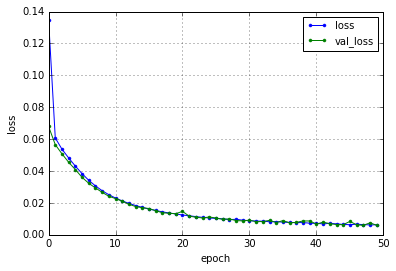

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1144 - val_loss: 0.0602
Epoch 2/50
0s - loss: 0.0545 - val_loss: 0.0492
Epoch 3/50
0s - loss: 0.0449 - val_loss: 0.0406
Epoch 4/50
0s - loss: 0.0368 - val_loss: 0.0334
Epoch 5/50
0s - loss: 0.0301 - val_loss: 0.0271
Epoch 6/50
0s - loss: 0.0249 - val_loss: 0.0228
Epoch 7/50
0s - loss: 0.0210 - val_loss: 0.0194
Epoch 8/50
0s - loss: 0.0181 - val_loss: 0.0168
Epoch 9/50
0s - loss: 0.0159 - val_loss: 0.0149
Epoch 10/50
0s - loss: 0.0141 - val_loss: 0.0135
Epoch 11/50
0s - loss: 0.0128 - val_loss: 0.0125
Epoch 12/50
0s - loss: 0.0117 - val_loss: 0.0115
Epoch 13/50
0s - loss: 0.0107 - val_loss: 0.0107
Epoch 14/50
0s - loss: 0.0099 - val_loss: 0.0099
Epoch 15/50
0s - loss: 0.0093 - val_loss: 0.0089
Epoch 16/50
0s - loss: 0.0087 - val_loss: 0.0084
Epoch 17/50
0s - loss: 0.0082 - val_loss: 0.0081
Epoch 18/50
0s - loss: 0.0078 - val_loss: 0.0077
Epoch 19/50
0s - loss: 0.0074 - val_loss: 0.0075
Epoch 20/50
0s

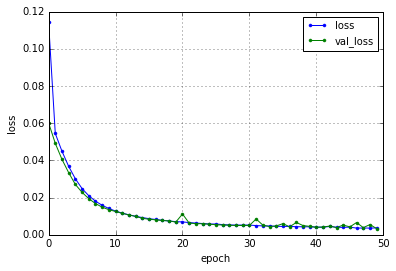

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 3)
(1987, 512, 3)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0714 - val_loss: 0.0697
Epoch 2/50
0s - loss: 0.0681 - val_loss: 0.0662
Epoch 3/50
0s - loss: 0.0643 - val_loss: 0.0620
Epoch 4/50
0s - loss: 0.0597 - val_loss: 0.0569
Epoch 5/50
0s - loss: 0.0545 - val_loss: 0.0515
Epoch 6/50
0s - loss: 0.0493 - val_loss: 0.0466
Epoch 7/50
0s - loss: 0.0447 - val_loss: 0.0426
Epoch 8/50
0s - loss: 0.0411 - val_loss: 0.0395
Epoch 9/50
0s - loss: 0.0384 - val_loss: 0.0372
Epoch 10/50
0s - loss: 0.0364 - val_loss: 0.0356
Epoch 11/50
0s - loss: 0.0350 - val_loss: 0.0344
Epoch 12/50
0s - loss: 0.0340 - val_loss: 0.0336
Epoch 13/50
0s - loss: 0.0333 - val_loss: 0.0330
Epoch 14/50
0s - loss: 0.0328 - val_loss: 0.0325
Epoch 15/50
0s - loss: 0.0324 - val_loss: 0.0322
Epoch 16/50
0s - los

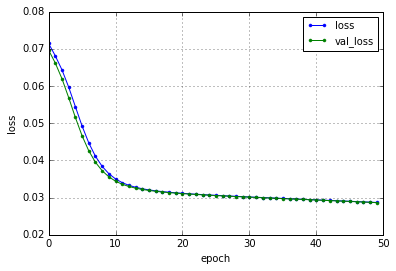

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0732 - val_loss: 0.0700
Epoch 2/50
0s - loss: 0.0682 - val_loss: 0.0658
Epoch 3/50
0s - loss: 0.0636 - val_loss: 0.0608
Epoch 4/50
0s - loss: 0.0581 - val_loss: 0.0548
Epoch 5/50
0s - loss: 0.0521 - val_loss: 0.0488
Epoch 6/50
0s - loss: 0.0463 - val_loss: 0.0436
Epoch 7/50
0s - loss: 0.0416 - val_loss: 0.0396
Epoch 8/50
0s - loss: 0.0381 - val_loss: 0.0366
Epoch 9/50
0s - loss: 0.0357 - val_loss: 0.0347
Epoch 10/50
0s - loss: 0.0340 - val_loss: 0.0333
Epoch 11/50
0s - loss: 0.0329 - val_loss: 0.0325
Epoch 12/50
0s - loss: 0.0322 - val_loss: 0.0318
Epoch 13/50
0s - loss: 0.0316 - val_loss: 0.0314
Epoch 14/50
0s - loss: 0.0312 - val_loss: 0.0311
Epoch 15/50
0s - loss: 0.0309 - val_loss: 0.0308
Epoch 16/50
0s - loss: 0.0307 - val_loss: 0.0305
Epoch 17/50
0s - loss: 0.0304 - val_loss: 0.0303
Epoch 18/50
0s - loss: 0.0302 - val_loss: 0.0301
Epoch 19/50
0s - loss: 0.0300 - val_loss: 0.0299
Epoch 20/50
0s 

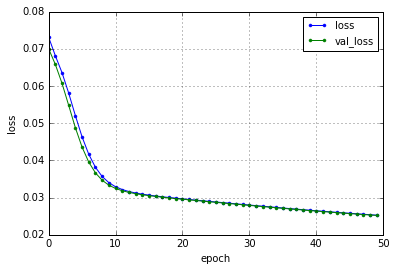

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0736 - val_loss: 0.0700
Epoch 2/50
0s - loss: 0.0678 - val_loss: 0.0650
Epoch 3/50
0s - loss: 0.0622 - val_loss: 0.0586
Epoch 4/50
0s - loss: 0.0552 - val_loss: 0.0512
Epoch 5/50
0s - loss: 0.0480 - val_loss: 0.0443
Epoch 6/50
0s - loss: 0.0418 - val_loss: 0.0390
Epoch 7/50
0s - loss: 0.0373 - val_loss: 0.0356
Epoch 8/50
0s - loss: 0.0345 - val_loss: 0.0334
Epoch 9/50
0s - loss: 0.0328 - val_loss: 0.0321
Epoch 10/50
0s - loss: 0.0317 - val_loss: 0.0314
Epoch 11/50
0s - loss: 0.0311 - val_loss: 0.0309
Epoch 12/50
0s - loss: 0.0307 - val_loss: 0.0305
Epoch 13/50
0s - loss: 0.0304 - val_loss: 0.0303
Epoch 14/50
0s - loss: 0.0302 - val_loss: 0.0301
Epoch 15/50
0s - loss: 0.0300 - val_loss: 0.0299
Epoch 16/50
0s - loss: 0.0298 - val_loss: 0.0297
Epoch 17/50
0s - loss: 0.0296 - val_loss: 0.0295
Epoch 18/50
0s - loss: 0.0295 - val_loss: 0.0294
Epoch 19/50
0s - loss: 0.0293 - val_loss: 0.0292
Epoch 20/50
0s

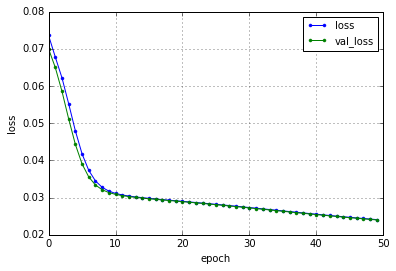

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0737 - val_loss: 0.0701
Epoch 2/50
0s - loss: 0.0678 - val_loss: 0.0646
Epoch 3/50
0s - loss: 0.0613 - val_loss: 0.0570
Epoch 4/50
0s - loss: 0.0530 - val_loss: 0.0482
Epoch 5/50
0s - loss: 0.0445 - val_loss: 0.0406
Epoch 6/50
0s - loss: 0.0381 - val_loss: 0.0356
Epoch 7/50
0s - loss: 0.0342 - val_loss: 0.0328
Epoch 8/50
0s - loss: 0.0321 - val_loss: 0.0313
Epoch 9/50
0s - loss: 0.0310 - val_loss: 0.0306
Epoch 10/50
0s - loss: 0.0304 - val_loss: 0.0301
Epoch 11/50
0s - loss: 0.0300 - val_loss: 0.0298
Epoch 12/50
0s - loss: 0.0297 - val_loss: 0.0296
Epoch 13/50
0s - loss: 0.0295 - val_loss: 0.0294
Epoch 14/50
0s - loss: 0.0293 - val_loss: 0.0292
Epoch 15/50
0s - loss: 0.0292 - val_loss: 0.0290
Epoch 16/50
0s - loss: 0.0290 - val_loss: 0.0289
Epoch 17/50
0s - loss: 0.0288 - val_loss: 0.0287
Epoch 18/50
0s - loss: 0.0286 - val_loss: 0.0285
Epoch 19/50
0s - loss: 0.0284 - val_loss: 0.0283
Epoch 20/50
0s

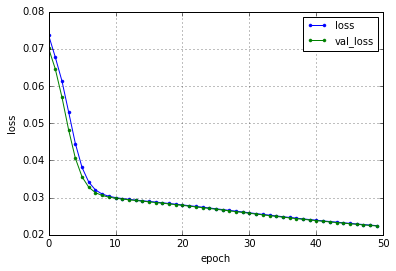

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0770 - val_loss: 0.0695
Epoch 2/50
0s - loss: 0.0654 - val_loss: 0.0604
Epoch 3/50
0s - loss: 0.0558 - val_loss: 0.0504
Epoch 4/50
0s - loss: 0.0463 - val_loss: 0.0417
Epoch 5/50
0s - loss: 0.0388 - val_loss: 0.0359
Epoch 6/50
0s - loss: 0.0343 - val_loss: 0.0327
Epoch 7/50
0s - loss: 0.0318 - val_loss: 0.0310
Epoch 8/50
0s - loss: 0.0305 - val_loss: 0.0301
Epoch 9/50
0s - loss: 0.0298 - val_loss: 0.0295
Epoch 10/50
0s - loss: 0.0293 - val_loss: 0.0291
Epoch 11/50
0s - loss: 0.0289 - val_loss: 0.0288
Epoch 12/50
0s - loss: 0.0286 - val_loss: 0.0284
Epoch 13/50
0s - loss: 0.0283 - val_loss: 0.0282
Epoch 14/50
0s - loss: 0.0280 - val_loss: 0.0279
Epoch 15/50
0s - loss: 0.0278 - val_loss: 0.0276
Epoch 16/50
0s - loss: 0.0275 - val_loss: 0.0273
Epoch 17/50
0s - loss: 0.0272 - val_loss: 0.0270
Epoch 18/50
0s - loss: 0.0269 - val_loss: 0.0267
Epoch 19/50
0s - loss: 0.0266 - val_loss: 0.0264
Epoch 20/50
0s

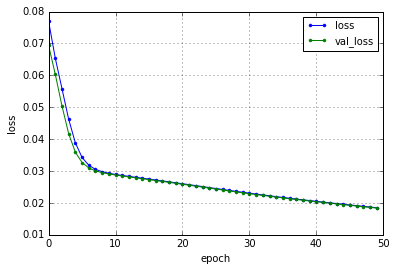

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0781 - val_loss: 0.0662
Epoch 2/50
0s - loss: 0.0596 - val_loss: 0.0519
Epoch 3/50
0s - loss: 0.0463 - val_loss: 0.0404
Epoch 4/50
0s - loss: 0.0372 - val_loss: 0.0340
Epoch 5/50
0s - loss: 0.0325 - val_loss: 0.0311
Epoch 6/50
0s - loss: 0.0304 - val_loss: 0.0297
Epoch 7/50
0s - loss: 0.0292 - val_loss: 0.0288
Epoch 8/50
0s - loss: 0.0284 - val_loss: 0.0280
Epoch 9/50
0s - loss: 0.0278 - val_loss: 0.0274
Epoch 10/50
0s - loss: 0.0271 - val_loss: 0.0268
Epoch 11/50
0s - loss: 0.0266 - val_loss: 0.0262
Epoch 12/50
0s - loss: 0.0260 - val_loss: 0.0257
Epoch 13/50
0s - loss: 0.0255 - val_loss: 0.0252
Epoch 14/50
0s - loss: 0.0250 - val_loss: 0.0247
Epoch 15/50
0s - loss: 0.0244 - val_loss: 0.0242
Epoch 16/50
0s - loss: 0.0240 - val_loss: 0.0237
Epoch 17/50
0s - loss: 0.0235 - val_loss: 0.0232
Epoch 18/50
0s - loss: 0.0230 - val_loss: 0.0228
Epoch 19/50
0s - loss: 0.0226 - val_loss: 0.0223
Epoch 20/50
0s

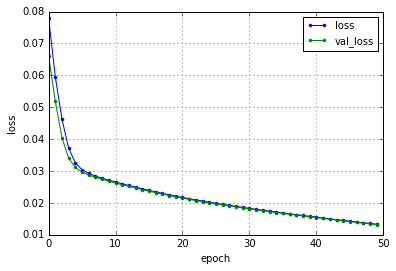

hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 1.0137 - val_loss: 0.9808
Epoch 2/50
0s - loss: 0.9444 - val_loss: 0.8983
Epoch 3/50
0s - loss: 0.8604 - val_loss: 0.8162
Epoch 4/50
0s - loss: 0.7815 - val_loss: 0.7410
Epoch 5/50
0s - loss: 0.7092 - val_loss: 0.6722
Epoch 6/50
0s - loss: 0.6432 - val_loss: 0.6095
Epoch 7/50
0s - loss: 0.5831 - val_loss: 0.5524
Epoch 8/50
0s - loss: 0.5284 - val_loss: 0.5005
Epoch 9/50
0s - loss: 0.4786 - val_loss: 0.4532
Epoch 10/50
0s - loss: 0.4333 - val_loss: 0.4102
Epoch 11/50
0s - loss: 0.3922 - val_loss: 0.3713
Epoch 12/50
0s - loss: 0.3549 - val_loss: 0.3359
Epoch 13/50
0s - loss: 0.3211 - val_loss: 0.3040
Epoch 14/50
0s - loss: 0.2906 - val_loss: 0.2751
Epoch 15/50
0s - loss: 0.2630 - val_loss: 0.2490
Epoch 16/50
0s - loss: 0.2381 - val_loss: 0.2255
Epoch 17/50
0s - loss: 0.2157 - val_loss: 0.2043
Epoch 18/50
0s - loss: 0.1955 - val_loss: 0.1853
Epoch 19/50
0s - loss: 0.1774 - val_loss: 0.1683
Epoch 20/50
0s 

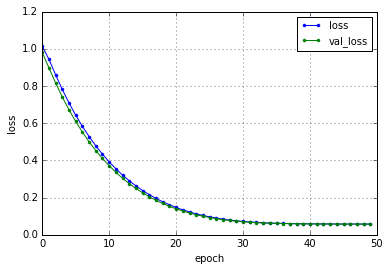

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.9852 - val_loss: 0.9097
Epoch 2/50
0s - loss: 0.8357 - val_loss: 0.7501
Epoch 3/50
0s - loss: 0.6868 - val_loss: 0.6157
Epoch 4/50
0s - loss: 0.5640 - val_loss: 0.5060
Epoch 5/50
0s - loss: 0.4639 - val_loss: 0.4168
Epoch 6/50
0s - loss: 0.3826 - val_loss: 0.3443
Epoch 7/50
0s - loss: 0.3166 - val_loss: 0.2856
Epoch 8/50
0s - loss: 0.2631 - val_loss: 0.2381
Epoch 9/50
0s - loss: 0.2200 - val_loss: 0.1997
Epoch 10/50
0s - loss: 0.1851 - val_loss: 0.1689
Epoch 11/50
0s - loss: 0.1572 - val_loss: 0.1441
Epoch 12/50
0s - loss: 0.1347 - val_loss: 0.1243
Epoch 13/50
0s - loss: 0.1169 - val_loss: 0.1086
Epoch 14/50
0s - loss: 0.1027 - val_loss: 0.0962
Epoch 15/50
0s - loss: 0.0915 - val_loss: 0.0864
Epoch 16/50
0s - loss: 0.0828 - val_loss: 0.0789
Epoch 17/50
0s - loss: 0.0761 - val_loss: 0.0731
Epoch 18/50
0s - loss: 0.0710 - val_loss: 0.0688
Epoch 19/50
0s - loss: 0.0672 - val_loss: 0.0655
Epoch 20/50
0s 

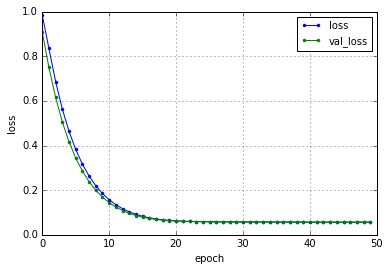

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.9659 - val_loss: 0.8615
Epoch 2/50
0s - loss: 0.7595 - val_loss: 0.6455
Epoch 3/50
0s - loss: 0.5658 - val_loss: 0.4784
Epoch 4/50
0s - loss: 0.4185 - val_loss: 0.3542
Epoch 5/50
0s - loss: 0.3114 - val_loss: 0.2655
Epoch 6/50
0s - loss: 0.2351 - val_loss: 0.2026
Epoch 7/50
0s - loss: 0.1811 - val_loss: 0.1581
Epoch 8/50
0s - loss: 0.1429 - val_loss: 0.1267
Epoch 9/50
0s - loss: 0.1160 - val_loss: 0.1046
Epoch 10/50
0s - loss: 0.0972 - val_loss: 0.0893
Epoch 11/50
0s - loss: 0.0841 - val_loss: 0.0787
Epoch 12/50
0s - loss: 0.0751 - val_loss: 0.0714
Epoch 13/50
0s - loss: 0.0691 - val_loss: 0.0666
Epoch 14/50
0s - loss: 0.0650 - val_loss: 0.0634
Epoch 15/50
0s - loss: 0.0624 - val_loss: 0.0614
Epoch 16/50
0s - loss: 0.0608 - val_loss: 0.0602
Epoch 17/50
0s - loss: 0.0598 - val_loss: 0.0595
Epoch 18/50
0s - loss: 0.0593 - val_loss: 0.0590
Epoch 19/50
0s - loss: 0.0589 - val_loss: 0.0587
Epoch 20/50
0s

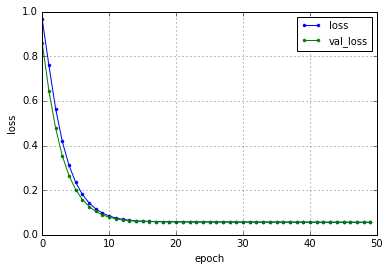

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.9386 - val_loss: 0.7707
Epoch 2/50
0s - loss: 0.6450 - val_loss: 0.5120
Epoch 3/50
0s - loss: 0.4284 - val_loss: 0.3422
Epoch 4/50
0s - loss: 0.2892 - val_loss: 0.2347
Epoch 5/50
0s - loss: 0.2013 - val_loss: 0.1670
Epoch 6/50
0s - loss: 0.1461 - val_loss: 0.1246
Epoch 7/50
0s - loss: 0.1116 - val_loss: 0.0983
Epoch 8/50
0s - loss: 0.0903 - val_loss: 0.0821
Epoch 9/50
0s - loss: 0.0772 - val_loss: 0.0721
Epoch 10/50
0s - loss: 0.0692 - val_loss: 0.0662
Epoch 11/50
0s - loss: 0.0644 - val_loss: 0.0627
Epoch 12/50
0s - loss: 0.0617 - val_loss: 0.0607
Epoch 13/50
0s - loss: 0.0602 - val_loss: 0.0596
Epoch 14/50
0s - loss: 0.0593 - val_loss: 0.0590
Epoch 15/50
0s - loss: 0.0589 - val_loss: 0.0587
Epoch 16/50
0s - loss: 0.0586 - val_loss: 0.0585
Epoch 17/50
0s - loss: 0.0584 - val_loss: 0.0582
Epoch 18/50
0s - loss: 0.0582 - val_loss: 0.0580
Epoch 19/50
0s - loss: 0.0580 - val_loss: 0.0579
Epoch 20/50
0s

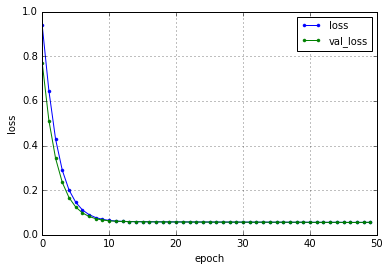

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.8794 - val_loss: 0.6513
Epoch 2/50
0s - loss: 0.4943 - val_loss: 0.3410
Epoch 3/50
0s - loss: 0.2612 - val_loss: 0.1868
Epoch 4/50
0s - loss: 0.1494 - val_loss: 0.1149
Epoch 5/50
0s - loss: 0.0981 - val_loss: 0.0827
Epoch 6/50
0s - loss: 0.0753 - val_loss: 0.0686
Epoch 7/50
0s - loss: 0.0654 - val_loss: 0.0625
Epoch 8/50
0s - loss: 0.0612 - val_loss: 0.0600
Epoch 9/50
0s - loss: 0.0595 - val_loss: 0.0590
Epoch 10/50
0s - loss: 0.0588 - val_loss: 0.0586
Epoch 11/50
0s - loss: 0.0585 - val_loss: 0.0584
Epoch 12/50
0s - loss: 0.0583 - val_loss: 0.0582
Epoch 13/50
0s - loss: 0.0581 - val_loss: 0.0580
Epoch 14/50
0s - loss: 0.0579 - val_loss: 0.0578
Epoch 15/50
0s - loss: 0.0577 - val_loss: 0.0576
Epoch 16/50
0s - loss: 0.0575 - val_loss: 0.0575
Epoch 17/50
0s - loss: 0.0574 - val_loss: 0.0572
Epoch 18/50
0s - loss: 0.0572 - val_loss: 0.0571
Epoch 19/50
0s - loss: 0.0570 - val_loss: 0.0569
Epoch 20/50
0s

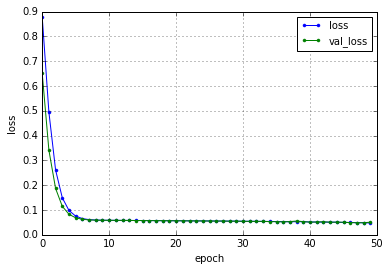

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.8114 - val_loss: 0.4859
Epoch 2/50
0s - loss: 0.3225 - val_loss: 0.1866
Epoch 3/50
0s - loss: 0.1356 - val_loss: 0.0949
Epoch 4/50
0s - loss: 0.0802 - val_loss: 0.0685
Epoch 5/50
0s - loss: 0.0644 - val_loss: 0.0610
Epoch 6/50
0s - loss: 0.0597 - val_loss: 0.0587
Epoch 7/50
0s - loss: 0.0584 - val_loss: 0.0580
Epoch 8/50
0s - loss: 0.0578 - val_loss: 0.0576
Epoch 9/50
0s - loss: 0.0575 - val_loss: 0.0574
Epoch 10/50
0s - loss: 0.0572 - val_loss: 0.0570
Epoch 11/50
0s - loss: 0.0569 - val_loss: 0.0567
Epoch 12/50
0s - loss: 0.0565 - val_loss: 0.0564
Epoch 13/50
0s - loss: 0.0561 - val_loss: 0.0558
Epoch 14/50
0s - loss: 0.0558 - val_loss: 0.0556
Epoch 15/50
0s - loss: 0.0553 - val_loss: 0.0549
Epoch 16/50
0s - loss: 0.0547 - val_loss: 0.0545
Epoch 17/50
0s - loss: 0.0542 - val_loss: 0.0538
Epoch 18/50
0s - loss: 0.0536 - val_loss: 0.0531
Epoch 19/50
0s - loss: 0.0528 - val_loss: 0.0522
Epoch 20/50
0s

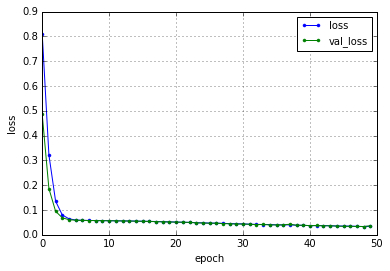

hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2045 - val_loss: 0.2004
Epoch 2/50
0s - loss: 0.1949 - val_loss: 0.1858
Epoch 3/50
0s - loss: 0.1752 - val_loss: 0.1618
Epoch 4/50
0s - loss: 0.1511 - val_loss: 0.1389
Epoch 5/50
0s - loss: 0.1303 - val_loss: 0.1210
Epoch 6/50
0s - loss: 0.1148 - val_loss: 0.1081
Epoch 7/50
0s - loss: 0.1038 - val_loss: 0.0992
Epoch 8/50
0s - loss: 0.0961 - val_loss: 0.0928
Epoch 9/50
0s - loss: 0.0906 - val_loss: 0.0882
Epoch 10/50
0s - loss: 0.0865 - val_loss: 0.0847
Epoch 11/50
0s - loss: 0.0833 - val_loss: 0.0818
Epoch 12/50
0s - loss: 0.0808 - val_loss: 0.0795
Epoch 13/50
0s - loss: 0.0786 - val_loss: 0.0776
Epoch 14/50
0s - loss: 0.0769 - val_loss: 0.0760
Epoch 15/50
0s - loss: 0.0754 - val_loss: 0.0747
Epoch 16/50
0s - loss: 0.0741 - val_loss: 0.0735
Epoch 17/50
0s - loss: 0.0730 - val_loss: 0.0724
Epoch 18/50
0s - loss: 0.0720 - val_loss: 0.0715
Epoch 19/50
0s - loss: 0.0711 - val_loss: 0.0707
Epoch 20/50
0s 

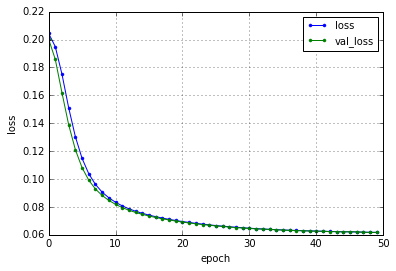

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2029 - val_loss: 0.1939
Epoch 2/50
0s - loss: 0.1823 - val_loss: 0.1657
Epoch 3/50
0s - loss: 0.1506 - val_loss: 0.1331
Epoch 4/50
0s - loss: 0.1212 - val_loss: 0.1087
Epoch 5/50
0s - loss: 0.1014 - val_loss: 0.0941
Epoch 6/50
0s - loss: 0.0900 - val_loss: 0.0857
Epoch 7/50
0s - loss: 0.0833 - val_loss: 0.0807
Epoch 8/50
0s - loss: 0.0791 - val_loss: 0.0774
Epoch 9/50
0s - loss: 0.0762 - val_loss: 0.0750
Epoch 10/50
0s - loss: 0.0741 - val_loss: 0.0731
Epoch 11/50
0s - loss: 0.0724 - val_loss: 0.0716
Epoch 12/50
0s - loss: 0.0711 - val_loss: 0.0704
Epoch 13/50
0s - loss: 0.0699 - val_loss: 0.0694
Epoch 14/50
0s - loss: 0.0690 - val_loss: 0.0685
Epoch 15/50
0s - loss: 0.0681 - val_loss: 0.0677
Epoch 16/50
0s - loss: 0.0674 - val_loss: 0.0670
Epoch 17/50
0s - loss: 0.0667 - val_loss: 0.0663
Epoch 18/50
0s - loss: 0.0661 - val_loss: 0.0657
Epoch 19/50
0s - loss: 0.0655 - val_loss: 0.0652
Epoch 20/50
0s 

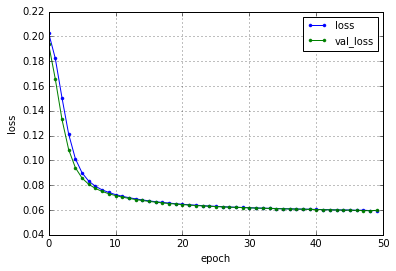

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2006 - val_loss: 0.1868
Epoch 2/50
0s - loss: 0.1700 - val_loss: 0.1483
Epoch 3/50
0s - loss: 0.1316 - val_loss: 0.1140
Epoch 4/50
0s - loss: 0.1039 - val_loss: 0.0941
Epoch 5/50
0s - loss: 0.0889 - val_loss: 0.0839
Epoch 6/50
0s - loss: 0.0811 - val_loss: 0.0784
Epoch 7/50
0s - loss: 0.0768 - val_loss: 0.0751
Epoch 8/50
0s - loss: 0.0740 - val_loss: 0.0728
Epoch 9/50
0s - loss: 0.0720 - val_loss: 0.0710
Epoch 10/50
0s - loss: 0.0704 - val_loss: 0.0697
Epoch 11/50
0s - loss: 0.0691 - val_loss: 0.0685
Epoch 12/50
0s - loss: 0.0681 - val_loss: 0.0675
Epoch 13/50
0s - loss: 0.0671 - val_loss: 0.0667
Epoch 14/50
0s - loss: 0.0664 - val_loss: 0.0659
Epoch 15/50
0s - loss: 0.0657 - val_loss: 0.0654
Epoch 16/50
0s - loss: 0.0650 - val_loss: 0.0647
Epoch 17/50
0s - loss: 0.0645 - val_loss: 0.0642
Epoch 18/50
0s - loss: 0.0640 - val_loss: 0.0637
Epoch 19/50
0s - loss: 0.0635 - val_loss: 0.0633
Epoch 20/50
0s

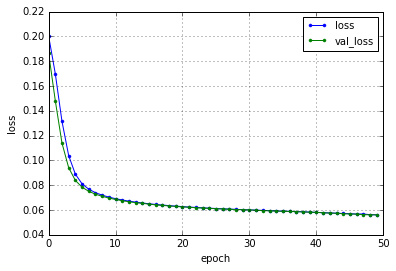

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2007 - val_loss: 0.1809
Epoch 2/50
0s - loss: 0.1600 - val_loss: 0.1345
Epoch 3/50
0s - loss: 0.1173 - val_loss: 0.1004
Epoch 4/50
0s - loss: 0.0917 - val_loss: 0.0837
Epoch 5/50
0s - loss: 0.0799 - val_loss: 0.0763
Epoch 6/50
0s - loss: 0.0745 - val_loss: 0.0727
Epoch 7/50
0s - loss: 0.0716 - val_loss: 0.0704
Epoch 8/50
0s - loss: 0.0697 - val_loss: 0.0688
Epoch 9/50
0s - loss: 0.0683 - val_loss: 0.0676
Epoch 10/50
0s - loss: 0.0672 - val_loss: 0.0666
Epoch 11/50
0s - loss: 0.0663 - val_loss: 0.0658
Epoch 12/50
0s - loss: 0.0655 - val_loss: 0.0650
Epoch 13/50
0s - loss: 0.0648 - val_loss: 0.0644
Epoch 14/50
0s - loss: 0.0641 - val_loss: 0.0638
Epoch 15/50
0s - loss: 0.0636 - val_loss: 0.0633
Epoch 16/50
0s - loss: 0.0631 - val_loss: 0.0628
Epoch 17/50
0s - loss: 0.0626 - val_loss: 0.0623
Epoch 18/50
0s - loss: 0.0621 - val_loss: 0.0619
Epoch 19/50
0s - loss: 0.0617 - val_loss: 0.0615
Epoch 20/50
0s

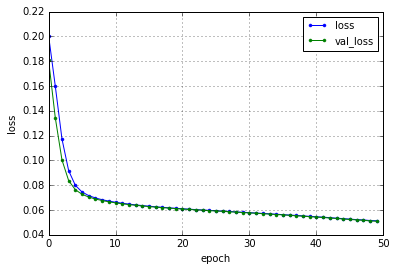

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1956 - val_loss: 0.1670
Epoch 2/50
0s - loss: 0.1413 - val_loss: 0.1125
Epoch 3/50
0s - loss: 0.0966 - val_loss: 0.0827
Epoch 4/50
0s - loss: 0.0769 - val_loss: 0.0721
Epoch 5/50
0s - loss: 0.0702 - val_loss: 0.0683
Epoch 6/50
0s - loss: 0.0674 - val_loss: 0.0664
Epoch 7/50
0s - loss: 0.0658 - val_loss: 0.0651
Epoch 8/50
0s - loss: 0.0646 - val_loss: 0.0640
Epoch 9/50
0s - loss: 0.0636 - val_loss: 0.0631
Epoch 10/50
0s - loss: 0.0627 - val_loss: 0.0623
Epoch 11/50
0s - loss: 0.0620 - val_loss: 0.0615
Epoch 12/50
0s - loss: 0.0612 - val_loss: 0.0608
Epoch 13/50
0s - loss: 0.0605 - val_loss: 0.0601
Epoch 14/50
0s - loss: 0.0599 - val_loss: 0.0595
Epoch 15/50
0s - loss: 0.0592 - val_loss: 0.0588
Epoch 16/50
0s - loss: 0.0586 - val_loss: 0.0583
Epoch 17/50
0s - loss: 0.0580 - val_loss: 0.0576
Epoch 18/50
0s - loss: 0.0573 - val_loss: 0.0570
Epoch 19/50
0s - loss: 0.0568 - val_loss: 0.0564
Epoch 20/50
0s

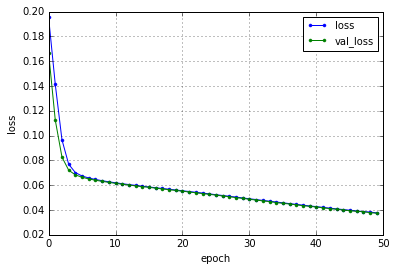

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1903 - val_loss: 0.1446
Epoch 2/50
0s - loss: 0.1134 - val_loss: 0.0860
Epoch 3/50
0s - loss: 0.0770 - val_loss: 0.0705
Epoch 4/50
0s - loss: 0.0686 - val_loss: 0.0668
Epoch 5/50
0s - loss: 0.0658 - val_loss: 0.0647
Epoch 6/50
0s - loss: 0.0640 - val_loss: 0.0631
Epoch 7/50
0s - loss: 0.0625 - val_loss: 0.0616
Epoch 8/50
0s - loss: 0.0611 - val_loss: 0.0603
Epoch 9/50
0s - loss: 0.0598 - val_loss: 0.0590
Epoch 10/50
0s - loss: 0.0585 - val_loss: 0.0578
Epoch 11/50
0s - loss: 0.0573 - val_loss: 0.0566
Epoch 12/50
0s - loss: 0.0561 - val_loss: 0.0554
Epoch 13/50
0s - loss: 0.0549 - val_loss: 0.0543
Epoch 14/50
0s - loss: 0.0538 - val_loss: 0.0531
Epoch 15/50
0s - loss: 0.0526 - val_loss: 0.0520
Epoch 16/50
0s - loss: 0.0515 - val_loss: 0.0509
Epoch 17/50
0s - loss: 0.0504 - val_loss: 0.0497
Epoch 18/50
0s - loss: 0.0493 - val_loss: 0.0486
Epoch 19/50
0s - loss: 0.0482 - val_loss: 0.0475
Epoch 20/50
0s

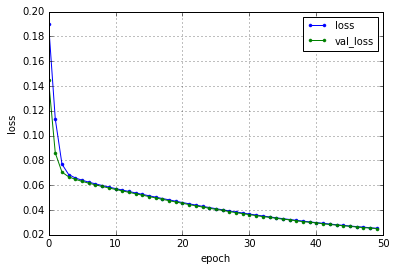

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 3)
(992, 1024, 3)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0732 - val_loss: 0.0725
Epoch 2/50
0s - loss: 0.0722 - val_loss: 0.0717
Epoch 3/50
0s - loss: 0.0715 - val_loss: 0.0711
Epoch 4/50
0s - loss: 0.0709 - val_loss: 0.0705
Epoch 5/50
0s - loss: 0.0703 - val_loss: 0.0699
Epoch 6/50
0s - loss: 0.0697 - val_loss: 0.0693
Epoch 7/50
0s - loss: 0.0690 - val_loss: 0.0686
Epoch 8/50
0s - loss: 0.0684 - val_loss: 0.0679
Epoch 9/50
0s - loss: 0.0676 - val_loss: 0.0672
Epoch 10/50
0s - loss: 0.0669 - val_loss: 0.0664
Epoch 11/50
0s - loss: 0.0661 - val_loss: 0.0655
Epoch 12/50
0s - loss: 0.0652 - val_loss: 0.0647
Epoch 13/50
0s - loss: 0.0643 - val_loss: 0.0637
Epoch 14/50
0s - loss: 0.0634 - val_loss: 0.0628
Epoch 15/50
0s - loss: 0.0624 - val_loss: 0.0618
Epoch 16/50
0s - loss: 

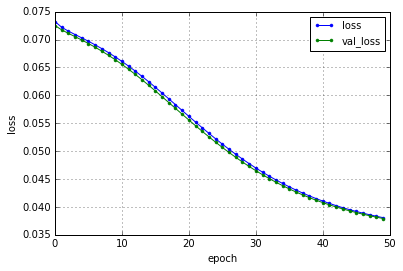

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0732 - val_loss: 0.0725
Epoch 2/50
0s - loss: 0.0722 - val_loss: 0.0718
Epoch 3/50
0s - loss: 0.0715 - val_loss: 0.0711
Epoch 4/50
0s - loss: 0.0709 - val_loss: 0.0705
Epoch 5/50
0s - loss: 0.0702 - val_loss: 0.0698
Epoch 6/50
0s - loss: 0.0695 - val_loss: 0.0691
Epoch 7/50
0s - loss: 0.0688 - val_loss: 0.0683
Epoch 8/50
0s - loss: 0.0680 - val_loss: 0.0675
Epoch 9/50
0s - loss: 0.0672 - val_loss: 0.0666
Epoch 10/50
0s - loss: 0.0663 - val_loss: 0.0656
Epoch 11/50
0s - loss: 0.0653 - val_loss: 0.0646
Epoch 12/50
0s - loss: 0.0642 - val_loss: 0.0635
Epoch 13/50
0s - loss: 0.0631 - val_loss: 0.0624
Epoch 14/50
0s - loss: 0.0620 - val_loss: 0.0612
Epoch 15/50
0s - loss: 0.0607 - val_loss: 0.0599
Epoch 16/50
0s - loss: 0.0595 - val_loss: 0.0587
Epoch 17/50
0s - loss: 0.0582 - val_loss: 0.0574
Epoch 18/50
0s - loss: 0.0569 - val_loss: 0.0561
Epoch 19/50
0s - loss: 0.0556 - val_loss: 0.0548
Epoch 20/50
0s - 

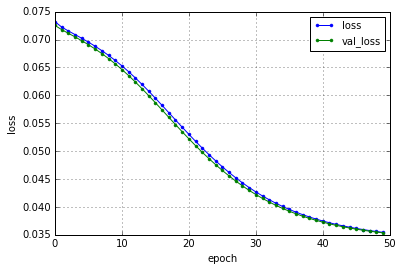

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0749 - val_loss: 0.0736
Epoch 2/50
0s - loss: 0.0731 - val_loss: 0.0723
Epoch 3/50
0s - loss: 0.0720 - val_loss: 0.0714
Epoch 4/50
0s - loss: 0.0710 - val_loss: 0.0705
Epoch 5/50
0s - loss: 0.0702 - val_loss: 0.0696
Epoch 6/50
0s - loss: 0.0693 - val_loss: 0.0687
Epoch 7/50
0s - loss: 0.0684 - val_loss: 0.0678
Epoch 8/50
0s - loss: 0.0674 - val_loss: 0.0667
Epoch 9/50
0s - loss: 0.0663 - val_loss: 0.0655
Epoch 10/50
0s - loss: 0.0651 - val_loss: 0.0643
Epoch 11/50
0s - loss: 0.0638 - val_loss: 0.0630
Epoch 12/50
0s - loss: 0.0625 - val_loss: 0.0615
Epoch 13/50
0s - loss: 0.0610 - val_loss: 0.0600
Epoch 14/50
0s - loss: 0.0595 - val_loss: 0.0585
Epoch 15/50
0s - loss: 0.0579 - val_loss: 0.0569
Epoch 16/50
0s - loss: 0.0563 - val_loss: 0.0552
Epoch 17/50
0s - loss: 0.0546 - val_loss: 0.0536
Epoch 18/50
0s - loss: 0.0530 - val_loss: 0.0520
Epoch 19/50
0s - loss: 0.0514 - val_loss: 0.0504
Epoch 20/50
0s -

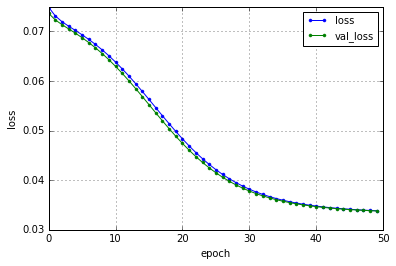

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0747 - val_loss: 0.0734
Epoch 2/50
0s - loss: 0.0729 - val_loss: 0.0721
Epoch 3/50
0s - loss: 0.0718 - val_loss: 0.0712
Epoch 4/50
0s - loss: 0.0709 - val_loss: 0.0703
Epoch 5/50
0s - loss: 0.0700 - val_loss: 0.0694
Epoch 6/50
0s - loss: 0.0691 - val_loss: 0.0684
Epoch 7/50
0s - loss: 0.0680 - val_loss: 0.0673
Epoch 8/50
0s - loss: 0.0669 - val_loss: 0.0661
Epoch 9/50
0s - loss: 0.0656 - val_loss: 0.0648
Epoch 10/50
0s - loss: 0.0642 - val_loss: 0.0633
Epoch 11/50
0s - loss: 0.0627 - val_loss: 0.0617
Epoch 12/50
0s - loss: 0.0611 - val_loss: 0.0601
Epoch 13/50
0s - loss: 0.0594 - val_loss: 0.0583
Epoch 14/50
0s - loss: 0.0577 - val_loss: 0.0565
Epoch 15/50
0s - loss: 0.0558 - val_loss: 0.0547
Epoch 16/50
0s - loss: 0.0540 - val_loss: 0.0529
Epoch 17/50
0s - loss: 0.0522 - val_loss: 0.0511
Epoch 18/50
0s - loss: 0.0504 - val_loss: 0.0493
Epoch 19/50
0s - loss: 0.0487 - val_loss: 0.0477
Epoch 20/50
0s -

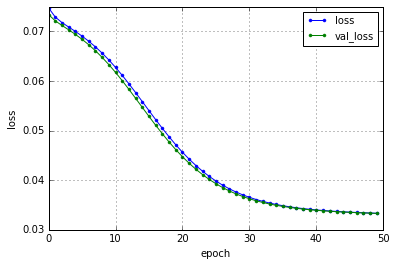

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0766 - val_loss: 0.0744
Epoch 2/50
0s - loss: 0.0736 - val_loss: 0.0724
Epoch 3/50
0s - loss: 0.0718 - val_loss: 0.0709
Epoch 4/50
0s - loss: 0.0704 - val_loss: 0.0695
Epoch 5/50
0s - loss: 0.0690 - val_loss: 0.0680
Epoch 6/50
0s - loss: 0.0674 - val_loss: 0.0663
Epoch 7/50
0s - loss: 0.0657 - val_loss: 0.0645
Epoch 8/50
0s - loss: 0.0638 - val_loss: 0.0625
Epoch 9/50
0s - loss: 0.0617 - val_loss: 0.0603
Epoch 10/50
0s - loss: 0.0595 - val_loss: 0.0581
Epoch 11/50
0s - loss: 0.0573 - val_loss: 0.0558
Epoch 12/50
0s - loss: 0.0549 - val_loss: 0.0534
Epoch 13/50
0s - loss: 0.0526 - val_loss: 0.0512
Epoch 14/50
0s - loss: 0.0504 - val_loss: 0.0490
Epoch 15/50
0s - loss: 0.0482 - val_loss: 0.0469
Epoch 16/50
0s - loss: 0.0462 - val_loss: 0.0450
Epoch 17/50
0s - loss: 0.0443 - val_loss: 0.0433
Epoch 18/50
0s - loss: 0.0427 - val_loss: 0.0417
Epoch 19/50
0s - loss: 0.0412 - val_loss: 0.0403
Epoch 20/50
0s -

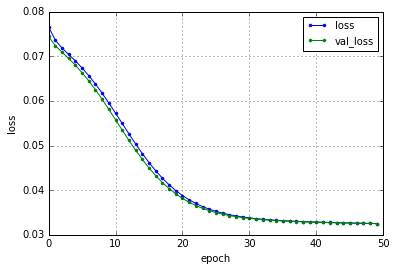

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0801 - val_loss: 0.0769
Epoch 2/50
0s - loss: 0.0758 - val_loss: 0.0741
Epoch 3/50
0s - loss: 0.0733 - val_loss: 0.0720
Epoch 4/50
0s - loss: 0.0713 - val_loss: 0.0701
Epoch 5/50
0s - loss: 0.0693 - val_loss: 0.0680
Epoch 6/50
0s - loss: 0.0672 - val_loss: 0.0658
Epoch 7/50
0s - loss: 0.0649 - val_loss: 0.0634
Epoch 8/50
0s - loss: 0.0625 - val_loss: 0.0608
Epoch 9/50
0s - loss: 0.0599 - val_loss: 0.0582
Epoch 10/50
0s - loss: 0.0572 - val_loss: 0.0555
Epoch 11/50
0s - loss: 0.0545 - val_loss: 0.0529
Epoch 12/50
0s - loss: 0.0519 - val_loss: 0.0503
Epoch 13/50
0s - loss: 0.0494 - val_loss: 0.0479
Epoch 14/50
0s - loss: 0.0471 - val_loss: 0.0457
Epoch 15/50
0s - loss: 0.0450 - val_loss: 0.0438
Epoch 16/50
0s - loss: 0.0431 - val_loss: 0.0420
Epoch 17/50
0s - loss: 0.0415 - val_loss: 0.0405
Epoch 18/50
0s - loss: 0.0400 - val_loss: 0.0392
Epoch 19/50
0s - loss: 0.0388 - val_loss: 0.0381
Epoch 20/50
0s -

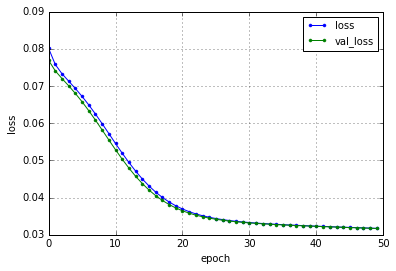

hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0226 - val_loss: 1.0124
Epoch 2/50
0s - loss: 1.0063 - val_loss: 0.9947
Epoch 3/50
0s - loss: 0.9876 - val_loss: 0.9750
Epoch 4/50
0s - loss: 0.9679 - val_loss: 0.9554
Epoch 5/50
0s - loss: 0.9484 - val_loss: 0.9361
Epoch 6/50
0s - loss: 0.9292 - val_loss: 0.9171
Epoch 7/50
0s - loss: 0.9102 - val_loss: 0.8983
Epoch 8/50
0s - loss: 0.8916 - val_loss: 0.8799
Epoch 9/50
0s - loss: 0.8733 - val_loss: 0.8618
Epoch 10/50
0s - loss: 0.8553 - val_loss: 0.8440
Epoch 11/50
0s - loss: 0.8377 - val_loss: 0.8266
Epoch 12/50
0s - loss: 0.8203 - val_loss: 0.8094
Epoch 13/50
0s - loss: 0.8033 - val_loss: 0.7926
Epoch 14/50
0s - loss: 0.7866 - val_loss: 0.7760
Epoch 15/50
0s - loss: 0.7701 - val_loss: 0.7598
Epoch 16/50
0s - loss: 0.7540 - val_loss: 0.7439
Epoch 17/50
0s - loss: 0.7382 - val_loss: 0.7283
Epoch 18/50
0s - loss: 0.7227 - val_loss: 0.7129
Epoch 19/50
0s - loss: 0.7074 - val_loss: 0.6979
Epoch 20/50
0s - 

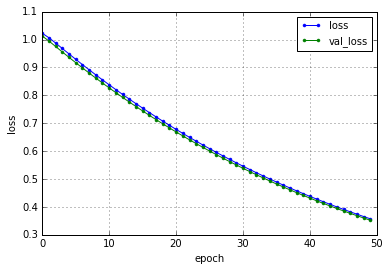

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0215 - val_loss: 1.0051
Epoch 2/50
0s - loss: 0.9952 - val_loss: 0.9771
Epoch 3/50
0s - loss: 0.9657 - val_loss: 0.9445
Epoch 4/50
0s - loss: 0.9311 - val_loss: 0.9068
Epoch 5/50
0s - loss: 0.8925 - val_loss: 0.8675
Epoch 6/50
0s - loss: 0.8535 - val_loss: 0.8293
Epoch 7/50
0s - loss: 0.8159 - val_loss: 0.7927
Epoch 8/50
0s - loss: 0.7799 - val_loss: 0.7577
Epoch 9/50
0s - loss: 0.7454 - val_loss: 0.7241
Epoch 10/50
0s - loss: 0.7124 - val_loss: 0.6921
Epoch 11/50
0s - loss: 0.6808 - val_loss: 0.6614
Epoch 12/50
0s - loss: 0.6507 - val_loss: 0.6321
Epoch 13/50
0s - loss: 0.6219 - val_loss: 0.6042
Epoch 14/50
0s - loss: 0.5944 - val_loss: 0.5775
Epoch 15/50
0s - loss: 0.5681 - val_loss: 0.5520
Epoch 16/50
0s - loss: 0.5431 - val_loss: 0.5276
Epoch 17/50
0s - loss: 0.5191 - val_loss: 0.5044
Epoch 18/50
0s - loss: 0.4963 - val_loss: 0.4823
Epoch 19/50
0s - loss: 0.4745 - val_loss: 0.4611
Epoch 20/50
0s - 

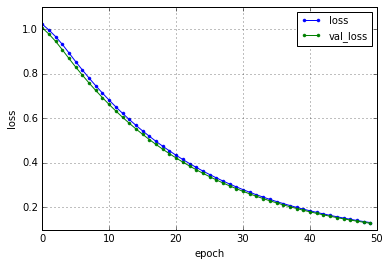

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0308 - val_loss: 1.0076
Epoch 2/50
0s - loss: 0.9959 - val_loss: 0.9722
Epoch 3/50
0s - loss: 0.9553 - val_loss: 0.9237
Epoch 4/50
0s - loss: 0.9048 - val_loss: 0.8716
Epoch 5/50
0s - loss: 0.8530 - val_loss: 0.8208
Epoch 6/50
0s - loss: 0.8032 - val_loss: 0.7728
Epoch 7/50
0s - loss: 0.7561 - val_loss: 0.7274
Epoch 8/50
0s - loss: 0.7116 - val_loss: 0.6842
Epoch 9/50
0s - loss: 0.6690 - val_loss: 0.6425
Epoch 10/50
0s - loss: 0.6278 - val_loss: 0.6024
Epoch 11/50
0s - loss: 0.5885 - val_loss: 0.5647
Epoch 12/50
0s - loss: 0.5517 - val_loss: 0.5293
Epoch 13/50
0s - loss: 0.5172 - val_loss: 0.4963
Epoch 14/50
0s - loss: 0.4850 - val_loss: 0.4655
Epoch 15/50
0s - loss: 0.4549 - val_loss: 0.4367
Epoch 16/50
0s - loss: 0.4268 - val_loss: 0.4098
Epoch 17/50
0s - loss: 0.4006 - val_loss: 0.3847
Epoch 18/50
0s - loss: 0.3761 - val_loss: 0.3614
Epoch 19/50
0s - loss: 0.3533 - val_loss: 0.3395
Epoch 20/50
0s -

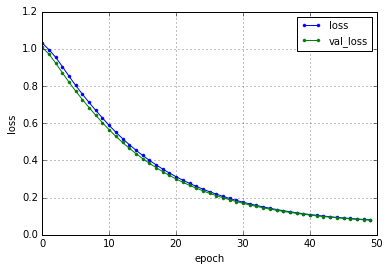

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0289 - val_loss: 0.9918
Epoch 2/50
0s - loss: 0.9748 - val_loss: 0.9403
Epoch 3/50
0s - loss: 0.9169 - val_loss: 0.8744
Epoch 4/50
0s - loss: 0.8499 - val_loss: 0.8073
Epoch 5/50
0s - loss: 0.7839 - val_loss: 0.7439
Epoch 6/50
0s - loss: 0.7223 - val_loss: 0.6853
Epoch 7/50
0s - loss: 0.6654 - val_loss: 0.6313
Epoch 8/50
0s - loss: 0.6130 - val_loss: 0.5817
Epoch 9/50
0s - loss: 0.5649 - val_loss: 0.5361
Epoch 10/50
0s - loss: 0.5207 - val_loss: 0.4943
Epoch 11/50
0s - loss: 0.4801 - val_loss: 0.4559
Epoch 12/50
0s - loss: 0.4429 - val_loss: 0.4208
Epoch 13/50
0s - loss: 0.4089 - val_loss: 0.3886
Epoch 14/50
0s - loss: 0.3777 - val_loss: 0.3591
Epoch 15/50
0s - loss: 0.3491 - val_loss: 0.3321
Epoch 16/50
0s - loss: 0.3230 - val_loss: 0.3074
Epoch 17/50
0s - loss: 0.2991 - val_loss: 0.2849
Epoch 18/50
0s - loss: 0.2772 - val_loss: 0.2642
Epoch 19/50
0s - loss: 0.2573 - val_loss: 0.2454
Epoch 20/50
0s -

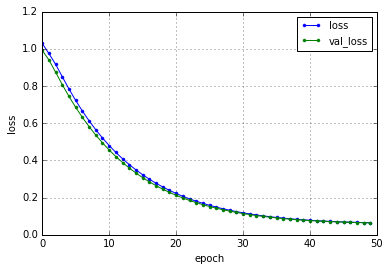

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0276 - val_loss: 0.9643
Epoch 2/50
0s - loss: 0.9283 - val_loss: 0.8622
Epoch 3/50
0s - loss: 0.8229 - val_loss: 0.7548
Epoch 4/50
0s - loss: 0.7177 - val_loss: 0.6546
Epoch 5/50
0s - loss: 0.6213 - val_loss: 0.5653
Epoch 6/50
0s - loss: 0.5360 - val_loss: 0.4868
Epoch 7/50
0s - loss: 0.4612 - val_loss: 0.4185
Epoch 8/50
0s - loss: 0.3967 - val_loss: 0.3603
Epoch 9/50
0s - loss: 0.3419 - val_loss: 0.3113
Epoch 10/50
0s - loss: 0.2957 - val_loss: 0.2699
Epoch 11/50
0s - loss: 0.2569 - val_loss: 0.2352
Epoch 12/50
0s - loss: 0.2242 - val_loss: 0.2061
Epoch 13/50
0s - loss: 0.1969 - val_loss: 0.1816
Epoch 14/50
0s - loss: 0.1739 - val_loss: 0.1611
Epoch 15/50
0s - loss: 0.1547 - val_loss: 0.1440
Epoch 16/50
0s - loss: 0.1386 - val_loss: 0.1296
Epoch 17/50
0s - loss: 0.1251 - val_loss: 0.1177
Epoch 18/50
0s - loss: 0.1139 - val_loss: 0.1076
Epoch 19/50
0s - loss: 0.1045 - val_loss: 0.0993
Epoch 20/50
0s -

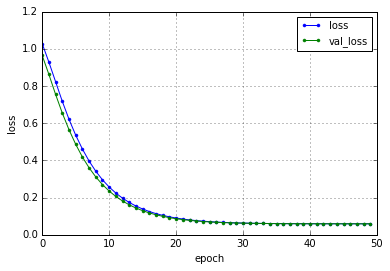

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.0096 - val_loss: 0.9037
Epoch 2/50
0s - loss: 0.8398 - val_loss: 0.7210
Epoch 3/50
0s - loss: 0.6529 - val_loss: 0.5394
Epoch 4/50
0s - loss: 0.4839 - val_loss: 0.3956
Epoch 5/50
0s - loss: 0.3552 - val_loss: 0.2918
Epoch 6/50
0s - loss: 0.2633 - val_loss: 0.2189
Epoch 7/50
0s - loss: 0.1991 - val_loss: 0.1683
Epoch 8/50
0s - loss: 0.1546 - val_loss: 0.1335
Epoch 9/50
0s - loss: 0.1242 - val_loss: 0.1097
Epoch 10/50
0s - loss: 0.1034 - val_loss: 0.0935
Epoch 11/50
0s - loss: 0.0892 - val_loss: 0.0825
Epoch 12/50
0s - loss: 0.0796 - val_loss: 0.0750
Epoch 13/50
0s - loss: 0.0730 - val_loss: 0.0699
Epoch 14/50
0s - loss: 0.0685 - val_loss: 0.0664
Epoch 15/50
0s - loss: 0.0655 - val_loss: 0.0640
Epoch 16/50
0s - loss: 0.0634 - val_loss: 0.0624
Epoch 17/50
0s - loss: 0.0620 - val_loss: 0.0613
Epoch 18/50
0s - loss: 0.0610 - val_loss: 0.0606
Epoch 19/50
0s - loss: 0.0604 - val_loss: 0.0601
Epoch 20/50
0s -

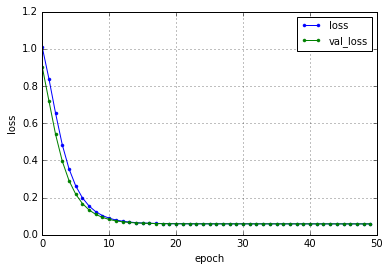

hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2061 - val_loss: 0.2050
Epoch 2/50
0s - loss: 0.2044 - val_loss: 0.2032
Epoch 3/50
0s - loss: 0.2024 - val_loss: 0.2008
Epoch 4/50
0s - loss: 0.1998 - val_loss: 0.1977
Epoch 5/50
0s - loss: 0.1963 - val_loss: 0.1938
Epoch 6/50
0s - loss: 0.1922 - val_loss: 0.1893
Epoch 7/50
0s - loss: 0.1875 - val_loss: 0.1843
Epoch 8/50
0s - loss: 0.1825 - val_loss: 0.1792
Epoch 9/50
0s - loss: 0.1774 - val_loss: 0.1741
Epoch 10/50
0s - loss: 0.1723 - val_loss: 0.1691
Epoch 11/50
0s - loss: 0.1673 - val_loss: 0.1642
Epoch 12/50
0s - loss: 0.1625 - val_loss: 0.1596
Epoch 13/50
0s - loss: 0.1580 - val_loss: 0.1552
Epoch 14/50
0s - loss: 0.1536 - val_loss: 0.1509
Epoch 15/50
0s - loss: 0.1495 - val_loss: 0.1470
Epoch 16/50
0s - loss: 0.1456 - val_loss: 0.1432
Epoch 17/50
0s - loss: 0.1419 - val_loss: 0.1396
Epoch 18/50
0s - loss: 0.1384 - val_loss: 0.1363
Epoch 19/50
0s - loss: 0.1351 - val_loss: 0.1331
Epoch 20/50
0s - 

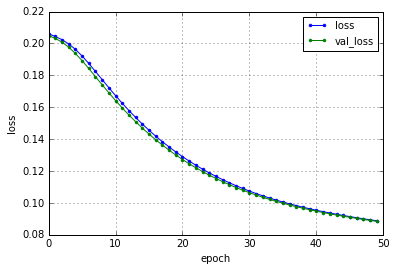

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2053 - val_loss: 0.2034
Epoch 2/50
0s - loss: 0.2023 - val_loss: 0.2003
Epoch 3/50
0s - loss: 0.1990 - val_loss: 0.1964
Epoch 4/50
0s - loss: 0.1947 - val_loss: 0.1914
Epoch 5/50
0s - loss: 0.1892 - val_loss: 0.1852
Epoch 6/50
0s - loss: 0.1827 - val_loss: 0.1781
Epoch 7/50
0s - loss: 0.1754 - val_loss: 0.1705
Epoch 8/50
0s - loss: 0.1677 - val_loss: 0.1628
Epoch 9/50
0s - loss: 0.1600 - val_loss: 0.1552
Epoch 10/50
0s - loss: 0.1526 - val_loss: 0.1481
Epoch 11/50
0s - loss: 0.1457 - val_loss: 0.1415
Epoch 12/50
0s - loss: 0.1393 - val_loss: 0.1355
Epoch 13/50
0s - loss: 0.1334 - val_loss: 0.1300
Epoch 14/50
0s - loss: 0.1281 - val_loss: 0.1250
Epoch 15/50
0s - loss: 0.1233 - val_loss: 0.1204
Epoch 16/50
0s - loss: 0.1189 - val_loss: 0.1164
Epoch 17/50
0s - loss: 0.1150 - val_loss: 0.1127
Epoch 18/50
0s - loss: 0.1115 - val_loss: 0.1094
Epoch 19/50
0s - loss: 0.1083 - val_loss: 0.1064
Epoch 20/50
0s - 

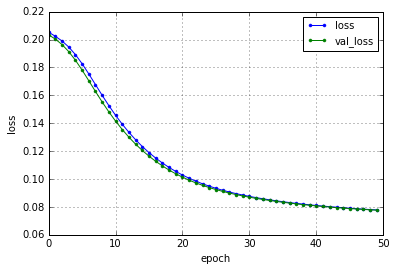

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2074 - val_loss: 0.2046
Epoch 2/50
0s - loss: 0.2033 - val_loss: 0.2007
Epoch 3/50
0s - loss: 0.1989 - val_loss: 0.1954
Epoch 4/50
0s - loss: 0.1930 - val_loss: 0.1885
Epoch 5/50
0s - loss: 0.1856 - val_loss: 0.1803
Epoch 6/50
0s - loss: 0.1771 - val_loss: 0.1714
Epoch 7/50
0s - loss: 0.1681 - val_loss: 0.1623
Epoch 8/50
0s - loss: 0.1591 - val_loss: 0.1536
Epoch 9/50
0s - loss: 0.1505 - val_loss: 0.1454
Epoch 10/50
0s - loss: 0.1426 - val_loss: 0.1378
Epoch 11/50
0s - loss: 0.1353 - val_loss: 0.1311
Epoch 12/50
0s - loss: 0.1288 - val_loss: 0.1250
Epoch 13/50
0s - loss: 0.1229 - val_loss: 0.1195
Epoch 14/50
0s - loss: 0.1177 - val_loss: 0.1147
Epoch 15/50
0s - loss: 0.1131 - val_loss: 0.1104
Epoch 16/50
0s - loss: 0.1090 - val_loss: 0.1066
Epoch 17/50
0s - loss: 0.1053 - val_loss: 0.1032
Epoch 18/50
0s - loss: 0.1021 - val_loss: 0.1002
Epoch 19/50
0s - loss: 0.0992 - val_loss: 0.0975
Epoch 20/50
0s -

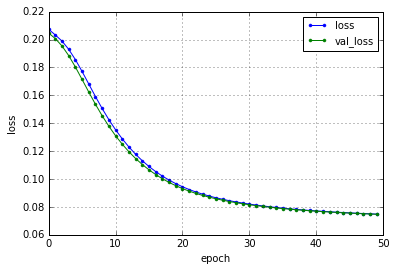

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2090 - val_loss: 0.2047
Epoch 2/50
0s - loss: 0.2029 - val_loss: 0.1996
Epoch 3/50
0s - loss: 0.1974 - val_loss: 0.1931
Epoch 4/50
0s - loss: 0.1903 - val_loss: 0.1851
Epoch 5/50
0s - loss: 0.1818 - val_loss: 0.1759
Epoch 6/50
0s - loss: 0.1723 - val_loss: 0.1658
Epoch 7/50
0s - loss: 0.1621 - val_loss: 0.1555
Epoch 8/50
0s - loss: 0.1518 - val_loss: 0.1454
Epoch 9/50
0s - loss: 0.1419 - val_loss: 0.1359
Epoch 10/50
0s - loss: 0.1327 - val_loss: 0.1273
Epoch 11/50
0s - loss: 0.1244 - val_loss: 0.1196
Epoch 12/50
0s - loss: 0.1171 - val_loss: 0.1129
Epoch 13/50
0s - loss: 0.1108 - val_loss: 0.1072
Epoch 14/50
0s - loss: 0.1053 - val_loss: 0.1023
Epoch 15/50
0s - loss: 0.1007 - val_loss: 0.0982
Epoch 16/50
0s - loss: 0.0969 - val_loss: 0.0947
Epoch 17/50
0s - loss: 0.0936 - val_loss: 0.0918
Epoch 18/50
0s - loss: 0.0909 - val_loss: 0.0894
Epoch 19/50
0s - loss: 0.0887 - val_loss: 0.0874
Epoch 20/50
0s -

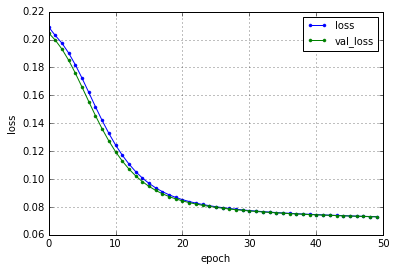

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2124 - val_loss: 0.2033
Epoch 2/50
0s - loss: 0.1999 - val_loss: 0.1938
Epoch 3/50
0s - loss: 0.1901 - val_loss: 0.1829
Epoch 4/50
0s - loss: 0.1783 - val_loss: 0.1699
Epoch 5/50
0s - loss: 0.1648 - val_loss: 0.1558
Epoch 6/50
0s - loss: 0.1506 - val_loss: 0.1418
Epoch 7/50
0s - loss: 0.1370 - val_loss: 0.1290
Epoch 8/50
0s - loss: 0.1248 - val_loss: 0.1178
Epoch 9/50
0s - loss: 0.1143 - val_loss: 0.1085
Epoch 10/50
0s - loss: 0.1057 - val_loss: 0.1010
Epoch 11/50
0s - loss: 0.0988 - val_loss: 0.0951
Epoch 12/50
0s - loss: 0.0933 - val_loss: 0.0905
Epoch 13/50
0s - loss: 0.0891 - val_loss: 0.0869
Epoch 14/50
0s - loss: 0.0859 - val_loss: 0.0842
Epoch 15/50
0s - loss: 0.0834 - val_loss: 0.0821
Epoch 16/50
0s - loss: 0.0815 - val_loss: 0.0805
Epoch 17/50
0s - loss: 0.0800 - val_loss: 0.0792
Epoch 18/50
0s - loss: 0.0789 - val_loss: 0.0782
Epoch 19/50
0s - loss: 0.0779 - val_loss: 0.0774
Epoch 20/50
0s -

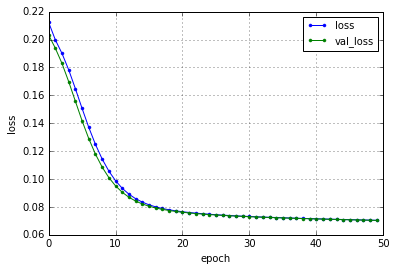

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2231 - val_loss: 0.2059
Epoch 2/50
0s - loss: 0.2000 - val_loss: 0.1899
Epoch 3/50
0s - loss: 0.1839 - val_loss: 0.1725
Epoch 4/50
0s - loss: 0.1655 - val_loss: 0.1527
Epoch 5/50
0s - loss: 0.1455 - val_loss: 0.1330
Epoch 6/50
0s - loss: 0.1266 - val_loss: 0.1159
Epoch 7/50
0s - loss: 0.1108 - val_loss: 0.1025
Epoch 8/50
0s - loss: 0.0988 - val_loss: 0.0929
Epoch 9/50
0s - loss: 0.0903 - val_loss: 0.0862
Epoch 10/50
0s - loss: 0.0845 - val_loss: 0.0818
Epoch 11/50
0s - loss: 0.0807 - val_loss: 0.0789
Epoch 12/50
0s - loss: 0.0782 - val_loss: 0.0771
Epoch 13/50
0s - loss: 0.0766 - val_loss: 0.0758
Epoch 14/50
0s - loss: 0.0755 - val_loss: 0.0749
Epoch 15/50
0s - loss: 0.0747 - val_loss: 0.0743
Epoch 16/50
0s - loss: 0.0742 - val_loss: 0.0738
Epoch 17/50
0s - loss: 0.0737 - val_loss: 0.0734
Epoch 18/50
0s - loss: 0.0733 - val_loss: 0.0731
Epoch 19/50
0s - loss: 0.0730 - val_loss: 0.0728
Epoch 20/50
0s -

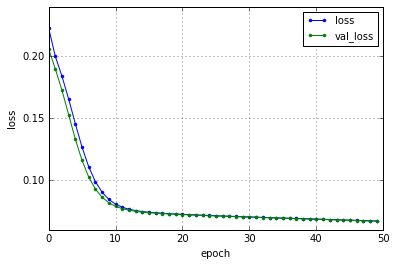

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    ArrayAxis = Axis.split(",")
    w=window.Window()
    for a in ArrayAxis:
        w.SetData(a,dic[a])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    print wind.shape
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

    # define SaveFileName
    for AxisName,WindowNum in zip(ArrayAxis,range(3)):
        for encoding_dim in EncodingDim:
            print "hiden node = "+str(encoding_dim)
            CommonName='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+AxisName
            SaveFileNameEncord=DataName+'_encoded'+CommonName
            SaveFileNameDecord=DataName+'_decoded'+CommonName
            SaveFileNameNet=DataName+'_net'+CommonName
            SaveFileNameTrain=DataName+'_train'+CommonName
            SaveFileNameTest=DataName+'_test'+CommonName
            SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

            window_test=wind[:,:,WindowNum]
            window_train=wind[:,:,WindowNum]
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
            shapeNum=wind.shape[1]


            # this is our input placeholder
            input_img = Input(shape=(shapeNum,))
            # "encoded" is the encoded representation of the input
            encoded = Dense(encoding_dim, activation='tanh')(input_img)
            # "decoded" is the lossy reconstruction of the input
            decoded = Dense(shapeNum, activation='linear')(encoded)

            # this model maps an input to its reconstruction
            autoencoder = Model(input=input_img, output=decoded)

            # this model maps an input to its encoded representation
            encoder = Model(input=input_img, output=encoded)

            # create a placeholder for an encoded (32-dimensional) input
            encoded_input = Input(shape=(encoding_dim,))
            # retrieve the last layer of the autoencoder model
            decoder_layer = autoencoder.layers[-1]
            # create the decoder model
            decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

            autoencoder.compile(optimizer='adadelta', loss='mse')
            plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5)
            hist = autoencoder.fit(window_train, window_train,
                            nb_epoch=50,
                            verbose=2,
                            batch_size=shapeNum/4,
                            shuffle=True,
                            validation_data=(window_test, window_test),
                            callbacks=[early_stopping]
                            )
            time.sleep(0.1)
            encoded_imgs = encoder.predict(window_test)
            decoded_imgs = decoder.predict(encoded_imgs)

            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

            # save model and wights
            json_string = encoder.to_json()
            open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
            encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

            json_string = decoder.to_json()
            open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
            decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

            json_string = autoencoder.to_json()
            open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
            autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

            # plot loss
            loss = hist.history['loss']
            val_loss = hist.history['val_loss']

            nb_epoch = len(loss)
            plt.plot(range(nb_epoch), loss, marker='.', label='loss')
            plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig(SaveFileNameGlaph)
            plt.show()

In [8]:
print window_test.shape

(992, 1024)
